In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
import os
from collections import Counter
from scipy.stats import binomtest

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


C:\Users\astar\AppData\Local\Temp\ipykernel_1204\3761557605.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("HARs_Results_Permute_FilterNewTEs/HARs_abslogfc_FilterNewTEs_FetalChondrocytes.txt.gz", sep = "\t")


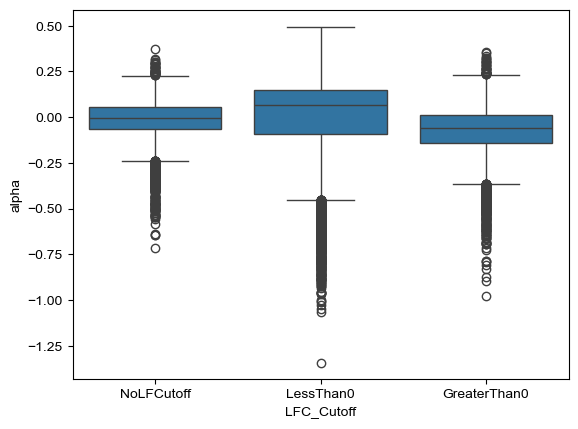

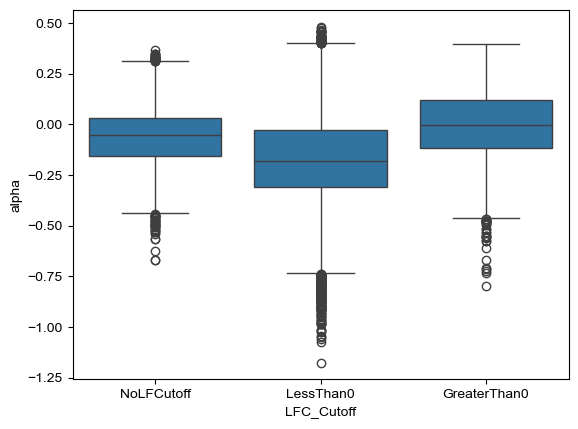

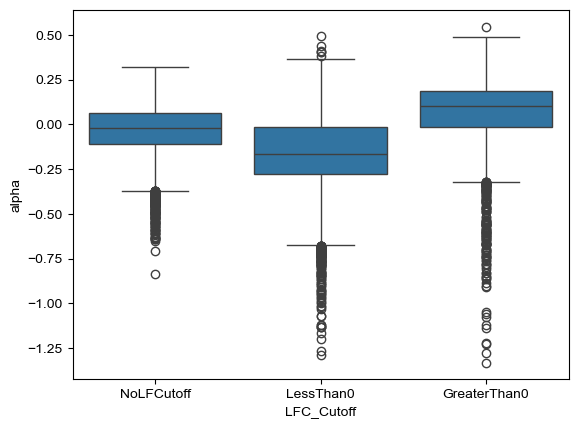

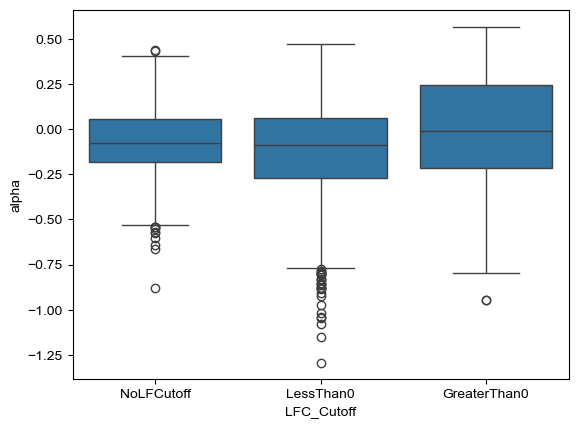

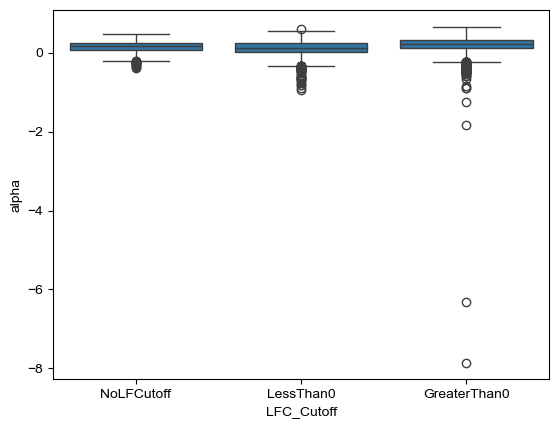

In [74]:
vr = pd.read_csv("HARs_Results_Permute_FilterNewTEs/HARs_abslogfc_FilterNewTEs_FetalChondrocytes.txt.gz", sep = "\t")
vr = vr.drop(["TypeOfSampling"], axis = 1)
vr.columns = list(vr.columns)[0:2] + list(vr.columns[3:]) + ["TypeOfSampling"]

for cutoff in [0.5, 0.6, 0.7, 0.8, 0.9]:
    
    v2r = vr[vr["Proportion"] == cutoff]
    v2r = v2r[v2r["Top_20th"] == "Top20th"]
    #v2r = v2r[v2r["LFC_Cutoff"] == "NoLFCutoff"]
    v2r = v2r[v2r["Distance_bin"] == "InHARs"]

    sns.boxplot(data = v2r, y = "alpha", x = "LFC_Cutoff")
    plt.show()

C:\Users\astar\AppData\Local\Temp\ipykernel_9440\993534425.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("HAQERs_Results_Permute/HAQERs_abslogfc_FilterNewTEs_AdultProximalTubule.txt.gz", sep = "\t")


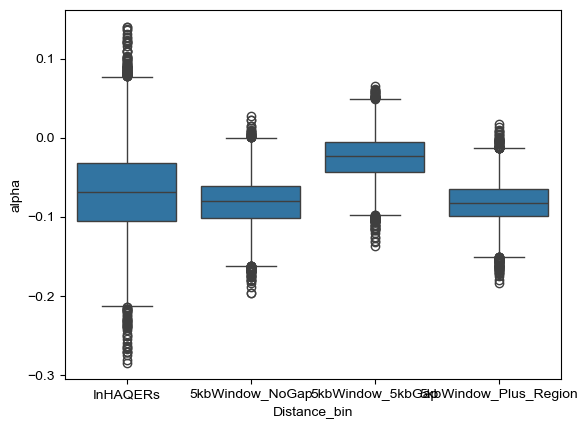

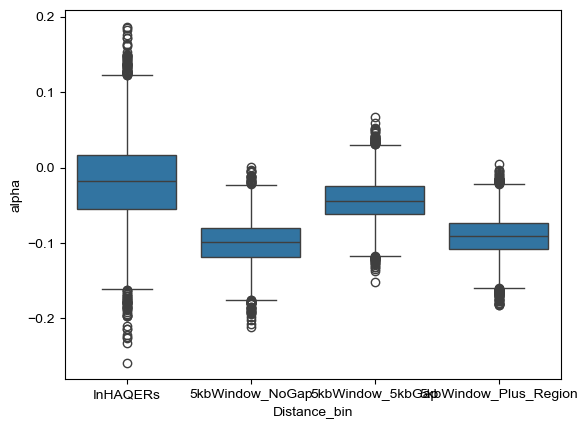

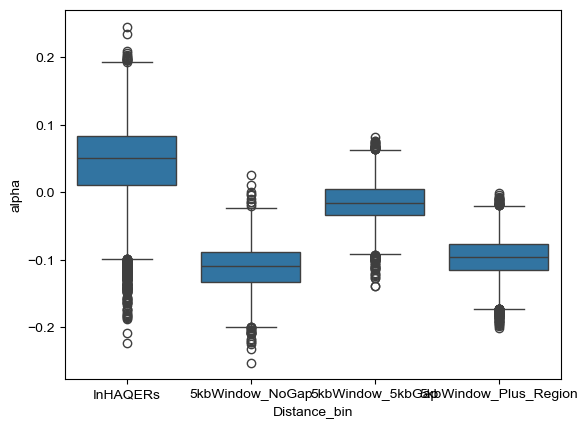

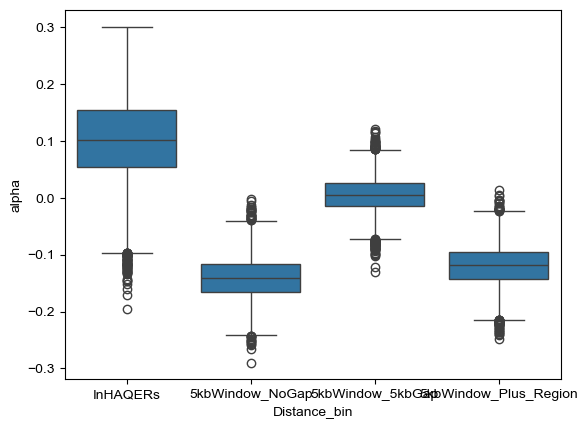

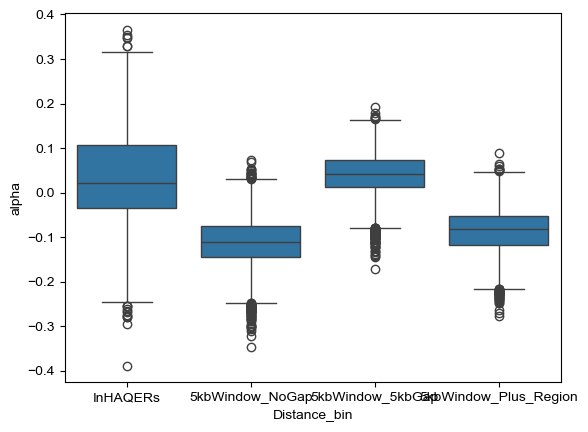

In [3]:
vr = pd.read_csv("HAQERs_Results_Permute/HAQERs_abslogfc_FilterNewTEs_AdultProximalTubule.txt.gz", sep = "\t")
vr = vr.drop(["TypeOfSampling"], axis = 1)
vr.columns = list(vr.columns)[0:2] + list(vr.columns[3:]) + ["TypeOfSampling"]

for cutoff in [0.5, 0.6, 0.7, 0.8, 0.9]:
    v2r = vr[vr["Proportion"] == cutoff]
    v2r = v2r[v2r["Top_20th"] == "All"]
    v2r = v2r[v2r["LFC_Cutoff"] == "NoLFCutoff"]
    sns.boxplot(data = v2r, y = "alpha", x = "Distance_bin")
    plt.show()

In [50]:
df = pd.DataFrame()

cutoff = 0.9
for file in os.listdir("HAQERs_Results_Permute"):
    if "FilterNewTEs" in file:
        vr = pd.read_csv("HAQERs_Results_Permute/" + file, sep = "\t")
        vr = vr.drop(["TypeOfSampling"], axis = 1)
        vr.columns = list(vr.columns)[0:2] + list(vr.columns[3:]) + ["TypeOfSampling"]

        v2r = vr[vr["Proportion"] == cutoff]
        v2r = v2r[v2r["Top_20th"] == "All"]
        v2r = v2r[v2r["LFC_Cutoff"] == "NoLFCutoff"]
        v2r = v2r[v2r["Distance_bin"] == "InHAQERs"]
        v2r["Cell type"] = np.repeat(d_abrev[file.replace("HAQERs_abslogfc_", "").replace(".txt.gz", "").replace("FilterNewTEs_", "")], v2r.shape[0])
        df = pd.concat([df, v2r])
df

C:\Users\astar\AppData\Local\Temp\ipykernel_21200\3757262439.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("HAQERs_Results_Permute/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_21200\3757262439.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("HAQERs_Results_Permute/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_21200\3757262439.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("HAQERs_Results_Permute/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_21200\3757262439.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("HAQERs_Results_Permute/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_21200\3757262439.py:6: D

Distance_bin                    Metric  Median fixed metric  \
4          InHAQERs  Absolute log fold-change             0.020074   
34         InHAQERs  Absolute log fold-change             0.019694   
64         InHAQERs  Absolute log fold-change             0.020163   
94         InHAQERs  Absolute log fold-change             0.020355   
124        InHAQERs  Absolute log fold-change             0.019935   
...             ...                       ...                  ...   
299884     InHAQERs  Absolute log fold-change             0.029256   
299914     InHAQERs  Absolute log fold-change             0.029419   
299944     InHAQERs  Absolute log fold-change             0.029362   
299974     InHAQERs  Absolute log fold-change             0.028687   
300004     InHAQERs  Absolute log fold-change             0.027989   

        Number fixed variants  Median polymorphic metric  \
4                        7251                   0.020916   
34                       7251                   0.020501   
64                       7251                   0.020727   
94                       7251                   0.020943   
124                      7251                   0.020385   
...                       ...                        ...   
299884                   7251                   0.028856   
299914                   7251                   0.030055   
299944                   7251                   0.031947   
299974                   7251                   0.029681   
300004                   7251                   0.028795   

        Number polymorphic variants  Fisher exact p-value  MWU p-value  \
4                              1272              0.727139     0.999320   
34                             1272              0.176939     0.917605   
64                             1272              0.008815     0.372245   
94                             1272              0.690527     0.738781   
124                            1272              0.683591     0.776496   
...                             ...                   ...          ...   
299884                         1272              0.328867     0.484686   
299914                         1272              0.378024     0.427288   
299944                         1272              0.075383     0.075309   
299974                         1272              0.296479     0.941666   
300004                         1272              0.748059     0.979425   

        Fisher exact p-value; alt greater  MWU p-value; alt greater     alpha  \
4                                0.364399                  0.499660  0.040076   
34                               0.087163                  0.541202  0.131087   
64                               0.004455                  0.186123  0.230014   
94                               0.347860                  0.369391  0.044322   
124                              0.678927                  0.388248 -0.042175   
...                                   ...                       ...       ...   
299884                           0.165048                  0.242343  0.097877   
299914                           0.191306                  0.786359  0.088896   
299944                           0.967415                  0.962346 -0.204200   
299974                           0.149776                  0.529172  0.104458   
300004                           0.375107                  0.489712  0.037390   

          Cutoff    [[dc1, du1], [pc1, pu1]]    [[dc2, du2], [pc2, pu2]]  \
4       0.071789  [[754, 6497], [127, 1145]]  [[754, 6497], [128, 1144]]   
34      0.067450  [[824, 6427], [127, 1145]]  [[824, 6427], [128, 1144]]   
64      0.065988  [[913, 6338], [126, 1146]]  [[913, 6338], [128, 1144]]   
94      0.072552  [[757, 6494], [127, 1145]]  [[757, 6494], [128, 1144]]   
124     0.072552  [[703, 6548], [127, 1145]]  [[703, 6548], [129, 1143]]   
...          ...                         ...                         ...   
299884  0.106514  [[797, 6454], [127, 1145]]  [[797

In [41]:
df = pd.DataFrame()

cutoff = 0.9
for file in os.listdir("HARs_Results_Permute_FilterNewTEs"):
    if "FilterNewTEs" in file and "PhyloP447" not in file:
        vr = pd.read_csv("HARs_Results_Permute_FilterNewTEs/" + file, sep = "\t")
        vr = vr.drop(["TypeOfSampling"], axis = 1)
        vr.columns = list(vr.columns)[0:2] + list(vr.columns[3:]) + ["TypeOfSampling"]

        v2r = vr[vr["Proportion"] == cutoff]
        v2r = v2r[v2r["Top_20th"] == "All"]
        v2r = v2r[v2r["LFC_Cutoff"] == "NoLFCutoff"]
        v2r = v2r[v2r["Distance_bin"] == "InHARs"]
        v2r["Cell type"] = np.repeat(d_abrev[file.replace("HARs_abslogfc_", "").replace(".txt.gz", "").replace("FilterNewTEs_", "")], v2r.shape[0])
        df = pd.concat([df, v2r])
df

C:\Users\astar\AppData\Local\Temp\ipykernel_21200\2918943374.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("HARs_Results_Permute_FilterNewTEs/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_21200\2918943374.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("HARs_Results_Permute_FilterNewTEs/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_21200\2918943374.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("HARs_Results_Permute_FilterNewTEs/" + file, sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_21200\2918943374.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("HARs_Results_Permute_FilterNewTEs/" + file, sep = "\t")
C:\Users\astar\AppData\L

Distance_bin                    Metric  Median fixed metric  \
4            InHARs  Absolute log fold-change             0.022828   
34           InHARs  Absolute log fold-change             0.022490   
64           InHARs  Absolute log fold-change             0.022451   
94           InHARs  Absolute log fold-change             0.022686   
124          InHARs  Absolute log fold-change             0.022088   
...             ...                       ...                  ...   
299884       InHARs  Absolute log fold-change             0.037023   
299914       InHARs  Absolute log fold-change             0.037016   
299944       InHARs  Absolute log fold-change             0.037355   
299974       InHARs  Absolute log fold-change             0.035299   
300004       InHARs  Absolute log fold-change             0.037277   

        Number fixed variants  Median polymorphic metric  \
4                       10192                   0.024811   
34                      10192                   0.024547   
64                      10192                   0.024104   
94                      10192                   0.024104   
124                     10192                   0.026661   
...                       ...                        ...   
299884                  10192                   0.039625   
299914                  10192                   0.044384   
299944                  10192                   0.040045   
299974                  10192                   0.039960   
300004                  10192                   0.039831   

        Number polymorphic variants  Fisher exact p-value  MWU p-value  \
4                              1034              0.208314     0.058130   
34                             1034              0.578645     0.019087   
64                             1034              0.006634     0.116650   
94                             1034              0.312514     0.155504   
124                            1034              0.183533     0.001198   
...                             ...                   ...          ...   
299884                         1034              0.012235     0.995291   
299914                         1034              0.935186     0.000856   
299944                         1034              0.417968     0.080460   
299974                         1034              0.708665     0.029999   
300004                         1034              0.598005     0.454483   

        Fisher exact p-value; alt greater  MWU p-value; alt greater     alpha  \
4                                0.909001                  0.970936 -0.151202   
34                               0.734866                  0.990457 -0.063551   
64                               0.997323                  0.941676 -0.365271   
94                               0.855452                  0.922249 -0.116364   
124                              0.913643                  0.999401 -0.159592   
...                                   ...                       ...       ...   
299884                           0.006329                  0.497646  0.235088   
299914                           0.526581                  0.999572 -0.000135   
299944                           0.806089                  0.959771 -0.093320   
299974                           0.360217                  0.985001  0.044754   
300004                           0.301036                  0.772761  0.061356   

          Cutoff    [[dc1, du1], [pc1, pu1]]    [[dc2, du2], [pc2, pu2]]  \
4       0.088073   [[898, 9294], [103, 931]]   [[898, 9294], [104, 930]]   
34      0.085344   [[965, 9227], [103, 931]]   [[965, 9227], [104, 930]]   
64      0.092855   [[764, 9428], [102, 932]]   [[764, 9428], [104, 930]]   
94      0.087502   [[928, 9264], [103, 931]]   [[928, 9264], [105, 929]]   
124     0.088031   [[879, 9313], [100, 934]]   [[879, 9313], [104, 930]]   
...          ...                         ...                         ...   
299884  0.127446  [[1300, 8892], [103, 931]]  [[130

C:\Users\astar\AppData\Local\Temp\ipykernel_21200\1958832369.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y = "alpha", x = "Cell type", order = order, palette = palette)


CellType   Lower95   Upper95
7          AC microglia  0.099021  0.373736
21             FC prog.  0.091478  0.358579
8         AH cardiomyo.  0.071815  0.381041
20        FC exc. neur.  0.052674  0.327680
27         FG preGC IIa -0.001877  0.249714
23        FCB glioblast -0.005614  0.310023
22  FCB Purk. inh neur. -0.032408  0.276919
26             FG neur. -0.042569  0.309238
6             AC astro. -0.055910  0.270830
15               FB COP -0.058073  0.224707
3    AC PVALB inh neur. -0.074765  0.230034
28           FG sertoli -0.096041  0.222744
17         FB fl. plate -0.105150  0.281778
24            FG immune -0.106290  0.259676
30           FH endoth. -0.106969  0.220796
18      FB inter. prog. -0.110655  0.239999
33         FS DRG neur. -0.114364  0.302814
2             AC Oligo. -0.134075  0.212871
10     AK loop of henle -0.134911  0.239976
11        AK prox. tub. -0.137098  0.228583
9       AH smooth musc. -0.149686  0.224707
32             FH peri. -0.171802  0.207422
13             F chond. -0.176923  0.231939
4      AC SST inh neur. -0.193573  0.221777
5     AC VIP inh. neur. -0.197656  0.197624
19         FB ro. plate -0.200905  0.210437
16          FB DA neur. -0.246211  0.129236
14        FB 5-HT neur. -0.280512  0.115373
29         FH endocard. -0.325928  0.111511
25            FG leydig -0.339603  0.092954
31            FH fibro. -0.348729  0.196328
1      AC L2-3 IT neur. -0.384486  0.012382
0              AA neur. -0.501047 -0.030457
12      AP D1 inh neur. -0.504370  0.047267

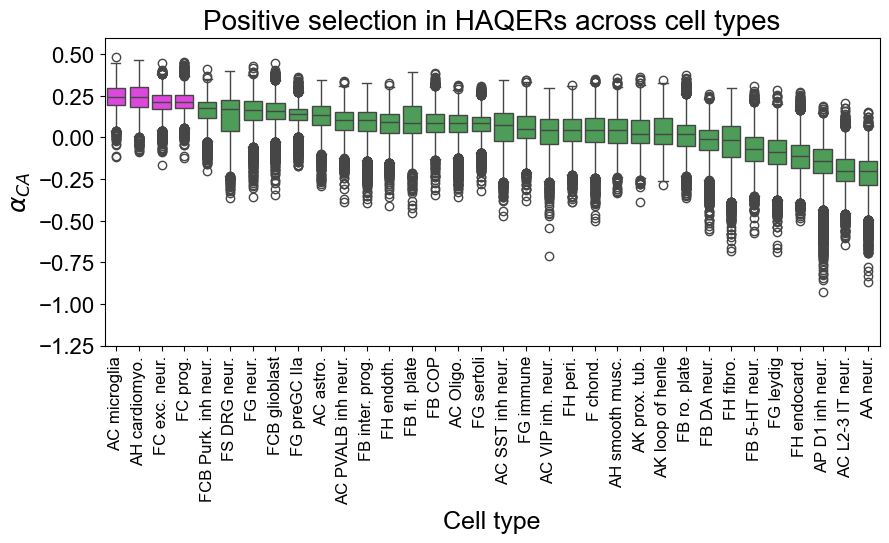

In [51]:
medians = []
ci = []
palette = {}
for ct in np.unique(df["Cell type"]):
    dff = df[df["Cell type"].isin([ct])]
    dff = dff.sort_values("alpha")
    ci.append([ct, list(dff["alpha"])[250], list(dff["alpha"])[9750]])
    medians.append([ct, np.median(dff["alpha"])])
    
df_med = pd.DataFrame(medians).sort_values(1, ascending = False)
order = list(df_med[0])

df_ci = pd.DataFrame(ci)
df_ci.columns = ["CellType", "Lower95", "Upper95"]
df_ci = df_ci.sort_values("Lower95", ascending = False)

for index, row in df_ci.iterrows():
    if row["Lower95"] > 0:
        palette[row["CellType"]] = "#F42FF5"
    else:
        palette[row["CellType"]] = "#40A94D"

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(data = df, y = "alpha", x = "Cell type", order = order, palette = palette)
plt.ylim(-1.25, 0.6)
plt.ylabel("$\\alpha_{CA}$", size = 18)
plt.xlabel("Cell type", size = 18)

plt.xticks(rotation = 90, size = 12)
plt.title("Positive selection in HAQERs across cell types", size = 20)
plt.yticks(size = 16)
df_ci

In [2]:
v = pd.read_csv("Fixed_LiangSteinNeuron.txt.gz", sep = "\t")
vv = pd.read_csv("Poly_MAF0.25_LiangSteinNeuron.txt.gz", sep = "\t")


try:
    vv = add_unfold(vv)
    vv_ref = vv[vv["Human ref"] == vv["Chimp ref"]]
    vv_alt = vv[vv["Human alt"] == vv["Chimp ref"]]
    vv_ref["fixed logfc"] = -vv_ref["logfc"].astype(float)
    vv_alt["fixed logfc"] = vv_alt["logfc"].astype(float)
    vv = pd.concat([vv_ref, vv_alt])
except:
    pass

te_blacklist = pd.read_csv("BlacklistTE_Variants.txt", sep = "\t")
    
v = v[~v["Position"].isin(te_blacklist["Position"])]
vv = vv[~vv["Position"].isin(te_blacklist["Position"])]



C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]
C:\Users\astar\AppData\Local\Temp\ipykernel_12212\2969482670.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [3]:
#v = v[v["SpecSup447"] > 250]
#vv = vv[vv["SpecSup447"] > 250]

v["Chrom"] = [x.split(":")[0] for x in v["Position"]]
v["Pos"] = [int(x.split(":")[1]) for x in v["Position"]]

vv["Chrom"] = [x.split(":")[0] for x in vv["Position"]]
vv["Pos"] = [int(x.split(":")[1]) for x in vv["Position"]]

In [28]:
neg_cut = list(v.sort_values("logfc")["logfc"])[100000]
pos_cut = list(v.sort_values("logfc")["logfc"])[-100001]
neg_cut

-0.1748835

In [29]:
pos_cut

0.17931141

In [4]:
neg_cut = list(v.sort_values("logfc")["logfc"])[30000]
pos_cut = list(v.sort_values("logfc")["logfc"])[-30001]

v_bl = v[v["logfc"] >= pos_cut]
v_bg = v[v["logfc"] <= neg_cut]

vv_bl = vv[vv["fixed logfc"] >= pos_cut]
vv_bg = vv[vv["fixed logfc"] <= neg_cut]

d_bl = {}
d_bg = {}

done = 0
for index, row in v_bl.iterrows():
    if row["Chrom"] in d_bl.keys():
        d_bl[row["Chrom"]] = d_bl[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_bl[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)
        
done = 0
for index, row in v_bg.iterrows():
    if row["Chrom"] in d_bg.keys():
        d_bg[row["Chrom"]] = d_bg[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_bg[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [5]:
d_pbl = {}
d_pbg = {}

done = 0
for index, row in vv_bl.iterrows():
    if row["Chrom"] in d_pbl.keys():
        d_pbl[row["Chrom"]] = d_pbl[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_pbl[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)
        
done = 0
for index, row in vv_bg.iterrows():
    if row["Chrom"] in d_pbg.keys():
        d_pbg[row["Chrom"]] = d_pbg[row["Chrom"]] + list(range(row["Pos"]-500, row["Pos"]+500))
    else:
        d_pbg[row["Chrom"]] = list(range(row["Pos"]-500, row["Pos"]+500))
    done += 1
    if done % 1000 == 0:
        print(done)

1000
2000
3000
4000
5000
6000
1000
2000
3000
4000
5000
6000


In [7]:
v_nbl = pd.DataFrame()
for key in d_bl.keys():
    v_nbl = pd.concat([v_nbl, v[(v["Chrom"].isin([key])) & (~v["Pos"].isin(d_bl[key]))]])

vv_nbl = pd.DataFrame()
for key in d_bl.keys():
    vv_nbl = pd.concat([vv_nbl, vv[(vv["Chrom"].isin([key])) & (~vv["Pos"].isin(d_bl[key]))]])

v_nbg = pd.DataFrame()
for key in d_bg.keys():
    v_nbg = pd.concat([v_nbg, v[(v["Chrom"].isin([key])) & (~v["Pos"].isin(d_bg[key]))]])

vv_nbg = pd.DataFrame()
for key in d_bg.keys():
    vv_nbg = pd.concat([vv_nbg, vv[(vv["Chrom"].isin([key])) & (~vv["Pos"].isin(d_bg[key]))]])


In [32]:
v_nbl = pd.DataFrame()
for key in d_bl.keys():
    v_nbl = pd.concat([v_nbl, v[(v["Chrom"].isin([key])) & (~v["Pos"].isin(d_bl[key])) & (~v["Pos"].isin(d_pbl[key]))]])

vv_nbl = pd.DataFrame()
for key in d_bl.keys():
    vv_nbl = pd.concat([vv_nbl, vv[(vv["Chrom"].isin([key])) & (~vv["Pos"].isin(d_bl[key])) & (~vv["Pos"].isin(d_pbl[key]))]])

v_nbg = pd.DataFrame()
for key in d_bg.keys():
    v_nbg = pd.concat([v_nbg, v[(v["Chrom"].isin([key])) & (~v["Pos"].isin(d_bg[key])) & (~v["Pos"].isin(d_pbg[key]))]])

vv_nbg = pd.DataFrame()
for key in d_bg.keys():
    vv_nbg = pd.concat([vv_nbg, vv[(vv["Chrom"].isin([key])) & (~vv["Pos"].isin(d_bg[key])) & (~vv["Pos"].isin(d_pbg[key]))]])


In [33]:
v_nbl

Position      Position.1 NearestGene  NearestDist  PhyloP447  \
0             chr1:15446      chr1:15446       OR4F5        53644     -1.587   
1             chr1:16497      chr1:16497       OR4F5        52593      0.010   
2             chr1:16580      chr1:16580       OR4F5        52510     -1.563   
3             chr1:19051      chr1:19051       OR4F5        50039     -0.060   
6             chr1:63569      chr1:63569       OR4F5         5521     -2.696   
...                  ...             ...         ...          ...        ...   
10326669  chrX:155616936  chrX:155616936       TMLHE         4008      0.312   
10326670  chrX:155617026  chrX:155617026       TMLHE         4098     -0.254   
10326671  chrX:155617083  chrX:155617083       TMLHE         4156      0.343   
10326686  chrX:155622096  chrX:155622096       TMLHE         9168     -0.084   
10326696  chrX:155626762  chrX:155626762       TMLHE        13834      0.302   

          PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
0                0.000         383 -0.132272            693.00910   
1                0.000         398 -0.013052            472.24908   
2                0.000         400  0.008982            437.20557   
3                0.000         411  0.025041            371.92870   
6                0.000         389  0.015984            183.20600   
...                ...         ...       ...                  ...   
10326669         0.004         296  0.011915            500.31888   
10326670         0.004         299 -0.009362            475.52112   
10326671         0.001         297  0.009234            459.35587   
10326686         0.000         257 -0.022767            327.04280   
10326696         0.000         376 -0.044440            171.79315   

          allele2_pred_counts  abs logfc Chrom        Pos FixedOrPoly  \
0                   632.29690   0.132272  chr1      15446       Fixed   
1                   467.99580   0.013052  chr1      16497       Fixed   
2                   439.93616   0.008982  chr1      16580       Fixed   
3                   378.44073   0.025041  chr1      19051       Fixed   
6                   185.24713   0.015984  chr1      63569       Fixed   
...                       ...        ...   ...        ...         ...   
10326669            504.46796   0.011915  chrX  155616936       Fixed   
10326670            472.44530   0.009362  chrX  155617026       Fixed   
10326671            462.30545   0.009234  chrX  155617083       Fixed   
10326686            321.92224   0.022767  chrX  155622096       Fixed   
10326696            166.58197   0.044440  chrX  155626762       Fixed   

         MAFMaxAcrossAncestry UnfoldedMAF  
0                           .           .  
1                           .           .  
2                           .           .  
3                           .           .  
6                           .           .  
...                       ...         ...  
10326669                    .           .  
10326670                    .           .  
10326671                    .           .  
10326686                    .           .  
10326696                    .           .  

[4992285 rows x 16 columns]

In [34]:
cuttt = 0.8
vvv = prepare_alpha(v_nbl, vv_nbl)
z = list(vv_nbl["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff, title = "PhyloP")
plt.show()
print("PhyloP alpha", alpha)
print("PhyloP p-value", (fisher_exact(alpha[2])[1] + fisher_exact(alpha[3])[1])/2)

PhyloP alpha (-0.022467591540767162, 0.6940000000000001, [[980755, 4011530], [219953, 879974]], [[981913, 4010372], [220244, 879683]])
PhyloP p-value 4.050933818043463e-17


In [41]:
v_nbl2 = v_nbl[(v_nbl["allele1_pred_counts"] > 530) | (v_nbl["allele2_pred_counts"] > 530)]
v_nbl2

Position      Position.1 NearestGene  NearestDist  PhyloP447  \
0             chr1:15446      chr1:15446       OR4F5        53644     -1.587   
77           chr1:794732     chr1:794732      SAMD11       131004     -1.090   
87           chr1:804737     chr1:804737      SAMD11       120999      0.484   
88           chr1:805472     chr1:805472      SAMD11       120264     -1.755   
218          chr1:864743     chr1:864743      SAMD11        60993     -0.568   
...                  ...             ...         ...          ...        ...   
10326659  chrX:155612732  chrX:155612732       TMLHE            0      0.140   
10326660  chrX:155613219  chrX:155613219       TMLHE            0     -0.072   
10326661  chrX:155613233  chrX:155613233       TMLHE            0      0.299   
10326662  chrX:155613258  chrX:155613258       TMLHE            0      1.123   
10326668  chrX:155616899  chrX:155616899       TMLHE         3972     -1.124   

          PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
0                0.000         383 -0.132272            693.00910   
77               0.000         308  0.003152           1040.95850   
87               0.000         254 -0.008853           1160.45310   
88               0.000         255  0.044262            877.35070   
218              0.000         259  0.063110           1085.58200   
...                ...         ...       ...                  ...   
10326659         0.000         417 -0.086546           3011.91060   
10326660         0.000         397  0.013143           1264.59120   
10326661         0.000         415 -0.027069           1211.88180   
10326662         0.029         398  0.010986           1137.82060   
10326668         0.000         296  0.019349            528.21515   

          allele2_pred_counts  abs logfc Chrom        Pos FixedOrPoly  \
0                   632.29690   0.132272  chr1      15446       Fixed   
77                 1043.23520   0.003152  chr1     794732       Fixed   
87                 1153.35420   0.008853  chr1     804737       Fixed   
88                  904.68530   0.044262  chr1     805472       Fixed   
218                1134.12450   0.063110  chr1     864743       Fixed   
...                       ...        ...   ...        ...         ...   
10326659           2836.54130   0.086546  chrX  155612732       Fixed   
10326660           1276.16460   0.013143  chrX  155613219       Fixed   
10326661           1189.35530   0.027069  chrX  155613233       Fixed   
10326662           1146.51780   0.010986  chrX  155613258       Fixed   
10326668            535.34717   0.019349  chrX  155616899       Fixed   

         MAFMaxAcrossAncestry UnfoldedMAF  
0                           .           .  
77                          .           .  
87                          .           .  
88                          .           .  
218                         .           .  
...                       ...         ...  
10326659                    .           .  
10326660                    .           .  
10326661                    .           .  
10326662                    .           .  
10326668                    .           .  

[1219697 rows x 16 columns]

In [42]:
v_nbl2 = v_nbl[(v_nbl["allele1_pred_counts"] > 530) | (v_nbl["allele2_pred_counts"] > 530)]
vv_nbl2 = vv_nbl[(vv_nbl["allele1_pred_counts"] > 530) | (vv_nbl["allele2_pred_counts"] > 530)]

vvv = prepare_alpha(v_nbl2, vv_nbl2)
z = list(vv_nbl2["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff, title = "PhyloP")
plt.show()
print("PhyloP alpha", alpha)
print("PhyloP p-value", (fisher_exact(alpha[2])[1] + fisher_exact(alpha[3])[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

PhyloP alpha (-0.028549425904057513, 0.841, [[238264, 981433], [54122, 216754]], [[238502, 981195], [54179, 216697]])
PhyloP p-value 1.2750298628142424e-07


In [43]:
cuttt = 0.8
vvv = prepare_alpha(v_nbg, vv_nbg)
z = list(vv_nbg["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff, title = "PhyloP")
plt.show()
print("PhyloP alpha", alpha)
print("PhyloP p-value", (fisher_exact(alpha[2])[1] + fisher_exact(alpha[3])[1])/2)

PhyloP alpha (-0.024693522788287403, 0.6990000000000001, [[981789, 4028622], [220715, 883793]], [[982973, 4027438], [220959, 883549]])
PhyloP p-value 2.1938373011151896e-20


In [44]:
v_nbg2 = v_nbg[(v_nbg["allele1_pred_counts"] > 530) | (v_nbg["allele2_pred_counts"] > 530)]
vv_nbg2 = vv_nbg[(vv_nbg["allele1_pred_counts"] > 530) | (vv_nbg["allele2_pred_counts"] > 530)]

vvv = prepare_alpha(v_nbg2, vv_nbg2)
z = list(vv_nbg2["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff, title = "PhyloP")
plt.show()
print("PhyloP alpha", alpha)
print("PhyloP p-value", (fisher_exact(alpha[2])[1] + fisher_exact(alpha[3])[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

PhyloP alpha (-0.0326826589016912, 0.86, [[233278, 964777], [53701, 215062]], [[233514, 964541], [53754, 215009]])
PhyloP p-value 1.9332251689594255e-09


In [26]:
cuttt = 0.8
vvv = prepare_alpha(v, vv)
z = list(vv["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff, title = "PhyloP")
plt.show()
print("PhyloP alpha", alpha)
print("PhyloP p-value", (fisher_exact(alpha[2])[1] + fisher_exact(alpha[3])[1])/2)

PhyloP alpha (-0.026396824325932156, 0.705, [[1075976, 4422997], [242047, 969384]], [[1077318, 4421655], [242345, 969086]])
PhyloP p-value 4.169570738074585e-25


In [47]:
cuttt = 0.8
v2 = v[(v["allele1_pred_counts"] > 530) | (v["allele2_pred_counts"] > 530)]
vv2 = vv[(vv["allele1_pred_counts"] > 530) | (vv["allele2_pred_counts"] > 530)]

vvv = prepare_alpha(v2, vv2)
z = list(vv2["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff, title = "PhyloP")
plt.show()
print("PhyloP alpha", alpha)
print("PhyloP p-value", (fisher_exact(alpha[2])[1] + fisher_exact(alpha[3])[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

PhyloP alpha (-0.038158745778490766, 0.861, [[285992, 1188031], [65692, 262888]], [[286261, 1187762], [65765, 262815]])
PhyloP p-value 1.0874213076464624e-14


In [46]:
pli = pd.read_csv("gnomad.v4.1.constraint_metrics.tsv", sep = "\t")
pli = pli.dropna()
pli = pli[pli["lof.pLI"] > 0.9]
keep_pli = pli["gene"]


In [50]:
vh = v[v["NearestGene"].isin(keep_pli)]
vvh = vv[vv["NearestGene"].isin(keep_pli)]

cuttt = 0.8

vvv = prepare_alpha(vh, vvh)
z = list(vvh["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff, title = "PhyloP")
plt.show()
print("PhyloP alpha", alpha)
print("PhyloP p-value", (fisher_exact(alpha[2])[1] + fisher_exact(alpha[3])[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

PhyloP alpha (-0.022139066479954672, 0.722, [[303037, 1240603], [63692, 255129]], [[303380, 1240260], [63775, 255046]])
PhyloP p-value 7.167821298660331e-06


In [54]:
vvv.sort_values("abs logfc")

FixedOrPoly  abs logfc MAFMaxAcrossAncestry UnfoldedMAF  \
2474842                   Fixed   0.000000                    .           .   
chr2:163772192-G-A  Polymorphic   0.000000             0.349717    0.349717   
944216                    Fixed   0.000000                    .           .   
3486462                   Fixed   0.000000                    .           .   
2212356                   Fixed   0.000000                    .           .   
...                         ...        ...                  ...         ...   
2928290                   Fixed   2.748434                    .           .   
4987742                   Fixed   2.794273                    .           .   
4300480                   Fixed   2.891492                    .           .   
7947174                   Fixed   2.918105                    .           .   
9675005                   Fixed   3.713986                    .           .   

                      PhyloP  
2474842             0.000000  
chr2:163772192-G-A  0.000000  
944216              0.000000  
3486462             0.000000  
2212356             0.000000  
...                      ...  
2928290             2.748434  
4987742             2.794273  
4300480             2.891492  
7947174             2.918105  
9675005             3.713986  

[1862461 rows x 5 columns]

In [55]:
vh = v[v["NearestGene"].isin(keep_pli)]
vvh = vv[vv["NearestGene"].isin(keep_pli)]

cuttt = 0.95

vvv = prepare_alpha(vh, vvh, stat = "abs logfc")
z = list(vvh["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff, title = "abs logfc")
plt.show()
print("abs logfc alpha", alpha)
print("abs logfc p-value", (fisher_exact(alpha[2])[1] + fisher_exact(alpha[3])[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

abs logfc alpha (-0.02256966116312986, 0.14715087, [[75564, 1468076], [15941, 302880]], [[75564, 1468076], [15942, 302879]])
abs logfc p-value 0.012744040844086226


In [6]:
v_bln = pd.DataFrame()
for key in d_bl.keys():
    v_blc = v_bl[v_bl["Chrom"].isin([key])]
    v_bln = pd.concat([v_bln, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_bl[key])) & (~v["Pos"].isin(v_blc["Pos"]))]])

vv_bln = pd.DataFrame()
for key in d_bl.keys():
    vv_blc = vv_bl[vv_bl["Chrom"].isin([key])]
    vv_bln = pd.concat([vv_bln, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_bl[key])) & (~vv["Pos"].isin(vv_blc["Pos"]))]])

v_bgn = pd.DataFrame()
for key in d_bg.keys():
    v_bgc = v_bg[v_bg["Chrom"].isin([key])]
    v_bgn = pd.concat([v_bgn, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_bg[key])) & (~v["Pos"].isin(v_bgc["Pos"]))]])

vv_bgn = pd.DataFrame()
for key in d_bg.keys():
    vv_bgc = vv_bg[vv_bg["Chrom"].isin([key])]
    vv_bgn = pd.concat([vv_bgn, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_bg[key])) & (~vv["Pos"].isin(vv_bgc["Pos"]))]])


In [21]:
def run_reinf_oppo(v_bln, vv_bln, v_bgn, vv_bgn, suffix = "None"):
    vx = v_bln[v_bln["abs logfc"] < 0.4]
    f_reinf = vx[vx["logfc"] > 0.2].shape[0]
    f_oppo = vx[vx["logfc"] < -0.2].shape[0]

    vvx = vv_bln[vv_bln["abs logfc"] < 0.4]
    p_reinf = vvx[vvx["fixed logfc"] > 0.2].shape[0]
    p_oppo = vvx[vvx["fixed logfc"] < -0.2].shape[0]

    print(suffix, "Decreasing CA, magnitude restriction", [[f_reinf, f_oppo], [p_reinf, p_oppo]], fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]]))

    f_reinf = v_bln[v_bln["logfc"] > 0.2].shape[0]
    f_oppo = v_bln[v_bln["logfc"] < -0.2].shape[0]

    p_reinf = vv_bln[vv_bln["fixed logfc"] > 0.2].shape[0]
    p_oppo = vv_bln[vv_bln["fixed logfc"] < -0.2].shape[0]

    print(suffix, "Decreasing CA, no magnitude restriction", [[f_reinf, f_oppo], [p_reinf, p_oppo]], fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]]))
    
    vx = v_bgn[v_bgn["abs logfc"] < 0.4]
    f_oppo = vx[vx["logfc"] > 0.2].shape[0]
    f_reinf = vx[vx["logfc"] < -0.2].shape[0]

    vvx = vv_bgn[vv_bgn["abs logfc"] < 0.4]
    p_oppo = vvx[vvx["fixed logfc"] > 0.2].shape[0]
    p_reinf = vvx[vvx["fixed logfc"] < -0.2].shape[0]

    print(suffix, "Increasing CA, magnitude restriction", [[f_reinf, f_oppo], [p_reinf, p_oppo]], fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]]))

    f_oppo = v_bgn[v_bgn["logfc"] > 0.2].shape[0]
    f_reinf = v_bgn[v_bgn["logfc"] < -0.2].shape[0]

    p_oppo = vv_bgn[vv_bgn["fixed logfc"] > 0.2].shape[0]
    p_reinf = vv_bgn[vv_bgn["fixed logfc"] < -0.2].shape[0]

    print(suffix, "Increasing CA, no magnitude restriction", [[f_reinf, f_oppo], [p_reinf, p_oppo]], fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]]))
    
    print("\n\nSelection on changes opposing loss of accessibility, no restriction on magnitude")

    v_bln["fixed logfc"] = v_bln["logfc"]
    vx = v_bln[v_bln["fixed logfc"] < 0].copy()
    vvx = vv_bln[vv_bln["fixed logfc"] < 0].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff, title = "PhyloP")
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    print("\n\nSelection on changes opposing loss of accessibility, with restriction on magnitude")

    v_bln["fixed logfc"] = v_bln["logfc"]
    vx = v_bln[(v_bln["fixed logfc"] < 0) & (v_bln["abs logfc"] < 0.4)].copy()
    vvx = vv_bln[(vv_bln["fixed logfc"] < 0) & (vv_bln["abs logfc"] < 0.4)].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)


    print("\n\nSelection on changes reinforcing loss of accessibility, magnitude is already restricted")

    v_bln["fixed logfc"] = v_bln["logfc"]
    vx = v_bln[v_bln["fixed logfc"] > 0].copy()
    vvx = vv_bln[vv_bln["fixed logfc"] > 0].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    print("\n\nSelection on changes opposing gain of accessibility, no restriction on magnitude")

    v_bgn["fixed logfc"] = v_bgn["logfc"]
    vx = v_bgn[v_bgn["fixed logfc"] > 0].copy()
    vvx = vv_bgn[vv_bgn["fixed logfc"] > 0].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    print("\n\nSelection on changes opposing gain of accessibility, with restriction on magnitude")

    v_bgn["fixed logfc"] = v_bgn["logfc"]
    vx = v_bgn[(v_bgn["fixed logfc"] > 0) & (v_bgn["abs logfc"] < 0.4)].copy()
    vvx = vv_bgn[(vv_bgn["fixed logfc"] > 0) & (vv_bgn["abs logfc"] < 0.4)].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    
    print("\n\nSelection on changes reinforcing gain of accessibility, magnitude is already restricted")

    v_bgn["fixed logfc"] = v_bgn["logfc"]
    vx = v_bgn[v_bgn["fixed logfc"] < 0].copy()
    vvx = vv_bgn[vv_bgn["fixed logfc"] < 0].copy()

    vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

    cuttt = 0.8

    z = list(vvx["abs logfc"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
    plt.show()
    print(suffix, "Abs logfc alpha", alpha)
    print(suffix, "Abs logfc p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

    vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

    cuttt = 0.8

    z = list(vvx["PhyloP447"])
    z.sort()
    cutoff = z[int(floor((len(z)*cuttt)))]

    alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
    plt.show()
    print(suffix, "PhyloP alpha", alpha)
    print(suffix, "PhyloP p-value", (fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)


None Decreasing CA, magnitude restriction [[1768, 2391], [360, 401]] SignificanceResult(statistic=0.8236535154979321, pvalue=0.015184355816802522)
None Decreasing CA, no magnitude restriction [[1768, 3281], [360, 531]] SignificanceResult(statistic=0.794818652849741, pvalue=0.0021422170990673677)
None Increasing CA, magnitude restriction [[2655, 2479], [387, 583]] SignificanceResult(statistic=1.6134131354540935, pvalue=1.5803356870445162e-11)
None Increasing CA, no magnitude restriction [[2655, 3393], [387, 838]] SignificanceResult(statistic=1.6943913255060008, pvalue=9.858815897747828e-16)


Selection on changes opposing loss of accessibility, no restriction on magnitude


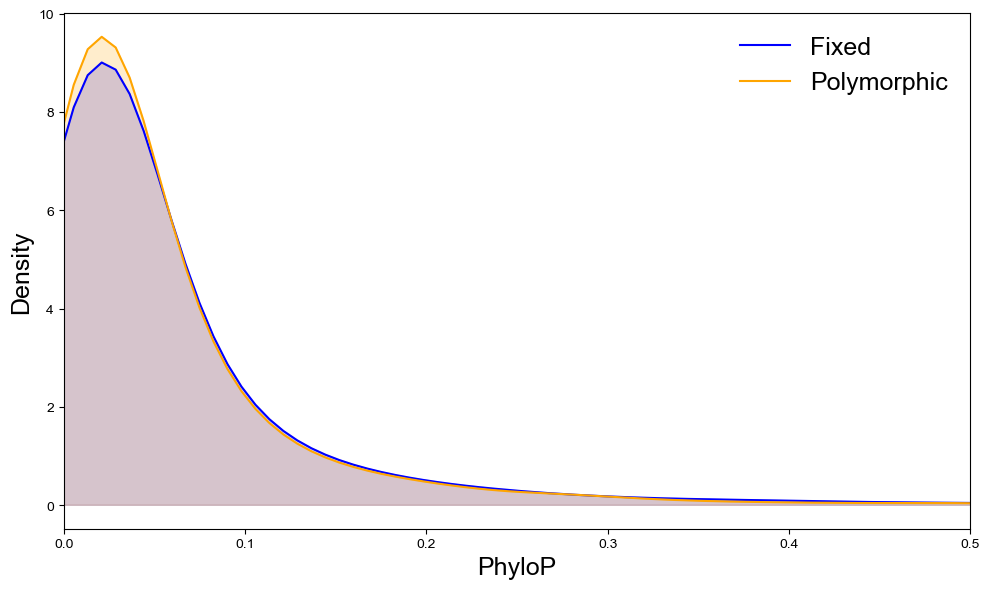

None Abs logfc alpha (0.06724948993363039, 0.074134275, [[12035, 44900], [2151, 8606]], [[12035, 44900], [2152, 8605]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.007804804690648771


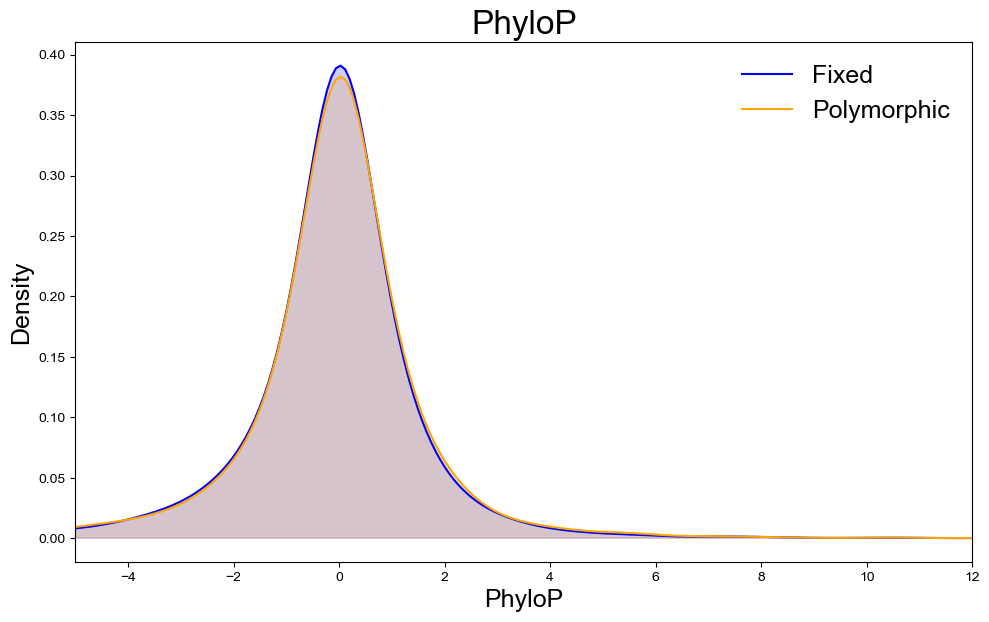

None PhyloP alpha (-0.08224716528275566, 0.7859999999999999, [[10675, 46260], [2150, 8607]], [[10689, 46246], [2152, 8605]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.0028464317642280077


Selection on changes opposing loss of accessibility, with restriction on magnitude


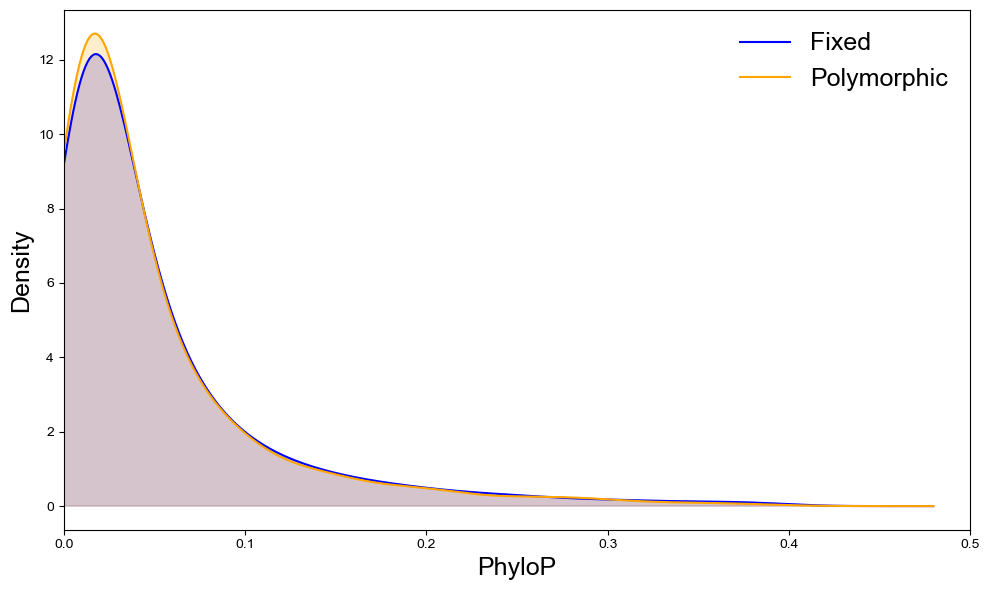

None Abs logfc alpha (0.04571094413201354, 0.07142886, [[11635, 44410], [2125, 8502]], [[11635, 44410], [2126, 8501]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.07764619596037733


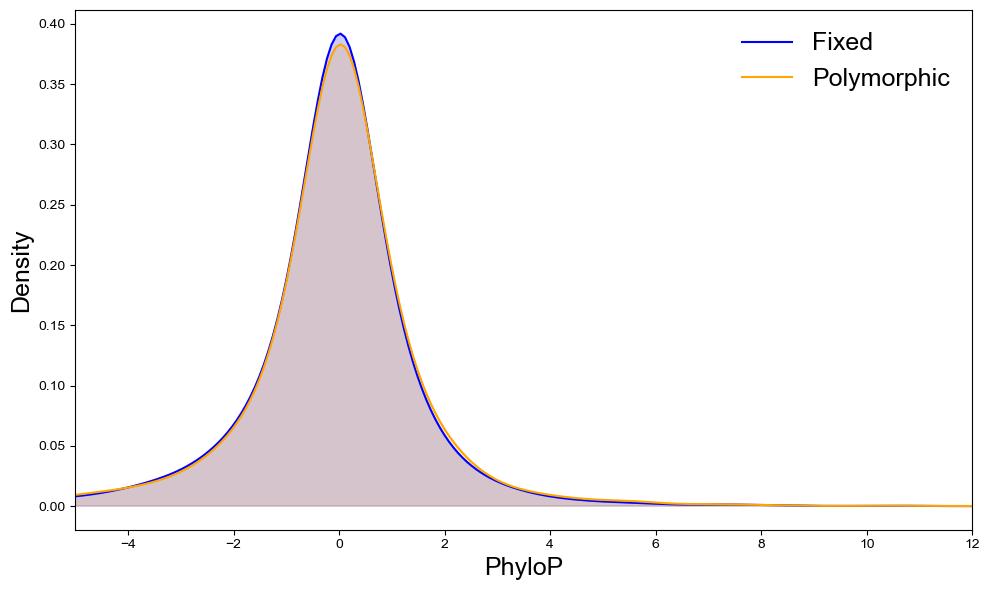

None PhyloP alpha (-0.08676154756506582, 0.784, [[10483, 45562], [2124, 8503]], [[10491, 45554], [2129, 8498]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.0018589634881416568


Selection on changes reinforcing loss of accessibility, magnitude is already restricted


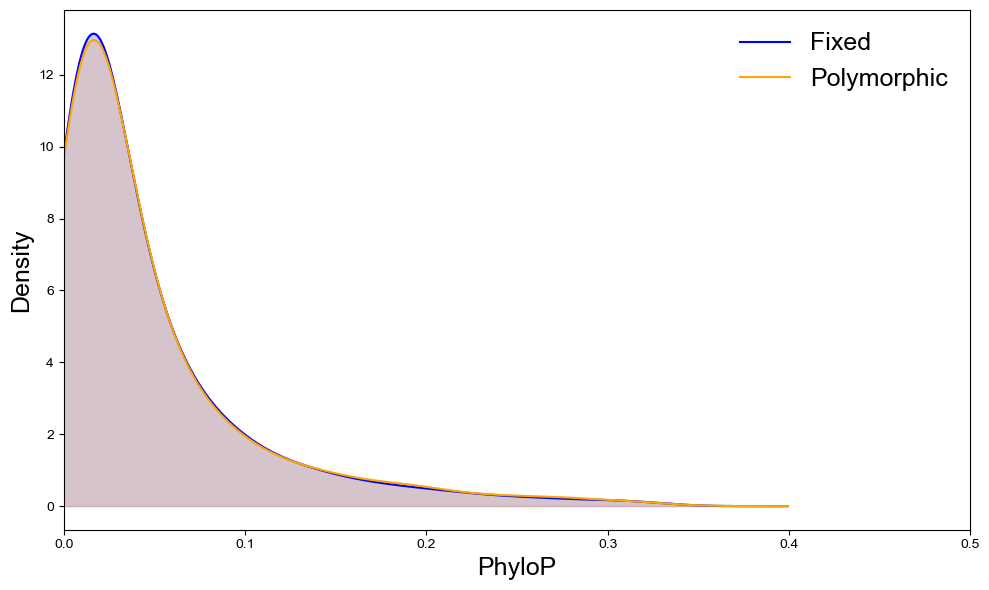

None Abs logfc alpha (-0.01249988761733678, 0.07201792, [[10541, 42704], [2059, 8241]], [[10541, 42704], [2060, 8240]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.6463021149740169


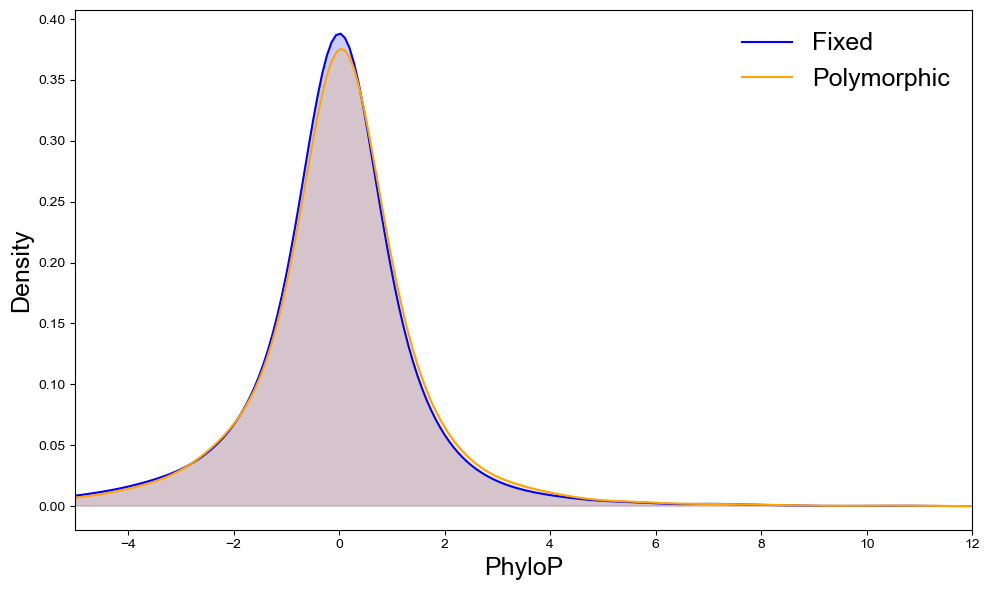

None PhyloP alpha (-0.13763327378136347, 0.816, [[9584, 43661], [2058, 8242]], [[9592, 43653], [2060, 8240]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 2.396082339777993e-06


Selection on changes opposing gain of accessibility, no restriction on magnitude


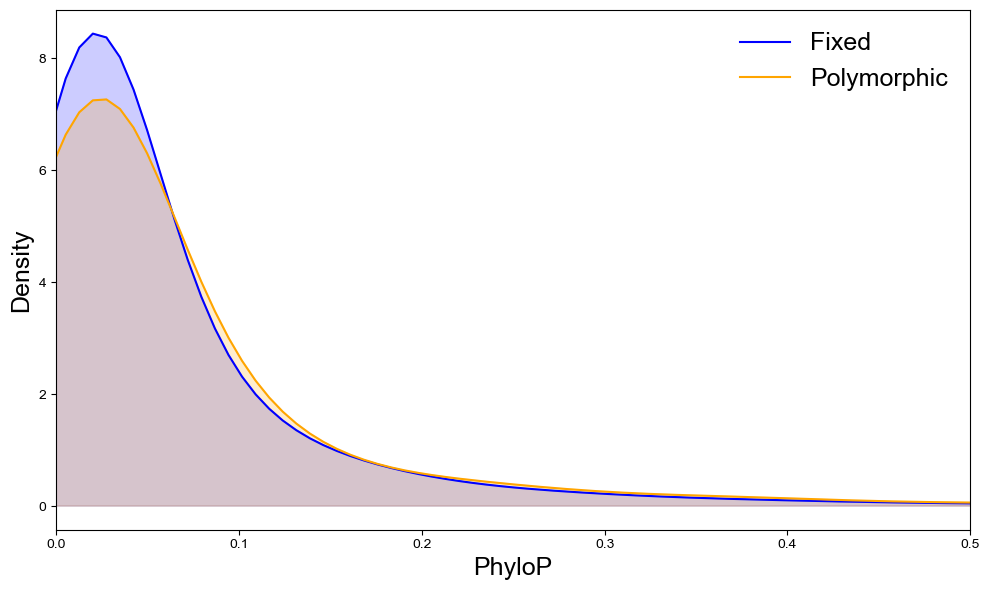

None Abs logfc alpha (-0.10531720184286097, 0.09042357, [[9588, 42399], [2018, 8076]], [[9588, 42399], [2019, 8075]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.00027191776600578364


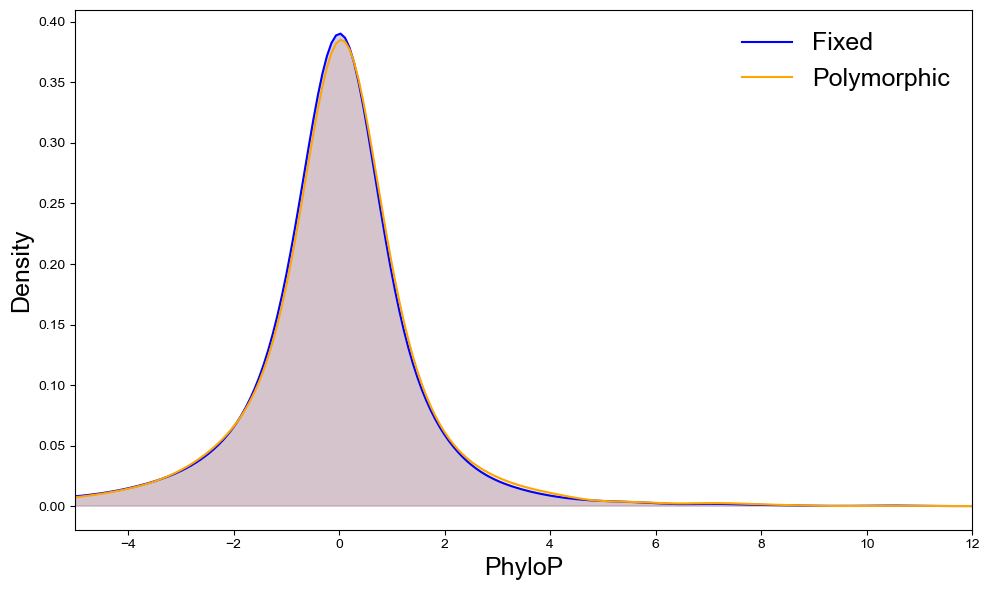

None PhyloP alpha (-0.09408502519574002, 0.7809999999999999, [[9669, 42318], [2018, 8076]], [[9677, 42310], [2021, 8073]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.0010801537081301083


Selection on changes opposing gain of accessibility, with restriction on magnitude


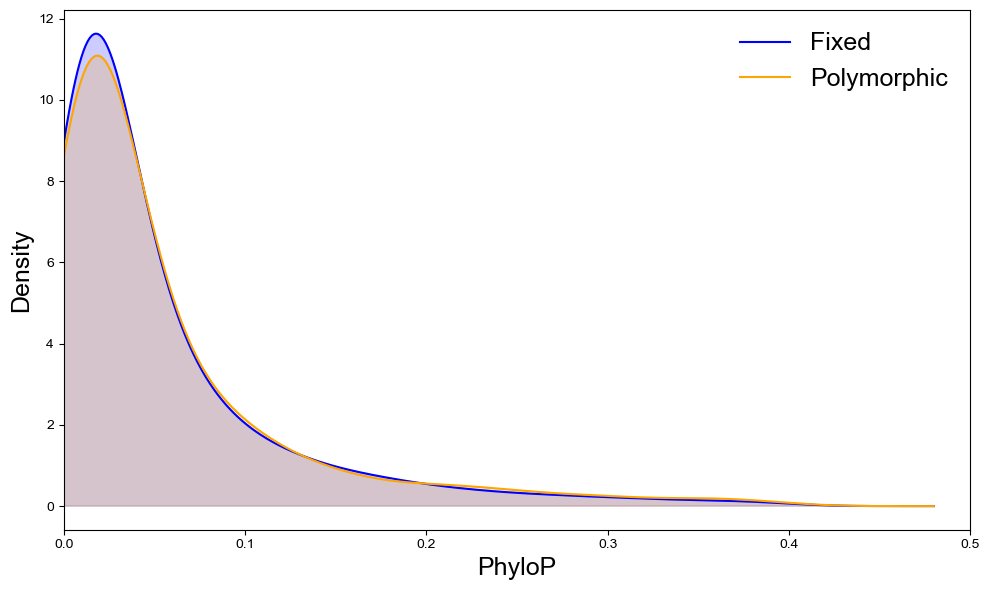

None Abs logfc alpha (-0.0725191081466211, 0.0825905, [[9653, 41420], [1967, 7872]], [[9653, 41420], [1968, 7871]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 0.01167702303625225


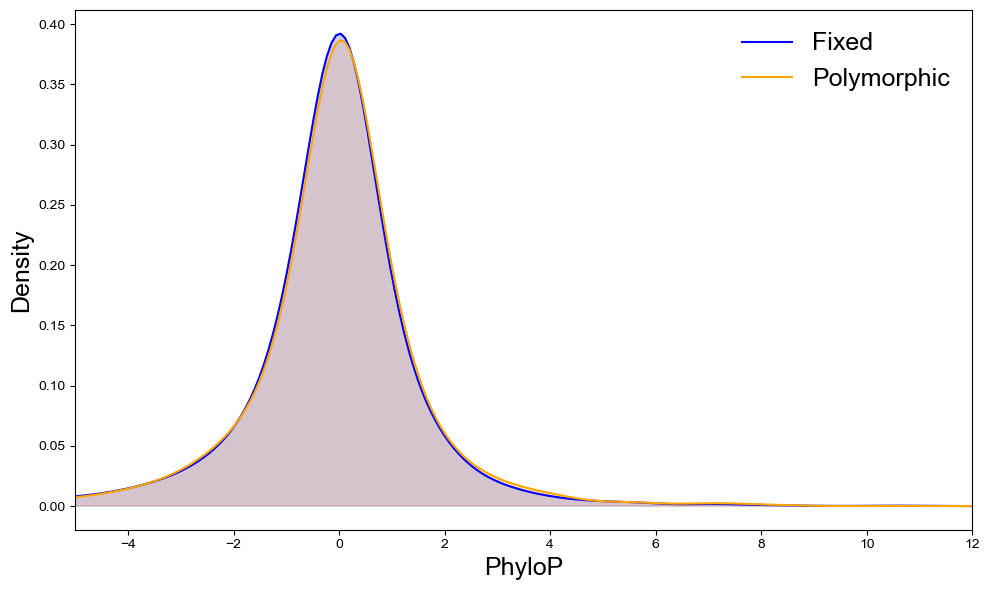

None PhyloP alpha (-0.0942547509406293, 0.773, [[9488, 41585], [1965, 7874]], [[9496, 41577], [1968, 7871]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.001227474898749522


Selection on changes reinforcing gain of accessibility, magnitude is already restricted


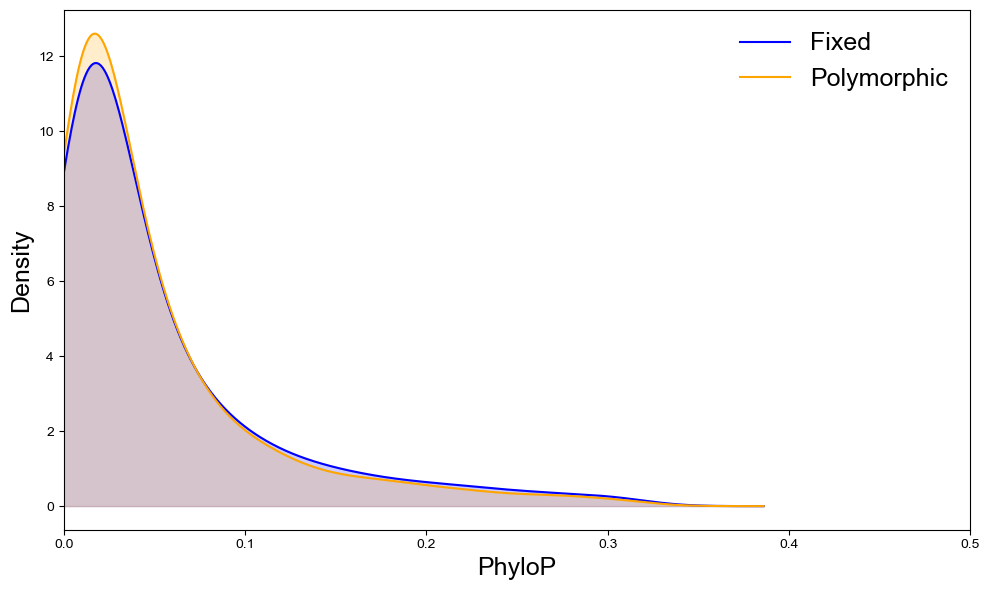

None Abs logfc alpha (0.12924390686602005, 0.07383225, [[12043, 41954], [1981, 7928]], [[12043, 41954], [1982, 7927]], <Figure size 1000x600 with 1 Axes>)
None Abs logfc p-value 2.798782259232138e-07


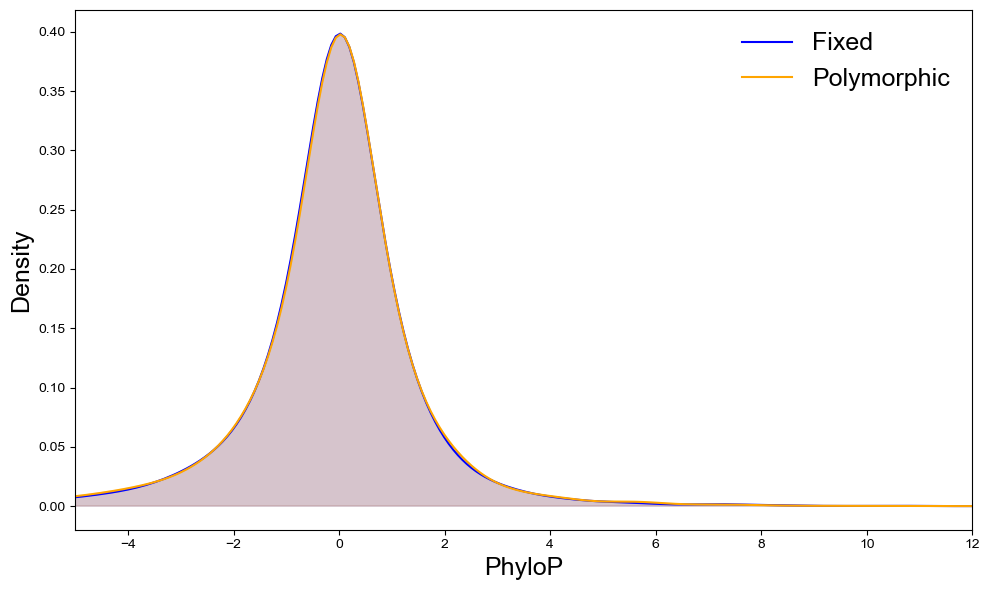

None PhyloP alpha (-0.028649244042944444, 0.73, [[10552, 43445], [1980, 7929]], [[10565, 43432], [1984, 7925]], <Figure size 1000x600 with 1 Axes>)
None PhyloP p-value 0.3054375003226021


In [22]:
run_reinf_oppo(v_bln, vv_bln, v_bgn, vv_bgn)


In [46]:
out

[['chrX',
  -0.079,
  1381,
  0.0139999999999999,
  389,
  0.024115134543057547,
  0.11822734286785966,
  0.9904998444699777,
  0.9408995507063995,
  -0.3118706348389305,
  0.172,
  [[465, 916], [155, 234]],
  [[465, 916], [156, 233]],
  0.6],
 ['chrX',
  -0.079,
  1381,
  0.0139999999999999,
  389,
  0.10571948296072589,
  0.11822734286785966,
  0.9549811126520915,
  0.9408995507063995,
  -0.23094363879951296,
  0.358,
  [[356, 1025], [116, 273]],
  [[356, 1025], [117, 272]],
  0.7],
 ['chrX',
  -0.079,
  1381,
  0.0139999999999999,
  389,
  0.857658421034067,
  0.11822734286785966,
  0.616727307765143,
  0.9408995507063995,
  -0.03206464632539907,
  0.596,
  [[270, 1111], [77, 312]],
  [[270, 1111], [79, 310]],
  0.8]]

In [83]:
np.random.shuffle(np.array(vk_shuf["Pos"]))

In [99]:
v2 = v[v["SpecSup447"] > 250]
vv2 = vv[vv["SpecSup447"] > 250]

out = []
out_w = []

metric = "PhyloP447"

for gene in np.intersect1d(v2["NearestGene"], vv2["NearestGene"]):
    
    if "-Dec" not in gene and "-Mar" not in gene and "-Sep" not in gene:
        vk = v2[v2["NearestGene"].isin([gene])]
        vvk = vv2[vv2["NearestGene"].isin([gene])]

        tot = list(vk["Pos"]) + list(vvk["Pos"])
        min_ = np.min(tot)
        max_ = np.max(tot)

        if max_ - min_ >= 150000:

            x2 = [np.float64(x) for x in list(vk[metric])]
            yvals2 = [np.float64(j) for j in list(vvk[metric])]
            yvals2.sort()

            vvv = prepare_alpha(vk, vvk, stat = metric)
            for cuttt in [0.6, 0.7, 0.8]:
                cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                table1 = alpha[2]
                table2 = alpha[3]
                out.append([gene, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt, "Real"])

            while min_ < max_:
                print(min_, max_, "Real")
                if min_ + 50000 < max_:
                    v2kw = vk[vk["Pos"].isin(range(min_, min_ + 50000))].copy()
                    vv2kw = vvk[vvk["Pos"].isin(range(min_, min_ + 50000))].copy()
                    if len(v2kw.index) >= 20 and len(vv2kw.index) >= 10:
                        window = list(v2kw["Chrom"])[0] + ":" + str(min_) + "-" + str(min_ + 50000)
                else:
                    v2kw = vk[vk["Pos"].isin(range(min_, max_))]
                    vv2kw = vvk[vvk["Pos"].isin(range(min_, max_))]
                    min_ = max_
                    if len(v2kw.index) >= 20 and len(vv2kw.index) >= 10:
                        window = list(v2kw["Chrom"])[0] + ":" + str(min_) + "-" + str(max_)

                x2 = [np.float64(x) for x in list(v2kw[metric])]
                yvals2 = [np.float64(j) for j in list(vv2kw[metric])]
                yvals2.sort()
                vvv = prepare_alpha(v2kw, vv2kw, stat = metric)
                if len(x2) >= 20 and len(yvals2) >= 10:
                    for cuttt in [0.6, 0.7, 0.8]:
                        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                        alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                        table1 = alpha[2]
                        table2 = alpha[3]
                        out_w.append([gene, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt, window, "Real"])

                min_ += 50000
                
            vk_shuf = vk.copy()
            vk_arr = np.array(vk_shuf["Pos"])
            np.random.shuffle(vk_arr)
            vk_shuf["Pos"] = vk_arr
            vvk_shuf = vvk.copy()
            vvk_arr = np.array(vvk_shuf["Pos"])
            np.random.shuffle(vvk_arr)
            vvk_shuf["Pos"] = vvk_arr
            
            tot = list(vk["Pos"]) + list(vvk["Pos"])
            min_ = np.min(tot)
            max_ = np.max(tot)
            
            while min_ < max_:
                print(min_, max_, "Shuffled")
                if min_ + 50000 < max_:
                    v2kw = vk_shuf[vk_shuf["Pos"].isin(range(min_, min_ + 50000))].copy()
                    vv2kw = vvk_shuf[vvk_shuf["Pos"].isin(range(min_, min_ + 50000))].copy()
                    if len(v2kw.index) >= 20 and len(vv2kw.index) >= 10:
                        window = list(v2kw["Chrom"])[0] + ":" + str(min_) + "-" + str(min_ + 50000)
                else:
                    v2kw = vk_shuf[vk_shuf["Pos"].isin(range(min_, min_ + 50000))].copy()
                    vv2kw = vvk_shuf[vvk_shuf["Pos"].isin(range(min_, min_ + 50000))].copy()
                    min_ = max_
                    if len(v2kw.index) >= 20 and len(vv2kw.index) >= 10:
                        window = list(v2kw["Chrom"])[0] + ":" + str(min_) + "-" + str(max_)

                x2 = [np.float64(x) for x in list(v2kw[metric])]
                yvals2 = [np.float64(j) for j in list(vv2kw[metric])]
                yvals2.sort()
                vvv = prepare_alpha(v2kw, vv2kw, stat = metric)
                print(len(x2), len(yvals2))
                if len(x2) >= 20 and len(yvals2) >= 10:
                    for cuttt in [0.6, 0.7, 0.8]:
                        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                        alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                        table1 = alpha[2]
                        table2 = alpha[3]
                        out_w.append([gene, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt, window, "ShuffledPositions"])

                min_ += 50000


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

125031522 125195865 Real
125081522 125195865 Real
125131522 125195865 Real
125181522 125195865 Real
125031522 125195865 Shuffled
36 9
125081522 125195865 Shuffled
70 16
125131522 125195865 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

81 18
125181522 125195865 Shuffled
28 7


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

151596464 151773965 Real
151646464 151773965 Real
151696464 151773965 Real
151746464 151773965 Real
151596464 151773965 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vvv = pd.concat([v2, vv2])
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

0 15
151646464 151773965 Shuffled
6 10
151696464 151773965 Shuffled
0 8
151746464 151773965 Shuffled
5 5


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

170058881 170951739 Real
170108881 170951739 Real
170158881 170951739 Real
170208881 170951739 Real
170258881 170951739 Real
170308881 170951739 Real
170358881 170951739 Real
170408881 170951739 Real
170458881 170951739 Real
170508881 170951739 Real
170558881 170951739 Real
170608881 170951739 Real
170658881 170951739 Real
170708881 170951739 Real
170758881 170951739 Real
170808881 170951739 Real
170858881 170951739 Real
170908881 170951739 Real


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

170058881 170951739 Shuffled
116 7
170108881 170951739 Shuffled
13 5
170158881 170951739 Shuffled
41 4
170208881 170951739 Shuffled
89 13
170258881 170951739 Shuffled
133 5
170308881 170951739 Shuffled
80 3
170358881 170951739 Shuffled
91 14
170408881 170951739 Shuffled
78 3
170458881 170951739 Shuffled
67 4
170508881 170951739 Shuffled
87 25
170558881 170951739 Shuffled
132 7
170608881 170951739 Shuffled
57 21
170658881 170951739 Shuffled
89 53
170708881 170951739 Shuffled
103 46
170758881 170951739 Shuffled
99 5
170808881 170951739 Shuffled
101 13
170858881 170951739 Shuffled
81 24
170908881 170951739 Shuffled
79 23


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

69540755 69692357 Real
69590755 69692357 Real
69640755 69692357 Real
69690755 69692357 Real
69540755 69692357 Shuffled
72 12


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["MAFMaxAcrossAncestry"] = z
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

69590755 69692357 Shuffled
80 53
69640755 69692357 Shuffled
49 25
69690755 69692357 Shuffled
2 1


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

36196129 36348085 Real
36246129 36348085 Real
36296129 36348085 Real
36346129 36348085 Real
36196129 36348085 Shuffled
102 8
36246129 36348085 Shuffled
114 10
36296129 36348085 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

166 10
36346129 36348085 Shuffled
9 1


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

106078771 106541646 Real
106128771 106541646 Real
106178771 106541646 Real
106228771 106541646 Real
106278771 106541646 Real
106328771 106541646 Real
106378771 106541646 Real
106428771 106541646 Real
106478771 106541646 Real
106528771 106541646 Real
106078771 106541646 Shuffled
94 9
106128771 106541646 Shuffled
110 4
106178771 106541646 Shuffled
104 6
106228771 106541646 Shuffled
70 3
106278771 106541646 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

98 5
106328771 106541646 Shuffled
155 10
106378771 106541646 Shuffled
198 36
106428771 106541646 Shuffled
116 41
106478771 106541646 Shuffled
126 24
106528771 106541646 Shuffled
30 8


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

122008699 122224453 Real
122058699 122224453 Real
122108699 122224453 Real
122158699 122224453 Real
122208699 122224453 Real


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

122008699 122224453 Shuffled
150 6
122058699 122224453 Shuffled
130 4
122108699 122224453 Shuffled
91 8
122158699 122224453 Shuffled
46 6
122208699 122224453 Shuffled
28 2
36947855 37152486 Real


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

36997855 37152486 Real
37047855 37152486 Real
37097855 37152486 Real
37147855 37152486 Real
36947855 37152486 Shuffled
0 22
36997855 37152486 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vvv = pd.concat([v2, vv2])
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vvv = pd.concat([v2, vv2])
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:42: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining th

0 6
37047855 37152486 Shuffled
9 15
37097855 37152486 Shuffled
11 22
37147855 37152486 Shuffled
1 0


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

104846248 105082126 Real
104896248 105082126 Real
104946248 105082126 Real
104996248 105082126 Real
105046248 105082126 Real
104846248 105082126 Shuffled
143 59


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

104896248 105082126 Shuffled
104 72
104946248 105082126 Shuffled
141 39
104996248 105082126 Shuffled
95 41
105046248 105082126 Shuffled
57 24


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

214974239 215218857 Real
215024239 215218857 Real
215074239 215218857 Real
215124239 215218857 Real
215174239 215218857 Real
214974239 215218857 Shuffled
158 11


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

215024239 215218857 Shuffled
153 59
215074239 215218857 Shuffled
126 21
215124239 215218857 Shuffled
100 21
215174239 215218857 Shuffled
85 13


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

48149662 48969568 Real
48199662 48969568 Real
48249662 48969568 Real
48299662 48969568 Real
48349662 48969568 Real
48399662 48969568 Real
48449662 48969568 Real
48499662 48969568 Real
48549662 48969568 Real
48599662 48969568 Real
48649662 48969568 Real
48699662 48969568 Real
48749662 48969568 Real
48799662 48969568 Real
48849662 48969568 Real
48899662 48969568 Real
48949662 48969568 Real
48149662 48969568 Shuffled
96 22


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

48199662 48969568 Shuffled
67 21
48249662 48969568 Shuffled
97 7
48299662 48969568 Shuffled
160 7
48349662 48969568 Shuffled
134 28
48399662 48969568 Shuffled
107 113
48449662 48969568 Shuffled
116 57
48499662 48969568 Shuffled
114 12
48549662 48969568 Shuffled
43 6
48599662 48969568 Shuffled
117 10
48649662 48969568 Shuffled
83 13
48699662 48969568 Shuffled
61 4
48749662 48969568 Shuffled
187 12
48799662 48969568 Shuffled
114 27
48849662 48969568 Shuffled
109 50
48899662 48969568 Shuffled
75 54
48949662 48969568 Shuffled
52 8


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

94015433 94178892 Real
94065433 94178892 Real
94115433 94178892 Real
94165433 94178892 Real
94015433 94178892 Shuffled
181 30


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

94065433 94178892 Shuffled
163 59
94115433 94178892 Shuffled
131 52
94165433 94178892 Shuffled
14 2


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

68778516 69007931 Real
68828516 69007931 Real
68878516 69007931 Real
68928516 69007931 Real
68978516 69007931 Real
68778516 69007931 Shuffled
43 26


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

68828516 69007931 Shuffled
61 8
68878516 69007931 Shuffled
99 13
68928516 69007931 Shuffled
59 20
68978516 69007931 Shuffled
37 3


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

20503029 20712213 Real
20553029 20712213 Real
20603029 20712213 Real
20653029 20712213 Real
20703029 20712213 Real
20503029 20712213 Shuffled
170 56
20553029 20712213 Shuffled
172 35


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

20603029 20712213 Shuffled
146 40
20653029 20712213 Shuffled
102 27
20703029 20712213 Shuffled
24 8


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

75044942 75213144 Real
75094942 75213144 Real
75144942 75213144 Real
75194942 75213144 Real


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:42: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  vvv = pd.concat([v2, vv2])
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

75044942 75213144 Shuffled
47 11
75094942 75213144 Shuffled
41 0
75144942 75213144 Shuffled
27 1
75194942 75213144 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:42: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  vvv = pd.concat([v2, vv2])
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:42: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  vvv = pd.concat([v2, vv2])


5 0


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

15926331 16085857 Real
15976331 16085857 Real
16026331 16085857 Real
16076331 16085857 Real
15926331 16085857 Shuffled
3 9
15976331 16085857 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

0 28
16026331 16085857 Shuffled
13 23
16076331 16085857 Shuffled
10 6


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

47804054 48194735 Real
47854054 48194735 Real
47904054 48194735 Real
47954054 48194735 Real
48004054 48194735 Real
48054054 48194735 Real
48104054 48194735 Real
48154054 48194735 Real
47804054 48194735 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

70 1
47854054 48194735 Shuffled
92 14
47904054 48194735 Shuffled
105 27
47954054 48194735 Shuffled
188 2
48004054 48194735 Shuffled
112 8
48054054 48194735 Shuffled
161 10
48104054 48194735 Shuffled
132 15
48154054 48194735 Shuffled
122 6


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

95007003 95421387 Real
95057003 95421387 Real
95107003 95421387 Real
95157003 95421387 Real
95207003 95421387 Real
95257003 95421387 Real
95307003 95421387 Real
95357003 95421387 Real
95407003 95421387 Real
95007003 95421387 Shuffled
162 23


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

95057003 95421387 Shuffled
98 24
95107003 95421387 Shuffled
162 22
95157003 95421387 Shuffled
168 42
95207003 95421387 Shuffled
93 32
95257003 95421387 Shuffled
54 21
95307003 95421387 Shuffled
13 2
95357003 95421387 Shuffled
20 8
95407003 95421387 Shuffled
13 1


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

80550070 80737317 Real
80600070 80737317 Real
80650070 80737317 Real
80700070 80737317 Real


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

80550070 80737317 Shuffled
114 20
80600070 80737317 Shuffled
110 18
80650070 80737317 Shuffled
75 18
80700070 80737317 Shuffled
107 28


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

89002362 89153241 Real
89052362 89153241 Real
89102362 89153241 Real
89152362 89153241 Real
89002362 89153241 Shuffled
31 8
89052362 89153241 Shuffled
79 22
89102362 89153241 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["MAFMaxAcrossAncestry"] = z
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

146 30
89152362 89153241 Shuffled
2 0


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:42: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  vvv = pd.concat([v2, vv2])
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

43657563 43965923 Real
43707563 43965923 Real
43757563 43965923 Real
43807563 43965923 Real
43857563 43965923 Real
43907563 43965923 Real
43957563 43965923 Real
43657563 43965923 Shuffled
48 2
43707563 43965923 Shuffled
53 5
43757563 43965923 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

68 11
43807563 43965923 Shuffled
68 18
43857563 43965923 Shuffled
114 19
43907563 43965923 Shuffled
72 25
43957563 43965923 Shuffled
14 11


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

26779371 26957109 Real
26829371 26957109 Real
26879371 26957109 Real
26929371 26957109 Real


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

26779371 26957109 Shuffled
34 6
26829371 26957109 Shuffled
16 39
26879371 26957109 Shuffled
24 16
26929371 26957109 Shuffled
24 23


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

100851608 101156907 Real
100901608 101156907 Real
100951608 101156907 Real
101001608 101156907 Real
101051608 101156907 Real
101101608 101156907 Real
101151608 101156907 Real
100851608 101156907 Shuffled
165 43


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

100901608 101156907 Shuffled
154 7
100951608 101156907 Shuffled
185 31
101001608 101156907 Shuffled
69 19
101051608 101156907 Shuffled
115 49
101101608 101156907 Shuffled
76 35
101151608 101156907 Shuffled
12 1


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

114531404 114739944 Real
114581404 114739944 Real
114631404 114739944 Real
114681404 114739944 Real
114731404 114739944 Real
114531404 114739944 Shuffled
162 43
114581404 114739944 Shuffled
182 35


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

114631404 114739944 Shuffled
126 32
114681404 114739944 Shuffled
159 18
114731404 114739944 Shuffled
30 2


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

106714362 107132335 Real
106764362 107132335 Real
106814362 107132335 Real
106864362 107132335 Real
106914362 107132335 Real
106964362 107132335 Real
107014362 107132335 Real
107064362 107132335 Real
107114362 107132335 Real
106714362 107132335 Shuffled


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

80 13
106764362 107132335 Shuffled
137 30
106814362 107132335 Shuffled
186 43
106864362 107132335 Shuffled
81 28
106914362 107132335 Shuffled
105 38
106964362 107132335 Shuffled
68 5
107014362 107132335 Shuffled
41 11
107064362 107132335 Shuffled
88 26
107114362 107132335 Shuffled
42 19


KeyboardInterrupt: 

In [98]:
vk_shuf

Position       Position.1 NearestGene  NearestDist  PhyloP447  \
1636931  chr11:106078771  chr11:106078771    AASDHPPT         1088     -7.074   
1636932  chr11:106079405  chr11:106079405    AASDHPPT         1722     -0.290   
1636933  chr11:106080027  chr11:106080027    AASDHPPT         2344     -2.081   
1636935  chr11:106080351  chr11:106080351    AASDHPPT         2668     -0.397   
1636938  chr11:106080946  chr11:106080946    AASDHPPT         3263     -0.008   
...                  ...              ...         ...          ...        ...   
1638924  chr11:106539933  chr11:106539933    AASDHPPT       462250     -1.517   
1638925  chr11:106540020  chr11:106540020    AASDHPPT       462337     -1.511   
1638926  chr11:106540898  chr11:106540898    AASDHPPT       463215      2.967   
1638928  chr11:106541505  chr11:106541505    AASDHPPT       463822      0.030   
1638929  chr11:106541646  chr11:106541646    AASDHPPT       463963     -0.106   

         PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
1636931           0.0         407 -0.007233           661.983640   
1636932           0.0         432 -0.001656           419.206180   
1636933           0.0         391  0.018500           372.561160   
1636935           0.0         402 -0.051980           383.493930   
1636938           0.0         377  0.027673           339.504400   
...               ...         ...       ...                  ...   
1638924           0.0         358 -0.025597           280.450320   
1638925           0.0         257  0.098591           263.317750   
1638926           1.0         357  0.002907           282.095580   
1638928           0.0         314 -0.001943           106.288570   
1638929           0.0         292 -0.024742            72.247894   

         allele2_pred_counts  abs logfc  Chrom   Pos FixedOrPoly  \
1636931            658.67300   0.007233  chr11  None       Fixed   
1636932            418.72516   0.001656  chr11  None       Fixed   
1636933            377.36948   0.018500  chr11  None       Fixed   
1636935            369.92267   0.051980  chr11  None       Fixed   
1636938            346.07953   0.027673  chr11  None       Fixed   
...                      ...        ...    ...   ...         ...   
1638924            275.51830   0.025597  chr11  None       Fixed   
1638925            281.94144   0.098591  chr11  None       Fixed   
1638926            282.66450   0.002907  chr11  None       Fixed   
1638928            106.14549   0.001943  chr11  None       Fixed   
1638929             71.01941   0.024742  chr11  None       Fixed   

        MAFMaxAcrossAncestry UnfoldedMAF  
1636931                    .           .  
1636932                    .           .  
1636933                    .           .  
1636935                    .           .  
1636938                    .           .  
...                      ...         ...  
1638924                    .           .  
1638925                    .           .  
1638926                    .           .  
1638928                    .           .  
1638929                    .           .  

[1101 rows x 16 columns]

In [73]:
out = []
out_w = []

metric = "abs logfc"

for gene in np.intersect1d(v["NearestGene"], vv["NearestGene"]):
    
    if "-Dec" not in gene and "-Mar" not in gene and "-Sep" not in gene:
        vk = v[v["NearestGene"].isin([gene])]
        vvk = vv[vv["NearestGene"].isin([gene])]

        tot = list(vk["Pos"]) + list(vvk["Pos"])
        min_ = np.min(tot)
        max_ = np.max(tot)

        if max_ - min_ >= 150000:

            x2 = [np.float64(x) for x in list(vk[metric])]
            yvals2 = [np.float64(j) for j in list(vvk[metric])]
            yvals2.sort()

            vvv = prepare_alpha(vk, vvk, stat = metric)
            for cuttt in [0.6, 0.7, 0.8]:
                cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                table1 = alpha[2]
                table2 = alpha[3]
                out.append([gene, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt])

            while min_ < max_:
                
                if min_ + 50000 < max_:
                    vkw = vk[vk["Pos"].isin(range(min_, min_ + 50000))].copy()
                    vvkw = vvk[vvk["Pos"].isin(range(min_, min_ + 50000))].copy()
                    if len(vkw.index) >= 20 and len(vvkw.index) >= 10:
                        window = list(vkw["Chrom"])[0] + ":" + str(min_) + "-" + str(min_ + 50000)
                else:
                    vkw = vk[vk["Pos"].isin(range(min_, max_))]
                    vvkw = vvk[vvk["Pos"].isin(range(min_, max_))]
                    min_ = max_
                    if len(vkw.index) >= 20 and len(vvkw.index) >= 10:
                        window = list(vkw["Chrom"])[0] + ":" + str(min_) + "-" + str(max_)

                x2 = [np.float64(x) for x in list(vkw[metric])]
                yvals2 = [np.float64(j) for j in list(vvkw[metric])]
                yvals2.sort()
                vvv = prepare_alpha(vkw, vvkw, stat = metric)
                if len(x2) >= 20 and len(yvals2) >= 10:
                    for cuttt in [0.6, 0.7, 0.8]:
                        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                        alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                        table1 = alpha[2]
                        table2 = alpha[3]
                        out_w.append([gene, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt, window])

                min_ += 50000

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["MAFMaxAcrossAncestry"] = z
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

KeyboardInterrupt: 

In [100]:
df = pd.DataFrame(out)
df.columns = ["Term", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion", "ShufOrReal"]

dfw = pd.DataFrame(out_w)
dfw.columns = ["Term", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion", "Window", "ShufOrReal"]


In [102]:
dfw[dfw["ShufOrReal"] == "ShuffledPositions"]

Term  Median Fixed PhyloP  Number Fixed Variants  \
6    AACS               -0.651                     70   
7    AACS               -0.651                     70   
8    AACS               -0.651                     70   
9    AACS               -0.387                     81   
10   AACS               -0.387                     81   
..    ...                  ...                    ...   
547  ABRA               -0.048                     88   
548  ABRA               -0.048                     88   
549  ABRA               -0.044                     42   
550  ABRA               -0.044                     42   
551  ABRA               -0.044                     42   

     Median Polymorphic PhyloP  Number Polymorphic Variants  \
6                      -0.4715                           16   
7                      -0.4715                           16   
8                      -0.4715                           16   
9                      -0.3120                           18   
10                     -0.3120                           18   
..                         ...                          ...   
547                    -0.0325                           26   
548                    -0.0325                           26   
549                    -0.2400                           19   
550                    -0.2400                           19   
551                    -0.2400                           19   

     Fisher exact p-value  MWU p-value  Fisher exact p-value; alt greater  \
6                0.891821     0.977867                           0.548554   
7                0.589722     0.977867                           0.357471   
8                0.770605     0.977867                           0.421428   
9                0.269104     0.673130                           0.940104   
10               0.572844     0.673130                           0.819161   
..                    ...          ...                                ...   
547              0.216339     0.805300                           0.938730   
548              0.445252     0.805300                           0.885059   
549              0.502519     0.993787                           0.317380   
550              0.771611     0.993787                           0.768683   
551              0.568124     0.993787                           0.851484   

     MWU p-value; alt greater     alpha  Cutoff [[dc1, du1], [pc1, pu1]]  \
6                    0.488933  0.081481  -0.420      [[30, 40], [6, 10]]   
7                    0.488933  0.333333  -0.193      [[26, 44], [4, 12]]   
8                    0.488933  0.294872  -0.002      [[20, 50], [3, 13]]   
9                    0.336565 -1.051948   0.091      [[21, 60], [7, 11]]   
10                   0.336565 -0.443320   0.184      [[19, 62], [5, 13]]   
..                        ...       ...     ...                      ...   
547                  0.599961 -0.977973   0.642      [[15, 73], [7, 19]]   
548                  0.599961 -0.703968   0.837      [[12, 76], [5, 21]]   
549                  0.496894  0.344697  -0.031      [[21, 21], [7, 12]]   
550                  0.496894 -0.309890   0.296      [[10, 32], [5, 14]]   
551                  0.496894 -0.680417   0.662       [[5, 37], [3, 16]]   

    [[dc2, du2], [pc2, pu2]]  Proportion                     Window  \
6         [[30, 40], [7, 9]]         0.6  chr12:125081522-125131522   
7        [[26, 44], [5, 11]]         0.7  chr12:125081522-125131522   
8        [[20, 50], [4, 12]]         0.8  chr12:125081522-125131522   
9        [[21, 60], [8, 10]]         0.6  chr12:125131522-125181522   
10       [[19, 62], [6, 12]]         0.7  chr12:125131522-125181522   
..                       ...         ...                        ...   
547      [[15, 73], [8, 18]]         0.7   chr8:107064362-107114362   
548      [[12, 76], [6, 20]]         0.8   chr8:107064362-107114362   
549      [[21, 21], [8, 11]]         0.6   chr8:107132335-107132335   
550      [[10, 

In [105]:
df["Stat"] = -np.log10(df["Fisher exact p-value"])*np.sign(df["alpha"])
dfw["Stat"] = -np.log10(dfw["Fisher exact p-value"])*np.sign(dfw["alpha"])

df2 = df[df["Proportion"] == 0.6]
dfw2 = dfw[dfw["Proportion"] == 0.6]
dfw2 = dfw2[dfw2["ShufOrReal"] == "Real"]
new = []

for gene in np.unique(dfw2["Term"]):
    dfw2g = dfw2[dfw2["Term"] == gene]
    new.append([gene, np.mean(dfw2g["Stat"])])
dff = pd.DataFrame(new).set_index(0)
dff.columns = ["Window Mean"]
dff = dff.join(df2.set_index("Term"))
dff

Window Mean  Median Fixed PhyloP  Number Fixed Variants  \
0                                                                   
AACS         0.212989              -0.4490                    215   
AADAT        0.048431              -0.0480                   1536   
AAK1         0.033061               0.2380                    203   
AAR2         0.089267               0.1620                    391   
AASDHPPT    -0.100470              -0.0170                   1101   
ABCA1       -0.272394               0.0070                    540   
ABCA12      -0.072463               0.1255                    622   
ABCA13      -0.301438              -0.2970                   1732   
ABCA4       -0.063541               0.0360                    489   
ABCA8       -0.393457              -0.1970                    299   
ABCB5       -0.063469               0.0775                    614   
ABCB7       -0.123822               0.3255                    120   
ABCC12       0.831069              -0.0555                    982   
ABCC4       -0.287086              -0.1120                    783   
ABHD17C     -0.524330              -0.3385                    406   
ABHD2       -0.276700               0.0375                    258   
ABHD5       -0.068830              -0.0360                    437   
ABI1         0.392600              -0.0115                     98   
ABI3BP       0.273039               0.0455                    776   
ABLIM1      -0.085029              -0.0250                    659   
ABRA        -0.141908              -0.0155                    828   

          Median Polymorphic PhyloP  Number Polymorphic Variants  \
0                                                                  
AACS                        -0.4370                           50   
AADAT                       -0.0670                          275   
AAK1                         0.2940                           91   
AAR2                         0.1350                           29   
AASDHPPT                    -0.0455                          146   
ABCA1                        0.1100                          235   
ABCA12                       0.2120                          125   
ABCA13                      -0.2370                          451   
ABCA4                        0.0590                          143   
ABCA8                       -0.0215                           70   
ABCB5                        0.0305                          166   
ABCB7                        0.4970                           12   
ABCC12                      -0.3270                           83   
ABCC4                       -0.0840                          175   
ABHD17C                     -0.1300                           84   
ABHD2                        0.2965                           60   
ABHD5                       -0.0930                           91   
ABI1                         0.1075                           84   
ABI3BP                       0.0370                          185   
ABLIM1                      -0.0225                          130   
ABRA                         0.0220                          213   

          Fisher exact p-value  MWU p-value  \
0                                             
AACS                  0.936838     0.771916   
AADAT                 0.595980     0.607821   
AAK1                  0.750660     0.543901   
AAR2                  0.847614     0.552669   
AASDHPPT              0.929054     0.287649   
ABCA1                 0.194200     0.153514   
ABCA12                0.446691     0.433958   
ABCA13                0.009149     0.063319   
ABCA4                 0.923079     0.564881   
ABCA8                 0.267465     0.927595   
ABCB5                 0.756250     0.987454   
ABCB7                 0.878466     0.593130   
ABCC12                0.002721     0.013664   
ABCC4                 0.230099     0.499136   
ABHD17C               0.208103     0.092063   
ABHD2                 0.408041     0.334965   
ABHD5      

SignificanceResult(statistic=0.7129870129870131, pvalue=0.00028592281159081385)


<Axes: xlabel='Window Mean', ylabel='Stat'>

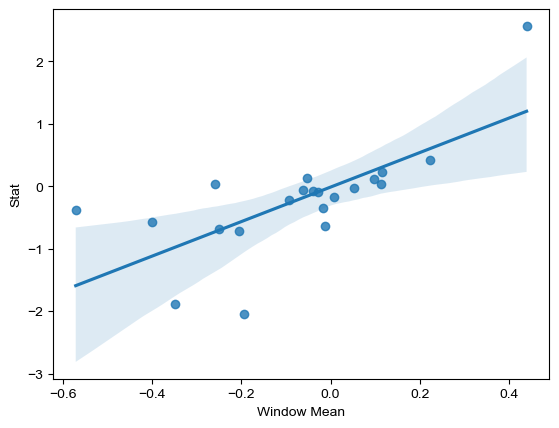

In [104]:
from scipy.stats import spearmanr
print(spearmanr(dff["Window Mean"], dff["Stat"]))
sns.regplot(x = dff["Window Mean"], y = dff["Stat"])

SignificanceResult(statistic=0.6610389610389611, pvalue=0.0011040228328465572)


<Axes: xlabel='Window Mean', ylabel='Stat'>

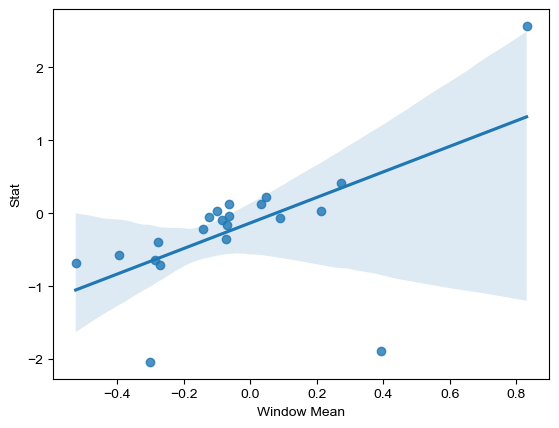

In [106]:
from scipy.stats import spearmanr
print(spearmanr(dff["Window Mean"], dff["Stat"]))
sns.regplot(x = dff["Window Mean"], y = dff["Stat"])

In [26]:
v_enc = pd.read_csv("HumChp_NC_Final_Rmdup_CREs_NoHLA.bed", sep = '\t', usecols = ["Position", "ENCODE", "ENCODEname"])
vv_enc = pd.read_csv("HumPoly_NC_Final_CREs_NoHLA.bed", sep = "\t", usecols = ["Position", "ENCODE", "ENCODEname"])

In [27]:
ve = v[v["Position"].isin(v_enc[v_enc["ENCODE"] == 1]["Position"])]
vve = vv[vv["Position"].isin(vv_enc[vv_enc["ENCODE"] == 1]["Position"])]

vne = v[v["Position"].isin(v_enc[v_enc["ENCODE"] == 0]["Position"])]
vvne = vv[vv["Position"].isin(vv_enc[vv_enc["ENCODE"] == 0]["Position"])]

In [29]:
vvv = prepare_alpha(ve, vve)
cuttt = 0.8

z = list(vve["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

compute_alpha_cutoff(vvv, cutoff = cutoff)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.03847357457647371,
 0.08677912,
 [[462659, 592678], [107657, 132802]],
 [[462659, 592678], [107657, 132802]])

In [30]:
vvv = prepare_alpha(vne, vvne)
cuttt = 0.8

z = list(vve["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

compute_alpha_cutoff(vvv, cutoff = cutoff)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.050800682855713264,
 0.08677912,
 [[3840858, 5133956], [916801, 1166215]],
 [[3840858, 5133956], [916801, 1166215]])

In [34]:
vvv = prepare_alpha(ve[ve["SpecSup447"] > 250], vve[vve["SpecSup447"] > 250])
cuttt = 0.8

z = list(vve[vve["SpecSup447"] > 250]["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

compute_alpha_cutoff(vvv, cutoff = cutoff)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.02991772769889156,
 0.09005694,
 [[327288, 400231], [74124, 88011]],
 [[327288, 400231], [74124, 88011]])

In [35]:
vvv = prepare_alpha(vne[vne["SpecSup447"] > 250], vvne[vvne["SpecSup447"] > 250])
cuttt = 0.8

z = list(vvne[vvne["SpecSup447"] > 250]["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

compute_alpha_cutoff(vvv, cutoff = cutoff)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.01754935124344592,
 0.05124197,
 [[2147213, 2624241], [476718, 572578]],
 [[2147213, 2624241], [476718, 572578]])

In [36]:
vvv = prepare_alpha(ve[ve["allele1_pred_counts"] > 550], vve[vve["allele1_pred_counts"] > 550])
cuttt = 0.8

z = list(vve[vve["allele1_pred_counts"] > 550]["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

compute_alpha_cutoff(vvv, cutoff = cutoff)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.043623709851555725,
 0.111713886,
 [[212660, 283337], [49925, 63737]],
 [[212660, 283337], [49925, 63737]])

In [37]:
vvv = prepare_alpha(vne[vne["allele1_pred_counts"] > 550], vvne[vvne["allele1_pred_counts"] > 550])
cuttt = 0.8

z = list(vve[vve["allele1_pred_counts"] > 550]["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

compute_alpha_cutoff(vvv, cutoff = cutoff)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.0383139473006302,
 0.111713886,
 [[579794, 809854], [136792, 184020]],
 [[579794, 809854], [136792, 184020]])

In [40]:
vvv = prepare_alpha(ve[(ve["allele1_pred_counts"] > 550) & (ve["SpecSup447"] > 250)], vve[(vve["allele1_pred_counts"] > 550) & (vve["SpecSup447"] > 250)])
cuttt = 0.9

z = list(vve[(vve["allele1_pred_counts"] > 550) & (vve["SpecSup447"] > 250)]["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

compute_alpha_cutoff(vvv, cutoff = cutoff)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.03706373615810943,
 0.18407899,
 [[154702, 218765], [35358, 48213]],
 [[154702, 218765], [35358, 48213]])

In [41]:
vvv = prepare_alpha(vne[(vne["allele1_pred_counts"] > 550) & (vne["SpecSup447"] > 250)], vvne[(vvne["allele1_pred_counts"] > 550) & (vvne["SpecSup447"] > 250)])
cuttt = 0.9

z = list(vvne[(vvne["allele1_pred_counts"] > 550) & (vvne["SpecSup447"] > 250)]["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

compute_alpha_cutoff(vvv, cutoff = cutoff)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.021752816165814703,
 0.13324875,
 [[405820, 566326], [91457, 124912]],
 [[405820, 566326], [91457, 124912]])

In [205]:
def run_reinf_oppo(v_bln, vv_bln, v_bgn, vv_bgn, out1, out2, suffix = "None"):
    
    for cut in [0.05, 0.1, 0.2]:
        vx = v_bln[v_bln["abs logfc"] < 0.4]
        f_reinf = vx[vx["logfc"] > cut].shape[0]
        f_oppo = vx[vx["logfc"] < -cut].shape[0]

        vvx = vv_bln[vv_bln["abs logfc"] < 0.4]
        p_reinf = vvx[vvx["fixed logfc"] > cut].shape[0]
        p_oppo = vvx[vvx["fixed logfc"] < -cut].shape[0]

        out1.write("\t".join([suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), str(cut), "Decreasing CA", "Magnitude restriction", str([[f_reinf, f_oppo], [p_reinf, p_oppo]]), str(fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]])[0]), str(fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]])[1])]) + "\n")

        f_reinf = v_bln[v_bln["logfc"] > cut].shape[0]
        f_oppo = v_bln[v_bln["logfc"] < -cut].shape[0]

        p_reinf = vv_bln[vv_bln["fixed logfc"] > cut].shape[0]
        p_oppo = vv_bln[vv_bln["fixed logfc"] < -cut].shape[0]

        out1.write("\t".join([suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), str(cut), "Decreasing CA", "No magnitude restriction", str([[f_reinf, f_oppo], [p_reinf, p_oppo]]), str(fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]])[0]), str(fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]])[1])]) + "\n")

        vx = v_bgn[v_bgn["abs logfc"] < 0.4]
        f_oppo = vx[vx["logfc"] > cut].shape[0]
        f_reinf = vx[vx["logfc"] < -cut].shape[0]

        vvx = vv_bgn[vv_bgn["abs logfc"] < 0.4]
        p_oppo = vvx[vvx["fixed logfc"] > cut].shape[0]
        p_reinf = vvx[vvx["fixed logfc"] < -cut].shape[0]

        out1.write("\t".join([suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), str(cut), "Increasing CA", "Magnitude restriction", str([[f_reinf, f_oppo], [p_reinf, p_oppo]]), str(fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]])[0]), str(fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]])[1])]) + "\n")

        f_oppo = v_bgn[v_bgn["logfc"] > cut].shape[0]
        f_reinf = v_bgn[v_bgn["logfc"] < -cut].shape[0]

        p_oppo = vv_bgn[vv_bgn["fixed logfc"] > cut].shape[0]
        p_reinf = vv_bgn[vv_bgn["fixed logfc"] < -cut].shape[0]

        out1.write("\t".join([suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), str(cut), "Increasing CA", "No magnitude restriction", str([[f_reinf, f_oppo], [p_reinf, p_oppo]]), str(fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]])[0]), str(fisher_exact([[f_reinf, f_oppo], [p_reinf, p_oppo]])[1])]) + "\n")
    
    v_bln["fixed logfc"] = v_bln["logfc"]
    
    for cuttt in [0.6, 0.7, 0.8, 0.9]:
        print("Selection on changes opposing loss of accessibility, no restriction on magnitude")

        vx = v_bln[v_bln["fixed logfc"] < 0].copy()
        vvx = vv_bln[vv_bln["fixed logfc"] < 0].copy()

        vvv = prepare_alpha(vx, vvx, stat = "abs logfc")
        x2 = vx["abs logfc"]
        yvals2 = list(vvx["abs logfc"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

        alpha = compute_alpha_cutoff(vvv, plot = False, window = [0, 0.5], cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "Absolute log fold-change", "Opposing decreasing CA", "No magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")
    
        vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")
        x2 = vx["PhyloP447"]
        yvals2 = list(vvx["PhyloP447"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
        
        alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "PhyloP447", "Opposing decreasing CA", "No magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")

    
    
        print("Selection on changes opposing loss of accessibility, with restriction on magnitude")

        vx = v_bln[(v_bln["fixed logfc"] < 0) & (v_bln["abs logfc"] < 0.4)].copy()
        vvx = vv_bln[(vv_bln["fixed logfc"] < 0) & (vv_bln["abs logfc"] < 0.4)].copy()

        vvv = prepare_alpha(vx, vvx, stat = "abs logfc")
        x2 = vx["abs logfc"]
        yvals2 = list(vvx["abs logfc"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

        alpha = compute_alpha_cutoff(vvv, plot = False, window = [0, 0.5], cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "Absolute log fold-change", "Opposing decreasing CA", "Magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")
    
        vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")
        x2 = vx["PhyloP447"]
        yvals2 = list(vvx["PhyloP447"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
        
        alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "PhyloP447", "Opposing decreasing CA", "Magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")



        print("Selection on changes reinforcing loss of accessibility, magnitude is already restricted")

        vx = v_bln[v_bln["fixed logfc"] > 0].copy()
        vvx = vv_bln[vv_bln["fixed logfc"] > 0].copy()

        vvv = prepare_alpha(vx, vvx, stat = "abs logfc")
        x2 = vx["abs logfc"]
        yvals2 = list(vvx["abs logfc"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

        alpha = compute_alpha_cutoff(vvv, plot = False, window = [0, 0.5], cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "Absolute log fold-change", "Reinforcing decreasing CA", "Magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")
    
        vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")
        x2 = vx["PhyloP447"]
        yvals2 = list(vvx["PhyloP447"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
        
        alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "PhyloP447", "Reinforcing decreasing CA", "Magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")


        print("Selection on changes opposing gain of accessibility, no restriction on magnitude")

        vx = v_bgn[v_bgn["fixed logfc"] > 0].copy()
        vvx = vv_bgn[vv_bgn["fixed logfc"] > 0].copy()
        
        vvv = prepare_alpha(vx, vvx, stat = "abs logfc")
        x2 = vx["abs logfc"]
        yvals2 = list(vvx["abs logfc"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

        alpha = compute_alpha_cutoff(vvv, plot = False, window = [0, 0.5], cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "Absolute log fold-change", "Opposing increasing CA", "No magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")
    
        vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")
        x2 = vx["PhyloP447"]
        yvals2 = list(vvx["PhyloP447"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
        
        alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "PhyloP447", "Opposing increasing CA", "No magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")

    
        print("Selection on changes opposing gain of accessibility, with restriction on magnitude")

        vx = v_bgn[(v_bgn["fixed logfc"] > 0) & (v_bgn["abs logfc"] < 0.4)].copy()
        vvx = vv_bgn[(vv_bgn["fixed logfc"] > 0) & (vv_bgn["abs logfc"] < 0.4)].copy()
        
        vvv = prepare_alpha(vx, vvx, stat = "abs logfc")
        x2 = vx["abs logfc"]
        yvals2 = list(vvx["abs logfc"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

        alpha = compute_alpha_cutoff(vvv, plot = False, window = [0, 0.5], cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "Absolute log fold-change", "Opposing increasing CA", "Magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")
    
        vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")
        x2 = vx["PhyloP447"]
        yvals2 = list(vvx["PhyloP447"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
        
        alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "PhyloP447", "Opposing increasing CA", "Magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")

    
        print("Selection on changes reinforcing gain of accessibility, magnitude is already restricted")

        vx = v_bgn[v_bgn["fixed logfc"] < 0].copy()
        vvx = vv_bgn[vv_bgn["fixed logfc"] < 0].copy()

        vvv = prepare_alpha(vx, vvx, stat = "abs logfc")
        x2 = vx["abs logfc"]
        yvals2 = list(vvx["abs logfc"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

        alpha = compute_alpha_cutoff(vvv, plot = False, window = [0, 0.5], cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "Absolute log fold-change", "Reinforcing increasing CA", "Magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")
    
        vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")
        x2 = vx["PhyloP447"]
        yvals2 = list(vvx["PhyloP447"])
        yvals2.sort()
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
        
        alpha = compute_alpha_cutoff(vvv, plot = False, cutoff = cutoff)
        table1 = alpha[2]
        table2 = alpha[3]
        out2.write("\t".join([str(iii) for iii in [suffix, str(startSpecSup), str(lfc_cut), str(pos_cut), str(neg_cut), "PhyloP447", "Reinforcing increasing CA", "Magnitude restriction", \
                             np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, \
                             mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, \
                             mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt]]) + "\n")



In [169]:
df.columns = ["Term\tMedian Fixed PhyloP\tNumber Fixed Variants\tMedian Polymorphic PhyloP\tNumber Polymorphic Variants\tFisher exact p-value\tMWU p-value\tFisher exact p-value; alt greater\tMWU p-value; alt greater\talpha\tCutoff\t[[dc1, du1], [pc1, pu1]]\t[[dc2, du2], [pc2, pu2]]\tProportion"]


In [207]:
dl_prefix = "LiangSteinNeuron"
out1 = open("ReinfOppo/" + dl_prefix + "_FE.txt", 'w')
out2 = open("ReinfOppo/" + dl_prefix + "_Alpha.txt", 'w')
out1.write("ID\tStartSpecSup\tBig_Cutoff\tPosLFC_Cutoff\tNegLFC_Cutoff\tLFC_Cutoff\tDecOrInc\tMagRestr\t[[fixed_reinf, fixed_oppo], [poly_reinf, poly_oppo]]\tFisher exact p-value\n")
out2.write("ID\tStartSpecSup\tBig_Cutoff\tPosLFC_Cutoff\tNegLFC_Cutoff\tMetric\tRefOppoDecInc\tMagRestr\tMedian Fixed PhyloP\tNumber Fixed Variants\tMedian Polymorphic PhyloP\tNumber Polymorphic Variants\tFisher exact p-value\tMWU p-value\tFisher exact p-value; alt greater\tMWU p-value; alt greater\talpha\tCutoff\t[[dc1, du1], [pc1, pu1]]\t[[dc2, du2], [pc2, pu2]]\tProportion\n")
run_reinf_oppo(v_bln, vv_bln, v_bgn, vv_bgn, out1, out2)

v_bln2, vv_bln2 = remove_repeats(v_bln, vv_bln)
v_bln2, vv_bln2 = remove_pseudos(v_bln2, vv_bln2)

v_bgn2, vv_bgn2 = remove_repeats(v_bgn, vv_bgn)
v_bgn2, vv_bgn2 = remove_pseudos(v_bgn2, vv_bgn2)

run_reinf_oppo(v_bln2, vv_bln2, v_bgn2, vv_bgn2, out1, out2, suffix = "NoRepeatsNoPseudos")

out1.close()
out2.close()

Selection on changes opposing loss of accessibility, no restriction on magnitude
Selection on changes opposing loss of accessibility, with restriction on magnitude
Selection on changes reinforcing loss of accessibility, magnitude is already restricted
Selection on changes opposing gain of accessibility, no restriction on magnitude
Selection on changes opposing gain of accessibility, with restriction on magnitude
Selection on changes reinforcing gain of accessibility, magnitude is already restricted
Selection on changes opposing loss of accessibility, no restriction on magnitude
Selection on changes opposing loss of accessibility, with restriction on magnitude
Selection on changes reinforcing loss of accessibility, magnitude is already restricted
Selection on changes opposing gain of accessibility, no restriction on magnitude
Selection on changes opposing gain of accessibility, with restriction on magnitude
Selection on changes reinforcing gain of accessibility, magnitude is already res

In [201]:
out1.close()
out2.close()

Decreasing CA, magnitude restriction [[1056, 1037], [265, 214]] SignificanceResult(statistic=0.8223431160277288, pvalue=0.060750247502174136)
Decreasing CA, no magnitude restriction [[1087, 1416], [267, 279]] SignificanceResult(statistic=0.8021567320510379, pvalue=0.019934911932039737)
Increasing CA, magnitude restriction [[1608, 1207], [293, 315]] SignificanceResult(statistic=1.4322594874608017, pvalue=6.160118070359902e-05)
Increasing CA, no magnitude restriction [[1608, 1596], [293, 468]] SignificanceResult(statistic=1.6092791706228027, pvalue=7.242818187848922e-09)


Selection on changes opposing loss of accessibility, no restriction on magnitude


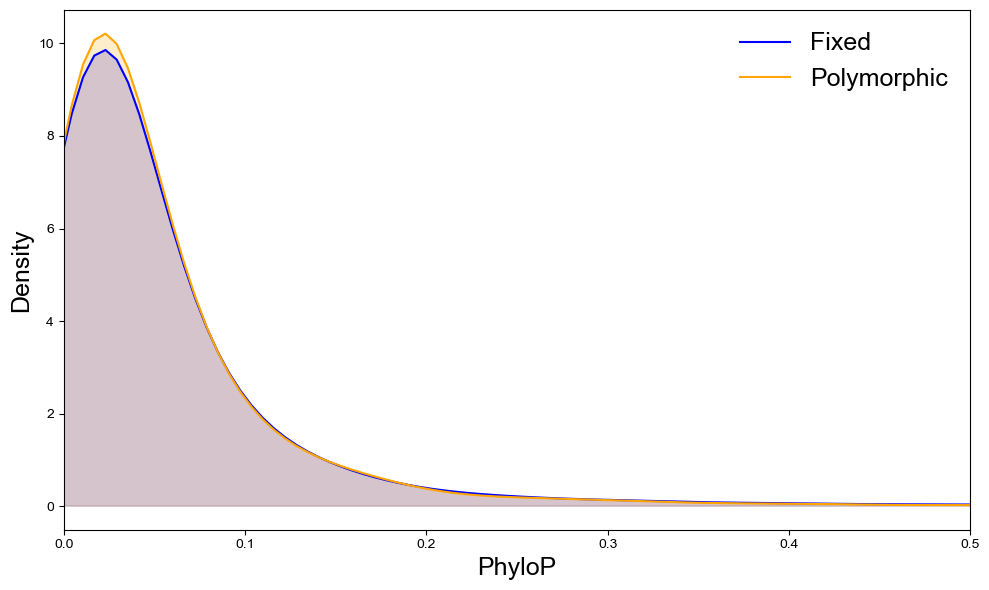

Abs logfc alpha (0.034094589380676554, 0.07210577, [[7031, 27163], [1599, 6398]], [[7031, 27163], [1600, 6397]], <Figure size 1000x600 with 1 Axes>)
Abs logfc p-value 0.26768401432673417


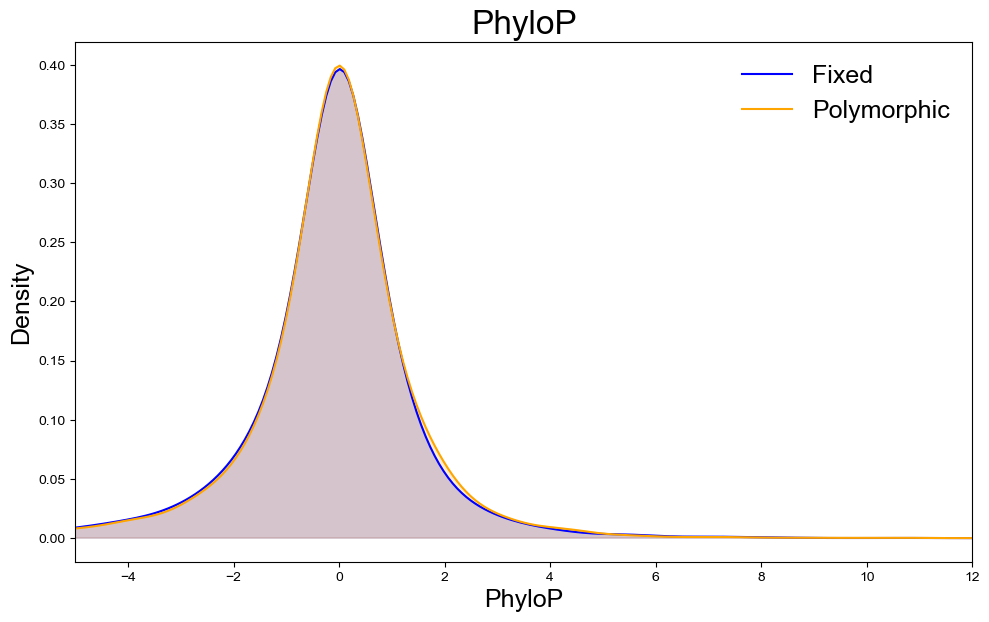

PhyloP alpha (-0.07928555197862774, 0.709, [[5260, 21437], [1288, 4872]], [[5262, 21435], [1292, 4868]], <Figure size 1000x600 with 1 Axes>)
PhyloP p-value 0.02979394362682461


Selection on changes opposing loss of accessibility, with restriction on magnitude


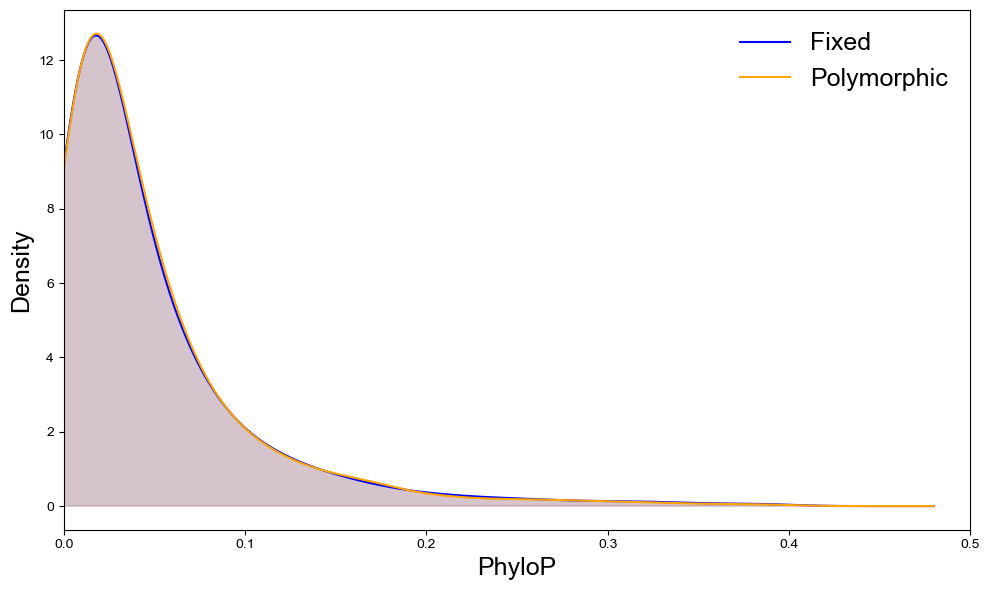

Abs logfc alpha (0.01957051681663785, 0.07039772, [[6871, 26944], [1586, 6346]], [[6871, 26944], [1587, 6345]], <Figure size 1000x600 with 1 Axes>)
Abs logfc p-value 0.5347941205694918


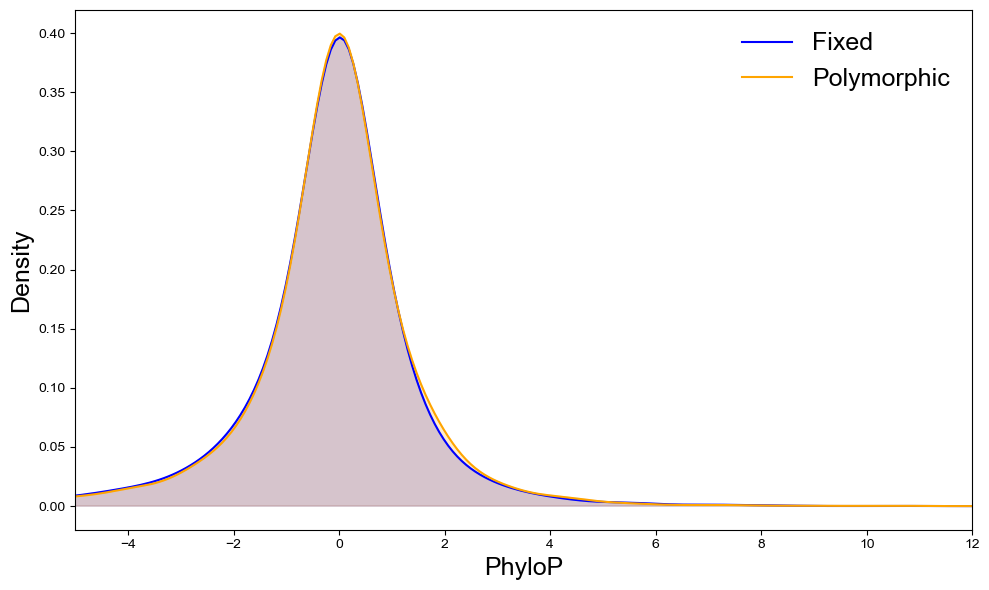

PhyloP alpha (-0.07447052717417635, 0.71, [[5203, 21202], [1276, 4840]], [[5210, 21195], [1278, 4838]], <Figure size 1000x600 with 1 Axes>)
PhyloP p-value 0.04199992794400498


Selection on changes reinforcing loss of accessibility, magnitude is already restricted


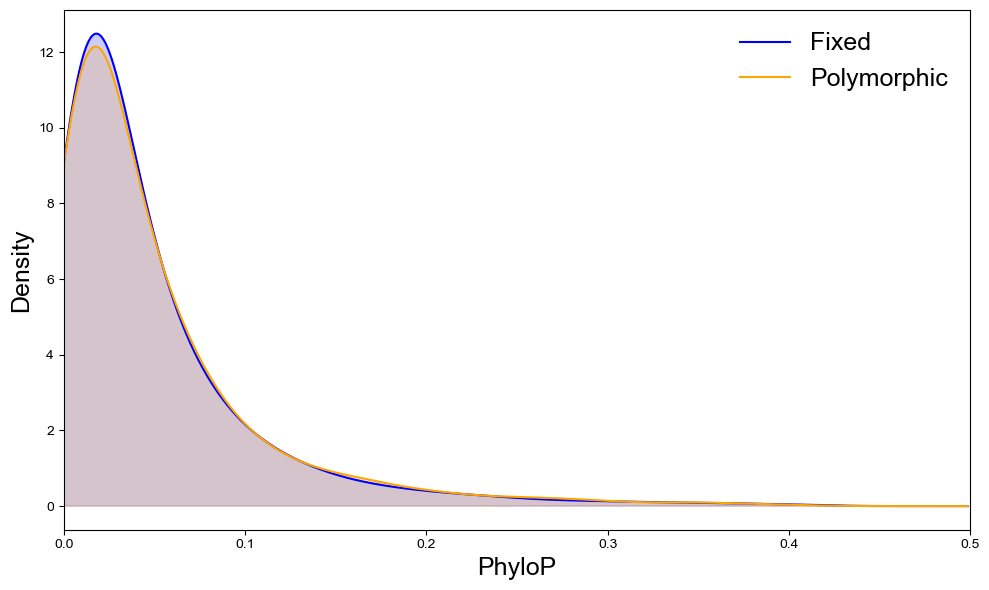

Abs logfc alpha (-0.028125705852527716, 0.07367921, [[6559, 26985], [1519, 6081]], [[6559, 26985], [1520, 6080]], <Figure size 1000x600 with 1 Axes>)
Abs logfc p-value 0.3879289014035837


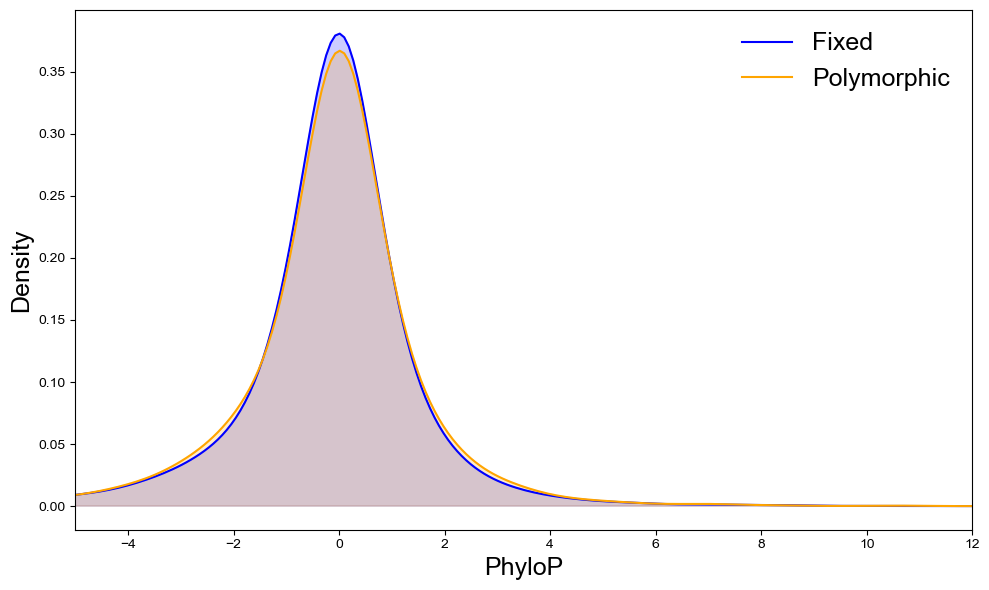

PhyloP alpha (-0.080897580962066, 0.673, [[5287, 20645], [1264, 4570]], [[5293, 20639], [1267, 4567]], <Figure size 1000x600 with 1 Axes>)
PhyloP p-value 0.028353750483185853


Selection on changes opposing gain of accessibility, no restriction on magnitude


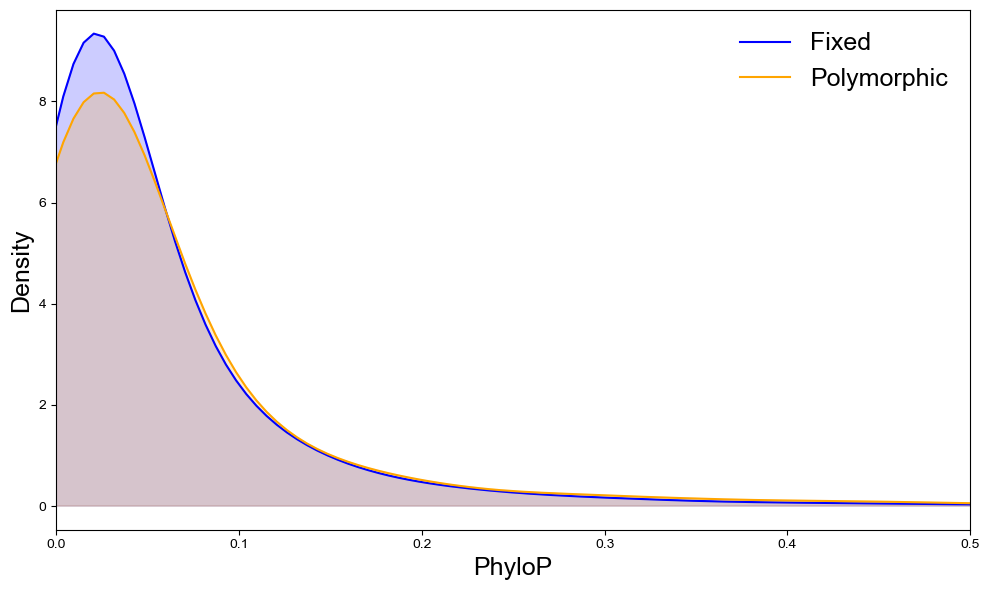

Abs logfc alpha (-0.07006697702482223, 0.0819627, [[6083, 26030], [1421, 5685]], [[6083, 26030], [1422, 5684]], <Figure size 1000x600 with 1 Axes>)
Abs logfc p-value 0.04042513139848773


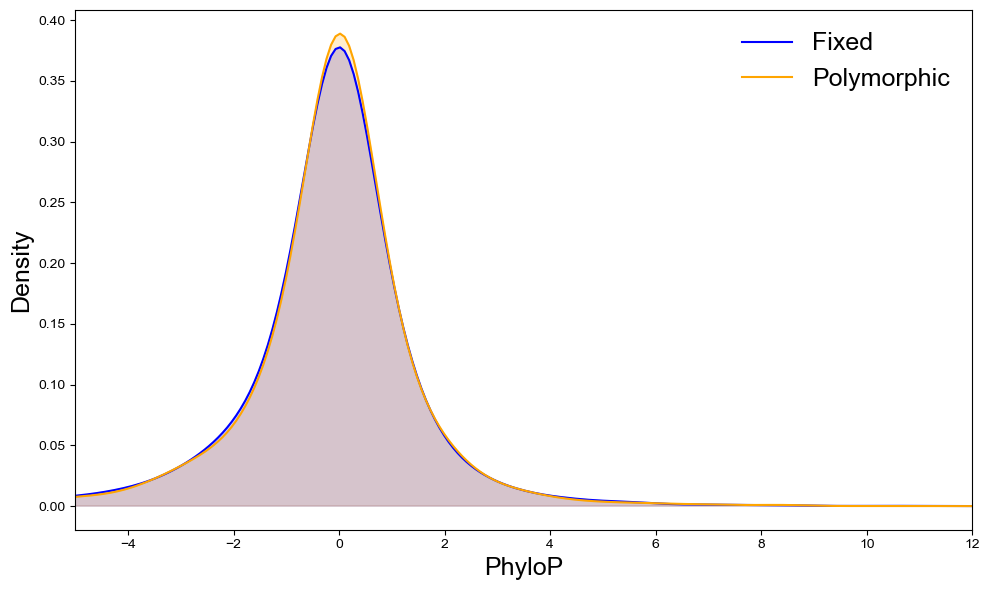

PhyloP alpha (-0.005263527516081279, 0.634, [[5350, 19441], [1168, 4227]], [[5354, 19437], [1171, 4224]], <Figure size 1000x600 with 1 Axes>)
PhyloP p-value 0.8911635905936526


Selection on changes opposing gain of accessibility, with restriction on magnitude


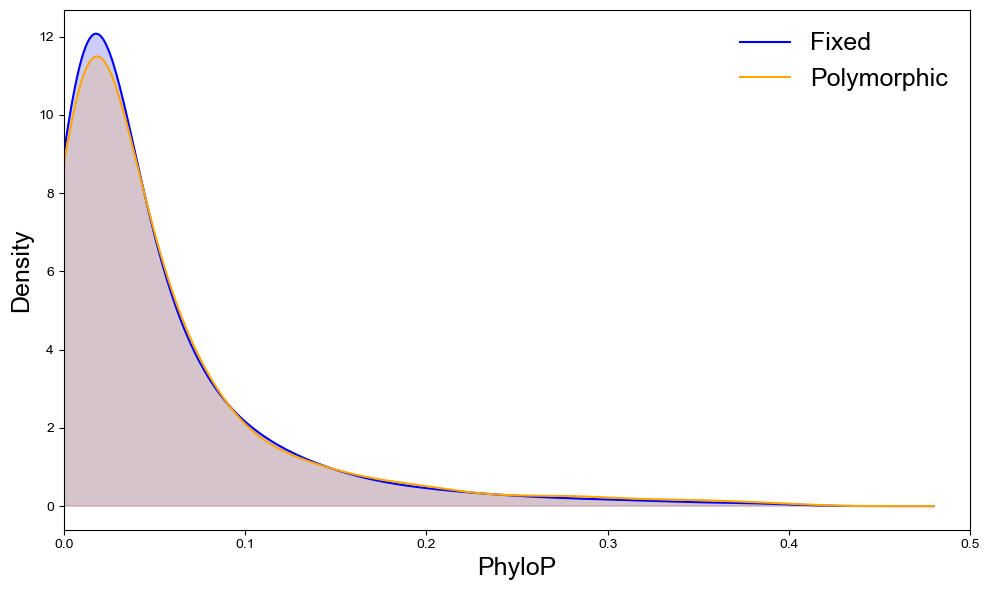

Abs logfc alpha (-0.021309320021816847, 0.07663715, [[6238, 25486], [1390, 5563]], [[6238, 25486], [1391, 5562]], <Figure size 1000x600 with 1 Axes>)
Abs logfc p-value 0.5272677772723146


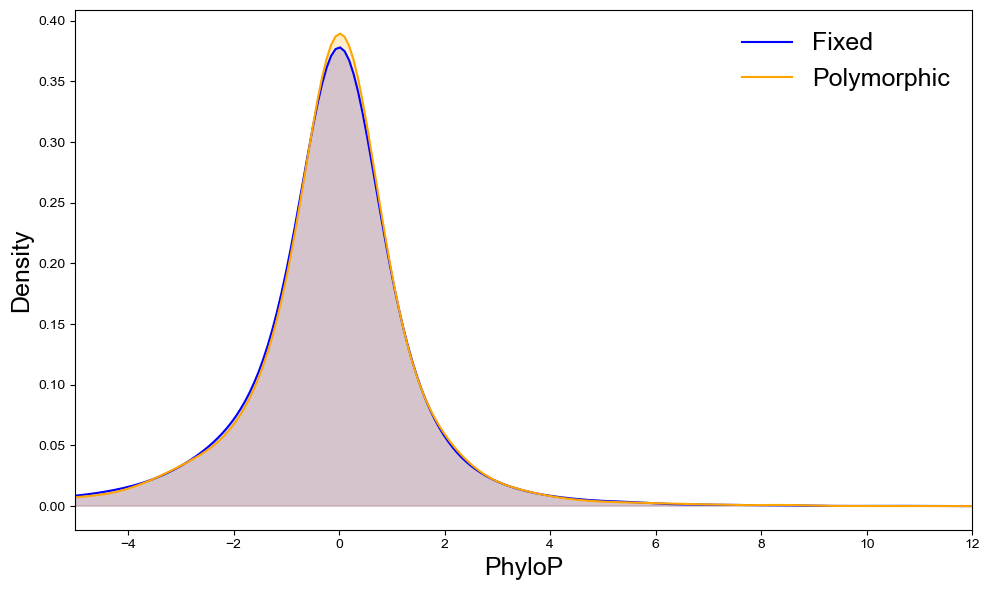

PhyloP alpha (-0.010756799918723137, 0.634, [[5270, 19224], [1143, 4130]], [[5274, 19220], [1146, 4127]], <Figure size 1000x600 with 1 Axes>)
PhyloP p-value 0.774881906709231


Selection on changes reinforcing gain of accessibility, magnitude is already restricted


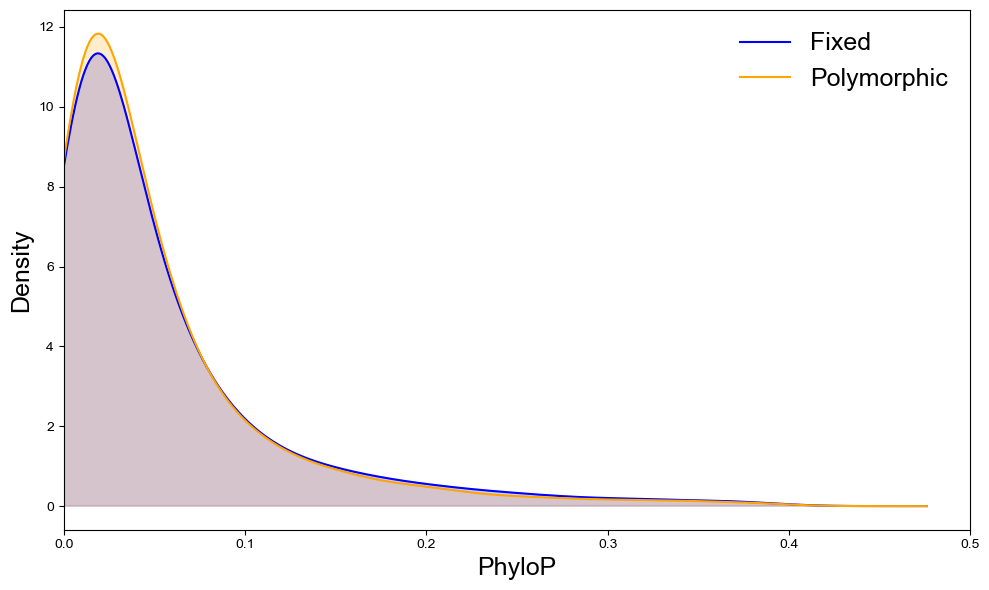

Abs logfc alpha (0.08827501956373407, 0.074693866, [[7239, 26411], [1487, 5953]], [[7239, 26411], [1488, 5952]], <Figure size 1000x600 with 1 Axes>)
Abs logfc p-value 0.0037625049135212255


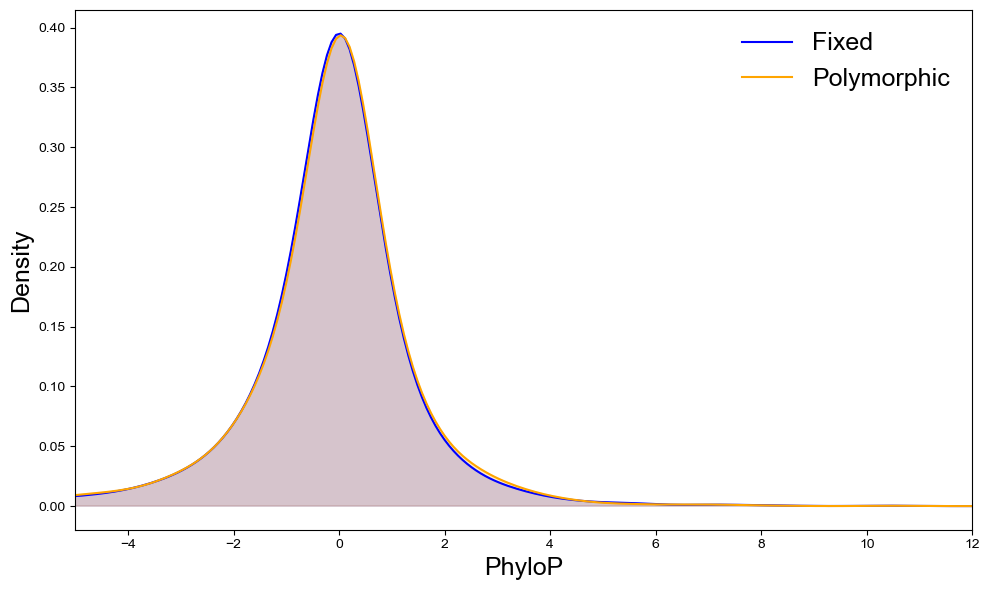

PhyloP alpha (-0.048493439945946126, 0.658, [[5361, 20901], [1211, 4504]], [[5368, 20894], [1213, 4502]], <Figure size 1000x600 with 1 Axes>)
PhyloP p-value 0.18748029469835512


In [113]:
v_bln2, vv_bln2 = remove_repeats(v_bln, vv_bln)
v_bln2, vv_bln2 = remove_pseudos(v_bln2, vv_bln2)

v_bgn2, vv_bgn2 = remove_repeats(v_bgn, vv_bgn)
v_bgn2, vv_bgn2 = remove_pseudos(v_bgn2, vv_bgn2)

run_reinf_oppo(v_bln2, vv_bln2, v_bgn2, vv_bgn2)

In [7]:
v_bln_inc_large = pd.DataFrame()
for key in d_bl.keys():
    v_blc = v_bl[v_bl["Chrom"].isin([key])]
    v_bln_inc_large = pd.concat([v_bln_inc_large, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_bl[key]))]])

vv_bln_inc_large = pd.DataFrame()
for key in d_bl.keys():
    vv_blc = vv_bl[vv_bl["Chrom"].isin([key])]
    vv_bln_inc_large = pd.concat([vv_bln_inc_large, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_bl[key]))]])

v_bgn_inc_large = pd.DataFrame()
for key in d_bg.keys():
    v_bgc = v_bg[v_bg["Chrom"].isin([key])]
    v_bgn_inc_large = pd.concat([v_bgn_inc_large, v[(v["Chrom"].isin([key])) & (v["Pos"].isin(d_bg[key]))]])

vv_bgn_inc_large = pd.DataFrame()
for key in d_bg.keys():
    vv_bgc = vv_bg[vv_bg["Chrom"].isin([key])]
    vv_bgn_inc_large = pd.concat([vv_bgn_inc_large, vv[(vv["Chrom"].isin([key])) & (vv["Pos"].isin(d_bg[key]))]])


In [19]:
df = pd.DataFrame(out)

df = df[(df[2] >= 2) & (df[3] == 0)]
df.sort_values(2).to_csv("LSN_Reinf.txt", sep = "\t")

In [13]:
vbgk = v_bgn_inc_large[v_bgn_inc_large["abs logfc"] > 0.2]

out = []
new = pd.DataFrame()
for index, row in v_bg.iterrows():
    vbgk_e = vbgk[(vbgk["Chrom"].isin([row["Chrom"]])) & (vbgk["Pos"].isin(list(range(row["Pos"]-500, row["Pos"]+500))))]
    if vbgk_e.shape[0] > 1:
        down = vbgk_e[vbgk_e["logfc"] > 0].shape[0]
        up = vbgk_e[vbgk_e["logfc"] < 0].shape[0]
        out.append([row["Position"], row["NearestGene"], up, down, up/(up + down)])
        if up >= 3:
            new = pd.concat([new, vbgk_e])
df = pd.DataFrame(out)

In [158]:
vblk = v_bln_inc_large[v_bln_inc_large["abs logfc"] > 0.2]

out2 = []
new2 = pd.DataFrame()
for index, row in v_bl.iterrows():
    vblk_e = vblk[(vblk["Chrom"].isin([row["Chrom"]])) & (vblk["Pos"].isin(list(range(row["Pos"]-500, row["Pos"]+500))))]
    if vblk_e.shape[0] > 1:
        down = vblk_e[vblk_e["logfc"] > 0].shape[0]
        up = vblk_e[vblk_e["logfc"] < 0].shape[0]
        out2.append([row["Position"], row["NearestGene"], up, down, up/(up + down)])
        if up >= 3:
            new2 = pd.concat([new2, vblk_e])
df2 = pd.DataFrame(out2)

In [136]:
x = pd.read_csv("Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_CS_D100_chpr.txt", sep = "\t")
x = x.dropna()
x = x[x["padj"] < 0.05]
xd = x[x["log2FoldChange"] < 0]
xu = x[x["log2FoldChange"] > 0]

In [159]:
df = pd.DataFrame(out)

df = df[(df[2] >= 3) & (df[3] == 0)]
down = len(np.intersect1d(xd["Gene"], df[1]))
up = len(np.intersect1d(xu["Gene"], df[1]))
print(binomtest(down, up + down))

BinomTestResult(k=40, n=88, alternative='two-sided', statistic=0.45454545454545453, pvalue=0.45574127943791326)


In [162]:
out2

[['chr1:1775538', 'NADK', 0, 2, 0.0],
 ['chr1:1821272', 'NADK', 0, 2, 0.0],
 ['chr1:2117535', 'PRKCZ', 1, 1, 0.5],
 ['chr1:4147648', 'C1orf174', 1, 1, 0.5],
 ['chr1:5151395', 'AJAP1', 0, 3, 0.0],
 ['chr1:5161297', 'AJAP1', 1, 1, 0.5],
 ['chr1:5240041', 'AJAP1', 2, 1, 0.6666666666666666],
 ['chr1:5318319', 'AJAP1', 1, 1, 0.5],
 ['chr1:5318876', 'AJAP1', 1, 1, 0.5],
 ['chr1:5451893', 'NPHP4', 0, 2, 0.0],
 ['chr1:6267920', 'GPR153', 1, 1, 0.5],
 ['chr1:6331687', 'ACOT7', 0, 2, 0.0],
 ['chr1:6423014', 'HES2', 1, 2, 0.3333333333333333],
 ['chr1:7018683', 'CAMTA1', 0, 3, 0.0],
 ['chr1:7281955', 'VAMP3', 1, 1, 0.5],
 ['chr1:7869939', 'UTS2', 0, 2, 0.0],
 ['chr1:7869979', 'UTS2', 0, 2, 0.0],
 ['chr1:9422444', 'SLC25A33', 0, 2, 0.0],
 ['chr1:10751611', 'CASZ1', 0, 2, 0.0],
 ['chr1:10751891', 'CASZ1', 0, 2, 0.0],
 ['chr1:10838635', 'CASZ1', 0, 2, 0.0],
 ['chr1:11053541', 'MASP2', 0, 2, 0.0],
 ['chr1:11546748', 'PTCHD2', 1, 1, 0.5],
 ['chr1:11605324', 'FBXO2', 1, 2, 0.3333333333333333],
 ['chr1:1

In [163]:
df2 = pd.DataFrame(out2)

df2 = df2[(df2[3] >= 3) & (df2[2] == 0)]
down = len(np.intersect1d(xd["Gene"], df2[1]))
up = len(np.intersect1d(xu["Gene"], df2[1]))
print(binomtest(down, up + down))

BinomTestResult(k=15, n=27, alternative='two-sided', statistic=0.5555555555555556, pvalue=0.7011080384254456)


In [165]:
df[df[1].isin(["CSMD1"])]

0      1  2  3    4
7630  chr8:4287235  CSMD1  3  0  1.0
7631  chr8:4314919  CSMD1  3  0  1.0
7640  chr8:4683624  CSMD1  4  0  1.0
7642  chr8:4812138  CSMD1  3  0  1.0
7643  chr8:4812173  CSMD1  3  0  1.0
7650  chr8:5227761  CSMD1  3  0  1.0
7651  chr8:5249445  CSMD1  3  0  1.0

In [220]:
df[df[1].isin(np.intersect1d(xu["Gene"], df[1]))].sort_values(2).head(50)

0         1  2  3    4
1        chr1:3334130  ARHGEF16  3  0  1.0
5569    chr4:52483491     USP46  3  0  1.0
5248   chr3:162647822     OTOL1  3  0  1.0
5064   chr3:102269877     ZPLD1  3  0  1.0
4913    chr3:58914393   C3orf67  3  0  1.0
4645   chr22:36235081     APOL2  3  0  1.0
4644   chr22:36235077     APOL2  3  0  1.0
5778   chr4:124949316   ANKRD50  3  0  1.0
4611   chr22:25400842     LRP5L  3  0  1.0
4519   chr21:28177244    N6AMT1  3  0  1.0
4496   chr21:21924961     NCAM2  3  0  1.0
4495   chr21:21693861     NCAM2  3  0  1.0
4493   chr21:21267012     NCAM2  3  0  1.0
4492   chr21:21266994     NCAM2  3  0  1.0
8778   chrX:150057388  CXorf40B  3  0  1.0
4520   chr21:28177254    N6AMT1  3  0  1.0
6104    chr5:14957624      ANKH  3  0  1.0
6105    chr5:14957626      ANKH  3  0  1.0
6749    chr6:53350150    ELOVL5  3  0  1.0
8477   chr9:120538550  CDK5RAP2  3  0  1.0
8476   chr9:120538539  CDK5RAP2  3  0  1.0
8401    chr9:95107916     FANCC  3  0  1.0
7963    chr8:81729150    ZFAND1  3  0  1.0
7932    chr8:71970402     TRPA1  3  0  1.0
7651     chr8:5249445     CSMD1  3  0  1.0
7650     chr8:5227761     CSMD1  3  0  1.0
7643     chr8:4812173     CSMD1  3  0  1.0
7642     chr8:4812138     CSMD1  3  0  1.0
7631     chr8:4314919     CSMD1  3  0  1.0
7630     chr8:4287235     CSMD1  3  0  1.0
7497   chr7:125048505      POT1  3  0  1.0
7233    chr7:27803557   TAX1BP1  3  0  1.0
7228    chr7:25022753    OSBPL3  3  0  1.0
7109   chr6:161547644    AGPAT4  3  0  1.0
3934   chr2:129894568     RAB6C  3  0  1.0
3933   chr2:129894489     RAB6C  3  0  1.0
4193   chr2:215297951      ATIC  3  0  1.0
1569   chr12:24771206     BCAT1  3  0  1.0
992   chr10:108249515    SORCS1  3  0  1.0
991   chr10:108249485    SORCS1  3  0  1.0
990   chr10:108249440    SORCS1  3  0  1.0
986   chr10:107950772    SORCS1  3  0  1.0
963   chr10:101091688   KAZALD1  3  0  1.0
962   chr10:101091635   KAZALD1  3  0  1.0
1570   chr12:24771207     BCAT1  3  0  1.0
832    chr10:52207002      DKK1  3  0  1.0
732    chr10:18600166     NSUN6  3  0  1.0
250     chr1:97633439      DPYD  3  0  1.0
249     chr1:97633419      DPYD  3  0  1.0
239     chr1:95394255     RWDD3  3  0  1.0

In [222]:
new[new["NearestGene"].isin(["CSMD1"])].drop_duplicates("Position")

Position    Position.1 NearestGene  NearestDist  PhyloP447  \
8965260  chr8:3910071  chr8:3910071       CSMD1      1084848     -0.292   
8965261  chr8:3910072  chr8:3910072       CSMD1      1084846     -2.185   
8965262  chr8:3910109  chr8:3910109       CSMD1      1084810     -0.962   
8965264  chr8:3910153  chr8:3910153       CSMD1      1084766      0.927   
8965265  chr8:3910229  chr8:3910229       CSMD1      1084690     -0.266   
8967585  chr8:4209262  chr8:4209262       CSMD1       785656     -3.023   
8967586  chr8:4209267  chr8:4209267       CSMD1       785652     -1.209   
8967588  chr8:4209285  chr8:4209285       CSMD1       785634     -4.899   
8967596  chr8:4209562  chr8:4209562       CSMD1       785356     -0.614   
8967600  chr8:4209732  chr8:4209732       CSMD1       785186     -0.575   
8968361  chr8:4286775  chr8:4286775       CSMD1       708144      0.589   
8968363  chr8:4287235  chr8:4287235       CSMD1       707684      1.255   
8968364  chr8:4287321  chr8:4287321       CSMD1       707598     -0.414   
8968726  chr8:4314903  chr8:4314903       CSMD1       680016     -0.153   
8968727  chr8:4314919  chr8:4314919       CSMD1       680000     -0.023   
8968728  chr8:4314935  chr8:4314935       CSMD1       679984      0.907   
8969992  chr8:4418983  chr8:4418983       CSMD1       575936     -0.886   
8969993  chr8:4418994  chr8:4418994       CSMD1       575924     -0.877   
8969994  chr8:4419013  chr8:4419013       CSMD1       575906     -0.350   
8969996  chr8:4419087  chr8:4419087       CSMD1       575832     -1.107   
8969997  chr8:4419170  chr8:4419170       CSMD1       575748     -0.865   
8972738  chr8:4683585  chr8:4683585       CSMD1       311334     -1.066   
8972739  chr8:4683624  chr8:4683624       CSMD1       311294      0.154   
8972740  chr8:4683643  chr8:4683643       CSMD1       311276     -7.108   
8972741  chr8:4683644  chr8:4683644       CSMD1       311274     -3.904   
8974051  chr8:4812066  chr8:4812066       CSMD1       182852     -1.583   
8974052  chr8:4812138  chr8:4812138       CSMD1       182780     -0.102   
8974053  chr8:4812173  chr8:4812173       CSMD1       182746     -0.787   
8977382  chr8:5227612  chr8:5227612       CSMD1       232694     -0.487   
8977386  chr8:5227689  chr8:5227689       CSMD1       232770      0.227   
8977387  chr8:5227761  chr8:5227761       CSMD1       232842     -4.342   
8977578  chr8:5249310  chr8:5249310       CSMD1       254392      0.001   
8977580  chr8:5249445  chr8:5249445       CSMD1       254526      0.443   
8977582  chr8:5249484  chr8:5249484       CSMD1       254566      0.848   
8980417  chr8:5564651  chr8:5564651       CSMD1       569732     -3.521   
8980418  chr8:5564689  chr8:5564689       CSMD1       569770     -0.276   
8980419  chr8:5564691  chr8:5564691       CSMD1       569772     -1.739   
8980420  chr8:5564715  chr8:5564715       CSMD1       569796     -0.577   

         PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
8965260           0.0         277 -0.611469           1682.60560   
8965261           0.0         277 -0.675406           1685.15060   
8965262           0.0         313 -0.243263           1711.65260   
8965264           0.0         330  0.228104           1706.52800   
8965265           0.0         324 -0.503853           1716.01030   
8967585           0.0         294 -0.283301           1016.95090   
8967586           0.0         280 -0.264769           1028.79820   
8967588           0.0         287 -0.215328           1053.56040   
8967596           0.0         240  0.203907           1484.90540   
8967600           0.0         179 -0.495830           1693.60380   
8968361           0.0         381 -0.242065            888.10500   
8968363           0.0         380 -0.823433            937.09400   
8968364           0.0         377 -0.342867            870.06750   
8968726           0.0         332 -0.233692            470.97852   
8968727           0.0         342 -0.437323            466.17377   

In [215]:
new.sort_values("PhyloP447").drop_duplicates("Position").tail(50)

Position       Position.1 NearestGene  NearestDist  \
6579699     chr4:58138932    chr4:58138932      IGFBP7      1028533   
9059132     chr8:20467585    chr8:20467585       LZTS1       163633   
453480     chr1:157876829   chr1:157876829        CD5L        35034   
8485206     chr7:22008419    chr7:22008419      CDCA7L        62519   
9059131     chr8:20467579    chr8:20467579       LZTS1       163627   
7132786      chr5:9480588     chr5:9480588      SEMA5A        65488   
9544376      chr9:3957636     chr9:3957636       GLIS3       342420   
9174675     chr8:53069288    chr8:53069288      NPBWR1       129223   
4416338     chr2:50741059    chr2:50741059       NRXN1       291057   
3870772    chr18:39562851   chr18:39562851       CELF4      1997041   
4416337     chr2:50741040    chr2:50741040       NRXN1       291076   
8145124    chr6:105594099   chr6:105594099        PREP       191034   
6171641    chr3:150115315   chr3:150115315        PFN2       144290   
1137525   chr10:101091669  chr10:101091669     KAZALD1        30057   
3256220    chr16:12897894   chr16:12897894      SHISA9         3719   
5030389    chr2:221035078   chr2:221035078       EPHA4       537234   
8145125    chr6:105594119   chr6:105594119        PREP       191054   
752894     chr1:240316961   chr1:240316961        FMN2       225054   
462032     chr1:160129340   chr1:160129340      ATP1A2            0   
1707329   chr11:124481850  chr11:124481850       OR8B8        40692   
4990354    chr2:210841744   chr2:210841744        CPS1       285144   
1137524   chr10:101091635  chr10:101091635     KAZALD1        30023   
8434017     chr7:10836004    chr7:10836004      NDUFA4       104118   
4869723    chr2:176763450   chr2:176763450     HNRNPA3       449292   
6580909     chr4:58368444    chr4:58368444      IGFBP7      1258045   
9285448     chr8:81729131    chr8:81729131      ZFAND1         3242   
6579700     chr4:58139003    chr4:58139003      IGFBP7      1028604   
10224772   chrX:115311769   chrX:115311769       LUZP4        22064   
8528187     chr7:33411189    chr7:33411189        BBS9       281749   
6579698     chr4:58138930    chr4:58138930      IGFBP7      1028531   
8646321     chr7:72025932    chr7:72025932       CALN1       311455   
1062694    chr10:78663936   chr10:78663936       ZMIZ1       405022   
1957172    chr12:60998548   chr12:60998548     FAM19A2      1194236   
1062697    chr10:78663965   chr10:78663965       ZMIZ1       404993   
8434018     chr7:10836055    chr7:10836055      NDUFA4       104067   
6530812     chr4:42491972    chr4:42491972      SHISA3        94462   
1745545   chr11:133064329  chr11:133064329       OPCML       120678   
8528185     chr7:33411115    chr7:33411115        BBS9       281675   
5536368    chr22:33969240   chr22:33969240       LARGE        46554   
8528186     chr7:33411174    chr7:33411174        BBS9       281734   
2522331    chr13:95063619   chr13:95063619       ABCC4       237829   
6580908     chr4:58368419    chr4:58368419      IGFBP7      1258020   
9611744     chr9:20921334    chr9:20921334     PTPLAD2       110210   
9285449     chr8:81729150    chr8:81729150      ZFAND1         3223   
4869721    chr2:176763335   chr2:176763335     HNRNPA3       449408   
2365432    chr13:55999902   chr13:55999902      PCDH17      1631880   
1957175    chr12:60998604   chr12:60998604     FAM19A2      1194180   
1062695    chr10:78663952   chr10:78663952       ZMIZ1       405006   
10224773   chrX:115311780   chrX:115311780       LUZP4        22075   
10224771   chrX:115311740   chrX:115311740       LUZP4        22035   

          PhyloP447  PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
6579699       3.002         1.000         438 -0.577686            692.65250   
9059132       3.092         1.000         442 -0.461485           1721.95230   
453480        3.097         0.005         325 -0.417205            923.38690   
8485206       3.131         0.054         416 -0.770086           5356.4272

In [128]:
df = pd.DataFrame(out)
df.sort_values(2)

0       1  2  3         4
0        chr1:2117522   PRKCZ  1  1  0.500000
1258   chr11:59271551   MPEG1  1  1  0.500000
1252   chr11:57133746  LRRC55  1  1  0.500000
1247   chr11:56454582   OR5M9  1  1  0.500000
1245   chr11:55494077  OR4C15  1  1  0.500000
...               ...     ... .. ..       ...
957   chr10:100327339  PKD2L1  4  0  1.000000
1658   chr12:65069668    WIF1  4  0  1.000000
1827  chr12:118779208   SRRM4  5  1  0.833333
1993   chr13:43546388   ENOX1  5  0  1.000000
1992   chr13:43546300   ENOX1  5  0  1.000000

[2405 rows x 5 columns]

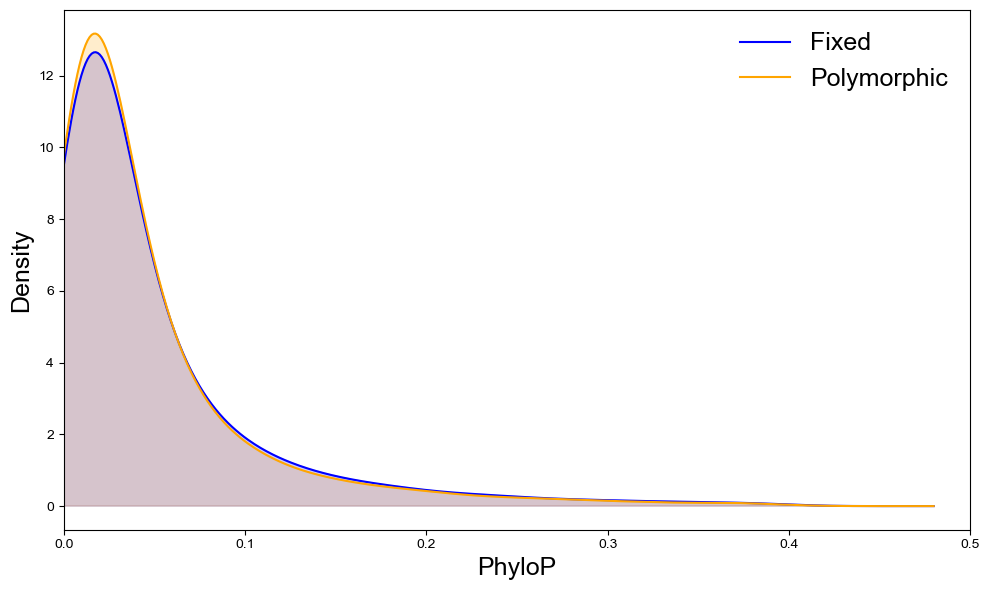

(0.0803137018302098, 0.06603415, [[15472, 56915], [2795, 11182]], [[15472, 56915], [2796, 11181]], <Figure size 1000x600 with 1 Axes>)
0.00026401435760813334


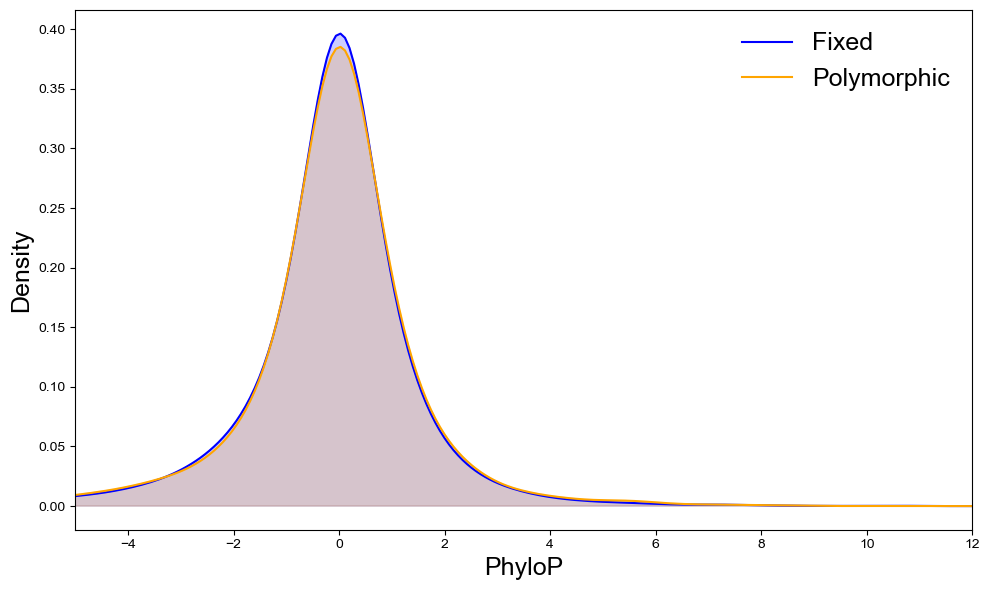

(-0.03762813604188442, 0.146, [[16825, 25868], [3280, 4861]], [[16847, 25846], [3285, 4856]], <Figure size 1000x600 with 1 Axes>)
0.13622466380099923


In [85]:
#Selection on changes opposing loss of accessibility, with restriction on magnitude

v_bln["fixed logfc"] = v_bln["logfc"]
vx = v_bln[(v_bln["fixed logfc"] < 0) & (v_bln["abs logfc"] < 0.4)].copy()
vvx = vv_bln[(vv_bln["fixed logfc"] < 0) & (vv_bln["abs logfc"] < 0.4)].copy()

vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

cuttt = 0.6

z = list(vvx["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
plt.show()
print(alpha)
print((fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

cuttt = 0.6

z = list(vvx["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
plt.show()
print(alpha)
print((fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)



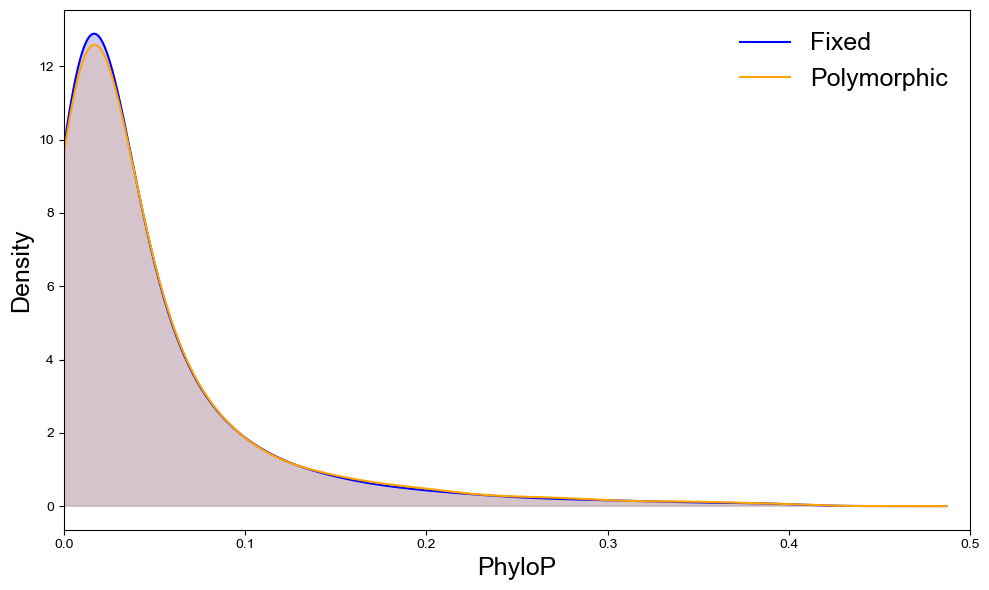

(-0.024921840107190674, 0.0246537805, [[33585, 34422], [6616, 6616]], [[33585, 34422], [6616, 6616]], <Figure size 1000x600 with 1 Axes>)
0.19626987951164032


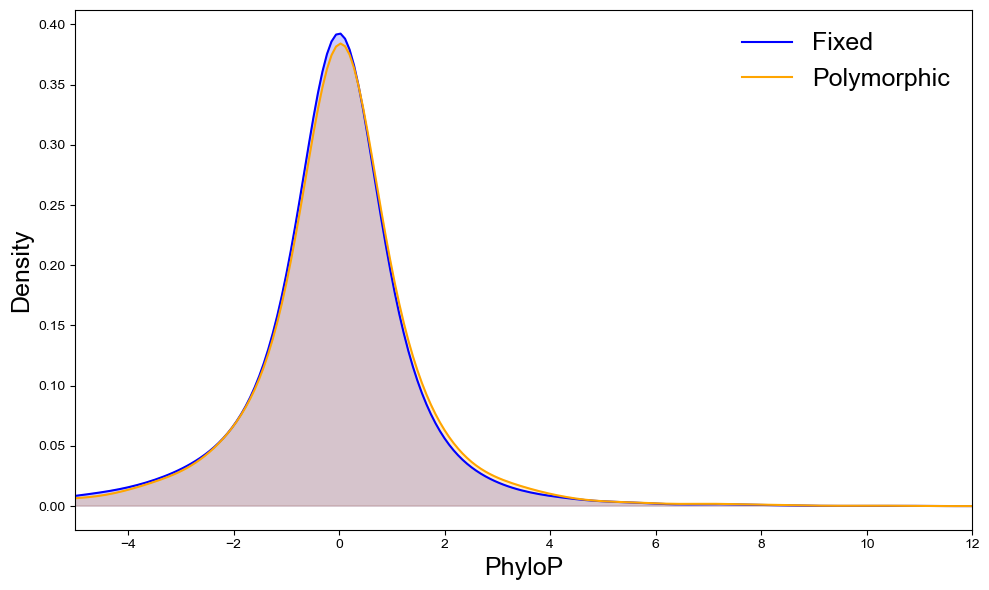

(-0.10816466642040301, 0.003, [[19383, 21481], [3951, 3952]], [[19405, 21459], [3956, 3947]], <Figure size 1000x600 with 1 Axes>)
2.9681907788132577e-05


In [76]:
#Selection on changes reinforcing loss of accessibility, magnitude is already restricted

v_bln["fixed logfc"] = v_bln["logfc"]
vx = v_bln[v_bln["fixed logfc"] > 0].copy()
vvx = vv_bln[vv_bln["fixed logfc"] > 0].copy()

vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

cuttt = 0.6

z = list(vvx["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
plt.show()
print(alpha)
print((fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

cuttt = 0.6

z = list(vvx["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
plt.show()
print(alpha)
print((fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

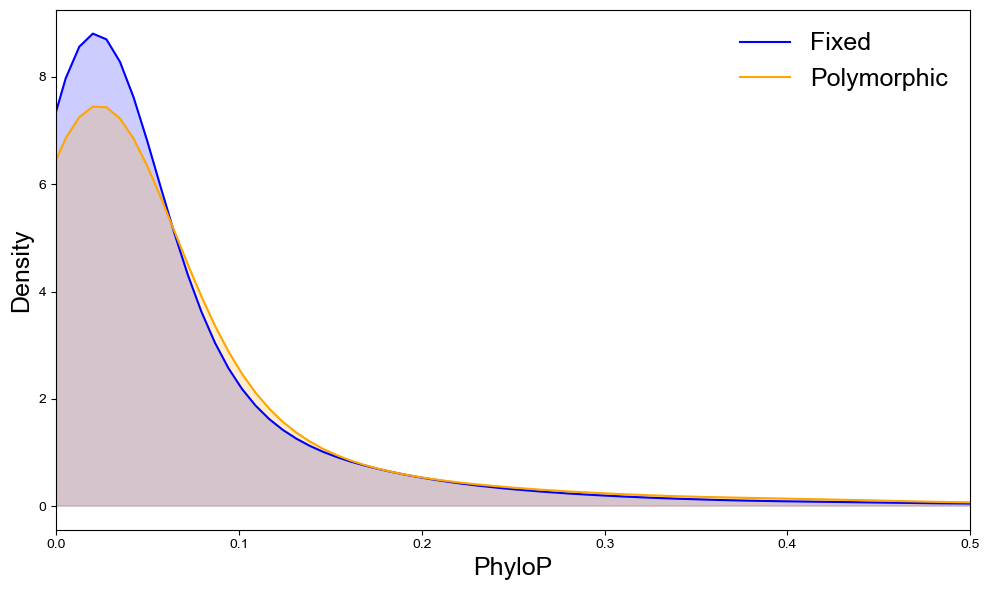

(-0.04068651274199486, 0.036871612, [[25771, 40228], [5166, 7750]], [[25771, 40228], [5167, 7749]], <Figure size 1000x600 with 1 Axes>)
0.04287065931246047


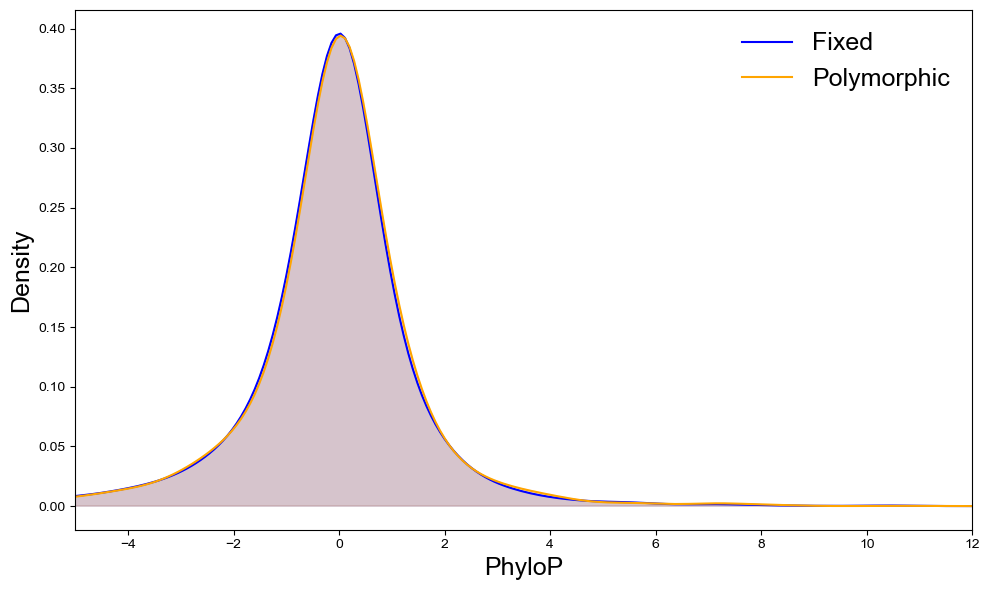

(-0.07906493846439122, 0.151, [[14890, 23419], [2989, 4358]], [[14910, 23399], [2994, 4353]], <Figure size 1000x600 with 1 Axes>)
0.0034782649909032666


In [86]:
#Selection on changes opposing gain of accessibility, no restriction on magnitude

v_bgn["fixed logfc"] = v_bgn["logfc"]
vx = v_bgn[v_bgn["fixed logfc"] > 0].copy()
vvx = vv_bgn[vv_bgn["fixed logfc"] > 0].copy()

vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

cuttt = 0.6

z = list(vvx["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
plt.show()
print(alpha)
print((fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

cuttt = 0.6

z = list(vvx["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
plt.show()
print(alpha)
print((fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

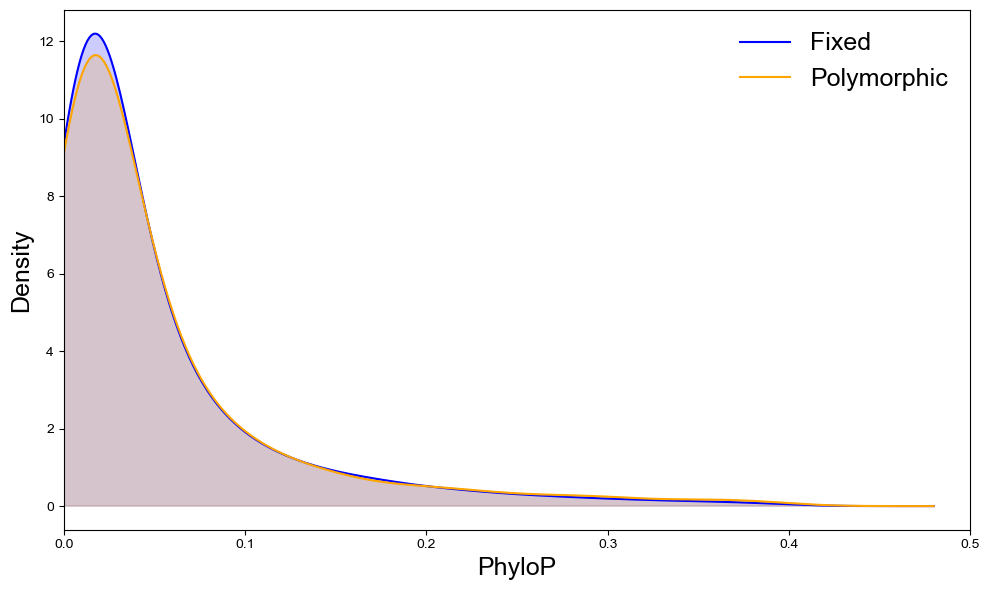

(-0.01850208089016625, 0.035031777, [[25655, 39201], [5029, 7546]], [[25655, 39201], [5030, 7545]], <Figure size 1000x600 with 1 Axes>)
0.35950523690041347


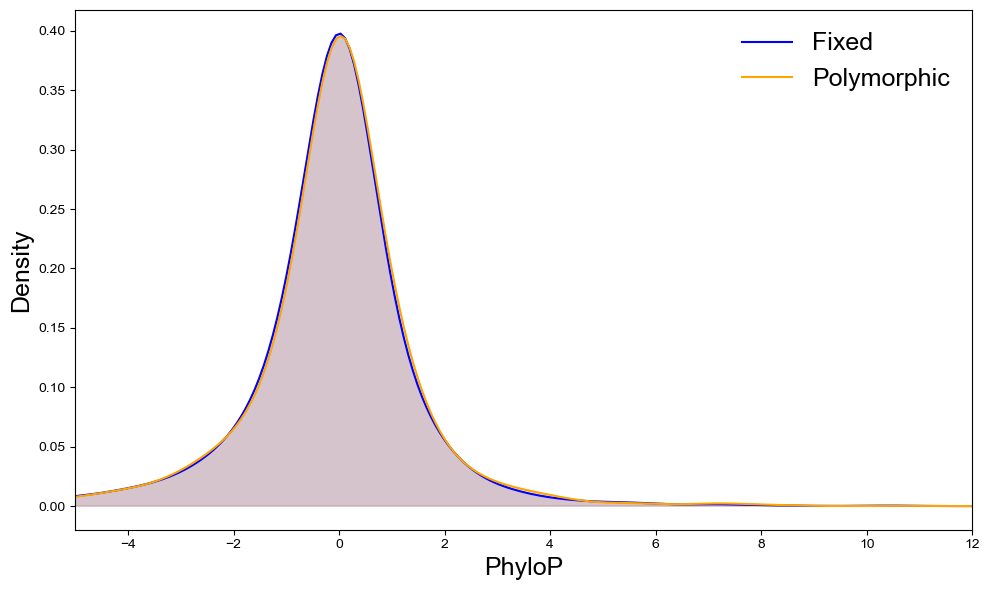

(-0.07993762230119772, 0.147, [[14632, 22989], [2911, 4235]], [[14653, 22968], [2915, 4231]], <Figure size 1000x600 with 1 Axes>)
0.003493923866260693


In [87]:
#Selection on changes opposing gain of accessibility, restricted magnitude

v_bgn["fixed logfc"] = v_bgn["logfc"]
vx = v_bgn[(v_bgn["fixed logfc"] > 0) & (v_bgn["abs logfc"] < 0.4)].copy()
vvx = vv_bgn[(vv_bgn["fixed logfc"] > 0) & (vv_bgn["abs logfc"] < 0.4)].copy()

vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

cuttt = 0.6

z = list(vvx["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
plt.show()
print(alpha)
print((fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

cuttt = 0.6

z = list(vvx["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
plt.show()
print(alpha)
print((fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)



In [92]:
ttest_ind(vx.sort_values("logfc")["abs logfc"], vvx.sort_values("logfc")["abs logfc"])

TtestResult(statistic=7.842529413264276, pvalue=4.467195956456613e-15, df=83999.0)

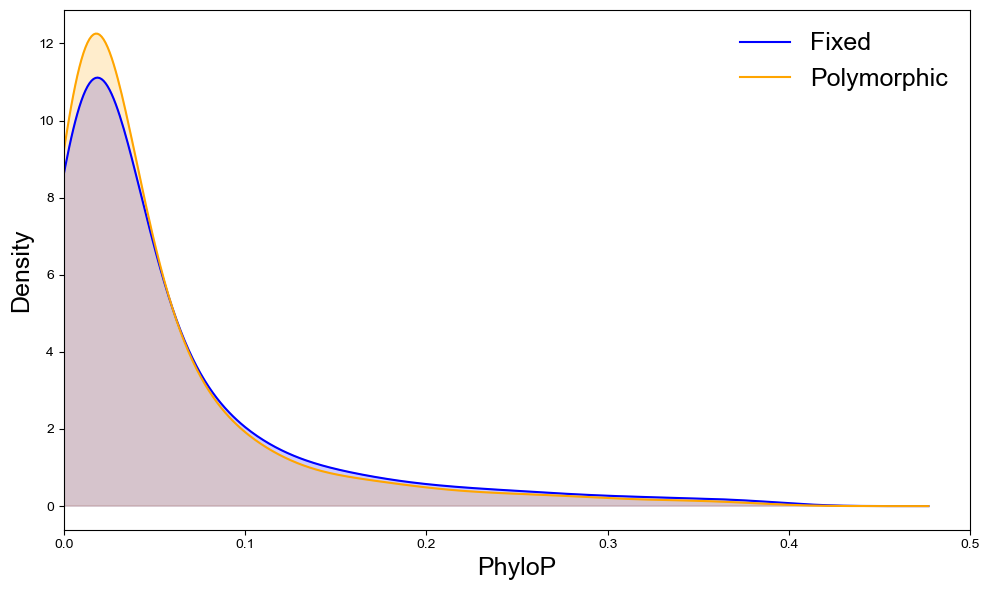

(0.0784135682239222, 0.034740794, [[29635, 40963], [5361, 8042]], [[29635, 40963], [5362, 8041]], <Figure size 1000x600 with 1 Axes>)
2.1145460566340947e-05


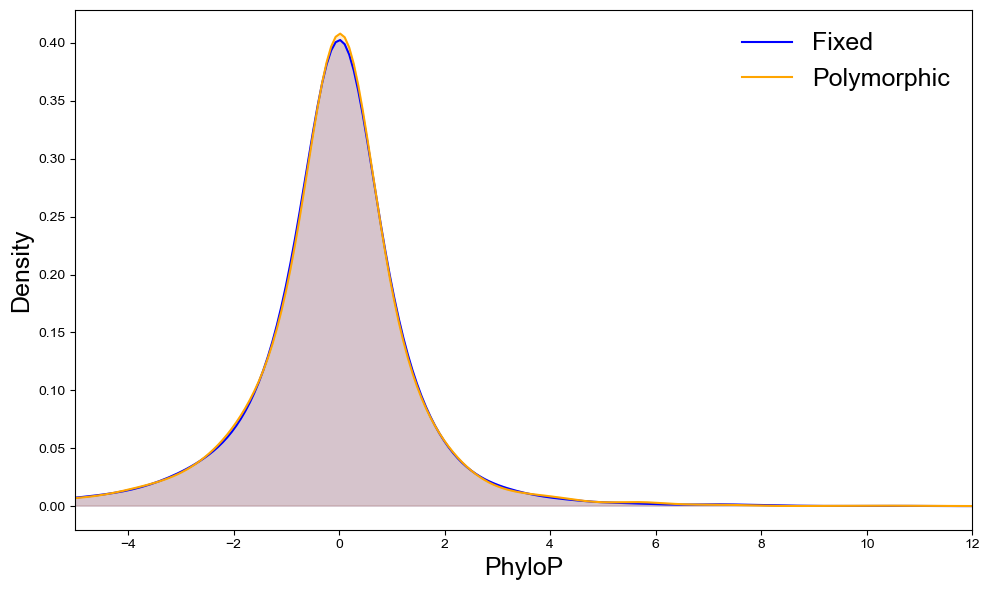

(-0.004424859758466959, 0.147, [[15638, 24501], [2868, 4472]], [[15667, 24472], [2872, 4468]], <Figure size 1000x600 with 1 Axes>)
0.8656844413315388


In [88]:
#Selection on changes reinforcing gain of accessibility, magnitude is already restricted

v_bgn["fixed logfc"] = v_bgn["logfc"]
vx = v_bgn[v_bgn["fixed logfc"] < 0].copy()
vvx = vv_bgn[vv_bgn["fixed logfc"] < 0].copy()

vvv = prepare_alpha(vx, vvx, stat = "abs logfc")

cuttt = 0.6

z = list(vvx["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 0.5], cutoff = cutoff)
plt.show()
print(alpha)
print((fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

vvv = prepare_alpha(vx[vx["SpecSup447"] > 250].copy(), vvx[vvx["SpecSup447"] > 250].copy(), stat = "PhyloP447")

cuttt = 0.6

z = list(vvx["PhyloP447"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)
plt.show()
print(alpha)
print((fisher_exact(alpha[-2])[1] + fisher_exact(alpha[-3])[1])/2)

In [3]:
x = pd.read_csv("ASE_SNPs.FILTER.SPLIT_SPECIES.bed", sep = "\t", header = None)
x["Position"] = x[0] + ":" + x[2].astype(str)
x = x[[3, "Position"]]
x.columns = ["Mut", "Position"]
x = x.set_index("Position")



In [4]:
v.index = v["Position"]
v = v.join(x)
v_ws = v[v["Mut"].isin(["C|A", "G|A", "C|T", "G|T"])]
v_sw = v[v["Mut"].isin(["A|C", "A|G", "T|C", "T|G"])]
v_ww_ss = v[~v["Position"].isin(list(v_ws["Position"]) + list(v_sw["Position"]))]

In [5]:
haqer_fixed = pd.read_csv("hCONDELs_HAQERs_HARs/HumChp_NC_Final_Rmdup_CREs_NoHLA_HAQERs.bed", sep = "\t", header = None)
haqer_fixed.index = haqer_fixed[0] + ":" + haqer_fixed[2].astype(str)
haqer_fixed = haqer_fixed[[6]]
v2 = v.set_index("Position").join(haqer_fixed).dropna()
haqer_poly = pd.read_csv("hCONDELs_HAQERs_HARs/HumPoly_NC_Final_CREs_NoHLA_HAQERs.bed", sep = "\t", header = None)
haqer_poly.index = haqer_poly[0] + ":" + haqer_poly[2].astype(str)
haqer_poly = haqer_poly[[6]]
vv2 = vv.set_index("Position").join(haqer_poly).dropna()

In [5]:
har_fixed = pd.read_csv("hCONDELs_HAQERs_HARs/HumChp_NC_Final_Rmdup_CREs_NoHLA_HARs.bed", sep = "\t", header = None)
har_fixed.index = har_fixed[0] + ":" + har_fixed[2].astype(str)
har_fixed = har_fixed[[6]]
v2 = v.set_index("Position").join(har_fixed).dropna()
har_poly = pd.read_csv("hCONDELs_HAQERs_HARs/HumPoly_NC_Final_CREs_NoHLA_HARs.bed", sep = "\t", header = None)
har_poly.index = har_poly[0] + ":" + har_poly[2].astype(str)
har_poly = har_poly[[6]]
vv2 = vv.set_index("Position").join(har_poly).dropna()

In [6]:
v2_ws = v2[v2["Mut"].isin(["C|A", "G|A", "C|T", "G|T"])]
v2_sw = v2[v2["Mut"].isin(["A|C", "A|G", "T|C", "T|G"])]
v2_ww_ss = v2[~v2["Position.1"].isin(list(v2_ws["Position.1"]) + list(v2_sw["Position.1"]))]

In [7]:
v2[v2["abs logfc"] > 0.25].tail(50)

Position.1   NearestGene  NearestDist  PhyloP447  \
Position                                                               
chr8:99874189    chr8:99874189         COX6C        19506     -1.080   
chr8:104353373  chr8:104353373       DCSTAMP        13548      1.012   
chr8:104353397  chr8:104353397       DCSTAMP        13572     -0.672   
chr8:104813409  chr8:104813409         LRP12       224262      1.711   
chr8:112626718  chr8:112626718         CSMD3       810221      1.576   
chr8:122159408  chr8:122159408          HAS2       518075      2.528   
chr8:129685702  chr8:129685702         GSDMC       100900     -0.739   
chr8:129685748  chr8:129685748         GSDMC       100854     -0.239   
chr9:1201936      chr9:1201936         DMRT2       151534      3.282   
chr9:1202007      chr9:1202007         DMRT2       151604      5.302   
chr9:1743661      chr9:1743661       SMARCA2       271691      4.326   
chr9:3969092      chr9:3969092         GLIS3       330964      3.457   
chr9:8285029      chr9:8285029         PTPRD       448919      3.595   
chr9:13829452    chr9:13829452          NFIB       484914      2.769   
chr9:16196056    chr9:16196056       C9orf92        57058      4.245   
chr9:16679668    chr9:16679668          BNC2       191036      5.957   
chr9:16708871    chr9:16708871          BNC2       161832      4.361   
chr9:18448329    chr9:18448329      ADAMTSL1        25835      1.821   
chr9:20804614    chr9:20804614         FOCAD        89298      8.393   
chr9:23140127    chr9:23140127        ELAVL2       681693      5.380   
chr9:26220121    chr9:26220121  LOC100506422       153447     -0.145   
chr9:36759896    chr9:36759896          MELK       186975      3.687   
chr9:71246627    chr9:71246627         TRPM3       125110      3.112   
chr9:71681649    chr9:71681649         TMEM2        87053     -0.021   
chr9:79668137    chr9:79668137          TLE4        96182      2.848   
chr9:101826750  chr9:101826750        GRIN3A        88343      2.071   
chr9:101826758  chr9:101826758        GRIN3A        88351      5.829   
chr9:106860109  chr9:106860109        ZNF462         2952     10.502   
chr9:120083310  chr9:120083310      CDK5RAP2       496847      0.918   
chr9:120228559  chr9:120228559      CDK5RAP2       351598      1.382   
chr9:123463116  chr9:123463116          CRB2        94338     -2.772   
chrX:20844373    chrX:20844373        CNKSR2       530062      1.769   
chrX:25383440    chrX:25383440           ARX       367480     10.495   
chrX:29257732    chrX:29257732      IL1RAPL1       670280      0.577   
chrX:31832441    chrX:31832441        FTHL17       760402      3.150   
chrX:31832457    chrX:31832457        FTHL17       760418     -6.296   
chrX:31993868    chrX:31993868        FTHL17       921828      0.319   
chrX:33134371    chrX:33134371           DMD        77064      2.693   
chrX:33134409    chrX:33134409           DMD        77026      3.175   
chrX:39766041    chrX:39766041          BCOR       331917      0.883   
chrX:95754574    chrX:95754574        DIAPH2       930227      3.977   
chrX:95754616    chrX:95754616        DIAPH2       930185      1.926   
chrX:95754680    chrX:95754680        DIAPH2       930121      2.238   
chrX:100746403  chrX:100746403         SYTL4        14577      6.287   
chrX:124765728  chrX:124765728         TENM1       198028      0.831   
chrX:124848108  chrX:124848108         TENM1       115648      0.392   
chrX:129108258  chrX:129108258       SMARCA1       415216      2.120   
chrX:134175794  chrX:134175794       CCDC160        61398      1.474   
chrX:144625812  chrX:144625812       SPANXN1       621691      1.715   
chrX:144625926  chrX:144625926       SPANXN1       621577      0.059   

                PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
Position                                                                  
chr8:99874189          0.000         442 -0.865190           3123.36960   
chr8:104353373         0.539         405 -0.337778

In [34]:
vv2[vv2["NearestGene"].isin(["C16orf72"])]

Unnamed: 0  MAFMaxAcrossAncestry NearestGene  NearestDist  \
Position                                                                      
chr16:9422790  chr16:9422790              0.270182    C16orf72       319634   
chr16:9422827  chr16:9422827              0.617315    C16orf72       319671   

               PhyloP447  PhastCons447  SpecSup447     logfc  \
Position                                                       
chr16:9422790      2.405         0.976         431 -0.068415   
chr16:9422827      0.010         0.976         435 -0.173872   

               allele1_pred_counts  allele2_pred_counts  abs logfc Human ref  \
Position                                                                       
chr16:9422790            14671.177            13991.685   0.068415         C   
chr16:9422827            15537.218            13773.125   0.173872         G   

              Human alt Chimp ref Gorilla ref  UnfoldedMAF  fixed logfc  \
Position                                                                  
chr16:9422790         T         C           C     0.270182     0.068415   
chr16:9422827         T         T           T     0.382685    -0.173872   

                         6  FixedOrPoly  
Position                                 
chr16:9422790  HARsv2_0980  Polymorphic  
chr16:9422827  HARsv2_0980  Polymorphic

In [33]:
v2.head(3150).tail(50)

Position.1 NearestGene  NearestDist  PhyloP447  \
Position                                                             
chr16:7111230    chr16:7111230      RBFOX1       221572      0.244   
chr16:7124902    chr16:7124902      RBFOX1       207900      1.676   
chr16:7227419    chr16:7227419      RBFOX1       105384      0.531   
chr16:7227429    chr16:7227429      RBFOX1       105374      5.819   
chr16:7227479    chr16:7227479      RBFOX1       105324      1.272   
chr16:7227494    chr16:7227494      RBFOX1       105308      3.310   
chr16:7227509    chr16:7227509      RBFOX1       105294      3.429   
chr16:7234836    chr16:7234836      RBFOX1        97966      2.482   
chr16:7234866    chr16:7234866      RBFOX1        97936      0.952   
chr16:7234873    chr16:7234873      RBFOX1        97930      0.624   
chr16:7234898    chr16:7234898      RBFOX1        97904      1.934   
chr16:7235010    chr16:7235010      RBFOX1        97792      2.411   
chr16:7235013    chr16:7235013      RBFOX1        97790      5.236   
chr16:7309841    chr16:7309841      RBFOX1        22962     -1.458   
chr16:7309873    chr16:7309873      RBFOX1        22930      0.307   
chr16:7309887    chr16:7309887      RBFOX1        22916      1.616   
chr16:7309918    chr16:7309918      RBFOX1        22884      4.775   
chr16:7395704    chr16:7395704      RBFOX1        62902     -0.933   
chr16:7395781    chr16:7395781      RBFOX1        62978      7.415   
chr16:7395805    chr16:7395805      RBFOX1        63002      3.432   
chr16:7422552    chr16:7422552      RBFOX1        89750     10.484   
chr16:7422553    chr16:7422553      RBFOX1        89750      6.959   
chr16:7422566    chr16:7422566      RBFOX1        89764      2.188   
chr16:7422580    chr16:7422580      RBFOX1        89778     -0.443   
chr16:7792538    chr16:7792538      RBFOX1       459736      1.271   
chr16:7980060    chr16:7980060     TMEM114       592164      0.413   
chr16:7980061    chr16:7980061     TMEM114       592163      0.901   
chr16:7980187    chr16:7980187     TMEM114       592037     -0.209   
chr16:7980213    chr16:7980213     TMEM114       592011      5.494   
chr16:8291427    chr16:8291427     TMEM114       280797      2.263   
chr16:8291443    chr16:8291443     TMEM114       280781      2.414   
chr16:8291445    chr16:8291445     TMEM114       280779     -0.446   
chr16:9422800    chr16:9422800    C16orf72       319644      4.706   
chr16:9422849    chr16:9422849    C16orf72       319693     -1.780   
chr16:13483346  chr16:13483346       ERCC4       436823      0.459   
chr16:17718641  chr16:17718641       XYLT1       247657      2.765   
chr16:17718692  chr16:17718692       XYLT1       247708      1.053   
chr16:17718705  chr16:17718705       XYLT1       247721      2.240   
chr16:17718727  chr16:17718727       XYLT1       247743      5.412   
chr16:17759493  chr16:17759493       XYLT1       288509      2.169   
chr16:17759544  chr16:17759544       XYLT1       288560      3.539   
chr16:17759556  chr16:17759556       XYLT1       288572      4.381   
chr16:17759571  chr16:17759571       XYLT1       288587      1.339   
chr16:17759625  chr16:17759625       XYLT1       288641      4.961   
chr16:17759626  chr16:17759626       XYLT1       288642      0.778   
chr16:17850884  chr16:17850884       XYLT1       379900      2.741   
chr16:17850947  chr16:17850947       XYLT1       379963      0.177   
chr16:17931579  chr16:17931579      NPIPA8       415695      0.786   
chr16:17931581  chr16:17931581      NPIPA8       415693     -0.296   
chr16:17931662  chr16:17931662      NPIPA8       415612     -0.250   

                PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
Position                                                                  
chr16:7111230          0.994         445 -0.015915            348.48276   
chr16:7124902          1.000         435 -0.126931            472.44240   
chr16:7227419          0.009         437 -0.001319           1705.50150   
chr1

In [50]:
v2[v2["NearestGene"].isin(["SV2B"])]

Position.1 NearestGene  NearestDist  PhyloP447  \
Position                                                             
chr15:91321886  chr15:91321886        SV2B       221740      1.522   
chr15:91321900  chr15:91321900        SV2B       221754      1.260   

                PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
Position                                                                  
chr15:91321886         0.811         425 -0.350687             989.1576   
chr15:91321900         1.000         436 -0.455275             988.1482   

                allele2_pred_counts  abs logfc  Mut            6 FixedOrPoly  \
Position                                                                       
chr15:91321886             775.7077   0.350687  A|T  HARsv2_0935       Fixed   
chr15:91321900             720.7267   0.455275  C|G  HARsv2_0935       Fixed   

               MAFMaxAcrossAncestry UnfoldedMAF  
Position                                         
chr15:91321886                    .           .  
chr15:91321900                    .           .

In [64]:
np.mean()

0.07733324959836364

In [84]:
x

# Ontology           ID  \
0      GO Biological Process   GO:0043687   
1      GO Biological Process   GO:0042158   
2      GO Biological Process   GO:0042157   
3      GO Biological Process   GO:0018410   
4      GO Biological Process   GO:0006261   
..                       ...          ...   
499    GO Biological Process   GO:0030262   
500                        #          NaN   
501               # Ontology  TermsTested   
502                        #          NaN   
503  # GO Biological Process         3974   

                                           Desc           Rank        HyperP  \
0       post-translational protein modification              1  1.821793e-10   
1              lipoprotein biosynthetic process              2  2.047610e-06   
2                 lipoprotein metabolic process              2  2.047610e-06   
3    C-terminal protein amino acid modification              4  3.414303e-05   
4                 DNA-dependent DNA replication              5  4.676919e-05   
..                                          ...            ...           ...   
499                   apoptotic nuclear changes            492  1.005005e-01   
500                                         NaN            NaN           NaN   
501                               MinAnnotCount  MaxAnnotCount           NaN   
502                                         NaN            NaN           NaN   
503                                          20           1000           NaN   

       HyperBonfP     HyperFdrQ  RegionFoldEnrich  ExpFgRegions  FgRegionsHit  \
0    7.239805e-07  7.239805e-07          1.546124     92.489360         143.0   
1    8.137202e-03  4.068601e-03          1.529621     54.915560          84.0   
2    8.137202e-03  4.068601e-03          1.529621     54.915560          84.0   
3    1.356844e-01  3.392110e-02          1.570714     36.289230          57.0   
4    1.858608e-01  3.717215e-02          2.075914     10.597740          22.0   
..            ...           ...               ...           ...           ...   
499  1.000000e+00  8.117662e-01          2.335404      1.284574           3.0   
500           NaN           NaN               NaN           NaN           NaN   
501           NaN           NaN               NaN           NaN           NaN   
502           NaN           NaN               NaN           NaN           NaN   
503           NaN           NaN               NaN           NaN           NaN   

     BgRegionsHit  FgSetTermCov   TermCov  NumFgGenesHit  NumBgGenesHit  \
0           288.0      0.074017  0.496528           40.0           55.0   
1           171.0      0.043478  0.491228           20.0           27.0   
2           171.0      0.043478  0.491228           20.0           27.0   
3           113.0      0.029503  0.504425           14.0           18.0   
4            33.0      0.011387  0.666667            7.0            7.0   
..            ...           ...       ...            ...            ...   
499           4.0      0.001553  0.750000            2.0            3.0   
500           NaN           NaN       NaN            NaN            NaN   
501           NaN           NaN       NaN            NaN            NaN   
502           NaN           NaN       NaN            NaN            NaN   
503           NaN           NaN       NaN            NaN            NaN   

     TotalGenes                                      FgRegionNames  \
0         437.0  unnamed,unnamed,unnamed,unnamed,unnamed,unname...   
1         155.0  unnamed,unnamed,unnamed,unnamed,unnamed,unname...   
2         182.0  unnamed,unnamed,unnamed,unnamed,unnamed,unname...   
3          84.0  unnamed,unnamed,unnamed,unnamed,unnamed,unname...   
4         115.0  unnamed,unnamed,unnamed,unnamed,unnamed,unname...   
..          ...                                                ...   
499        24.0                            unnamed,unnamed,unnamed   
500         NaN                                                NaN   
501         

In [88]:
x = pd.read_csv("greatExportAll_HAR_AbsG0.25_GOCC.tsv", sep = "\t", skiprows=3)
keep = list(x.loc[0]["FgGeneNames"].split(",")) + list(x.loc[0]["BgGeneNames"].split(","))
#syngo = pd.read_csv("../Cell_Type_Prop/Cell_Type_Prop/syngo_genes.csv")
#keep = syngo["hgnc_symbol"]
#sfari = pd.read_csv("SFARI-Gene_genes_03-28-2024release_05-09-2024export.csv")
#keep = np.setdiff1d(sfari["gene-symbol"], syngo["hgnc_symbol"])
#keep = list(x["Gene"])

v2p = v2[v2["NearestGene"].isin(keep)]
vv2p = vv2[vv2["NearestGene"].isin(keep)]

#v2 = v2[v2["abs logfc"] > 0.25]
#vv2 = vv2[vv2["abs logfc"] > 0.25]

#v2 = v2[v2["SpecSup447"] > 250]
#vv2 = vv2[vv2["SpecSup447"] > 250]

vv2p = vv2p[vv2p["Human ref"] != vv2p["Chimp ref"]]
vvv = prepare_alpha(v2p, vv2p, stat = "abs logfc")
cuttt = 0.6

z = list(vv2p["abs logfc"])
z.sort()
cutoff = z[int(floor((len(z)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, plot = True, window = [0, 1], cutoff = cutoff)
plt.xlabel("Predicted absolute log fold-change in CA")
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["MAFMaxAcrossAncestry"] = z
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

ValueError: `dataset` input should have multiple elements.

In [89]:
real = np.mean(v2p["abs logfc"])
size = v2p.shape[0]

fakes = []
for i in range(10000):
    np.random.seed(i)
    fake = np.mean(v2.sample(n = size, replace = False)["abs logfc"])
    fakes.append(fake)
print(norm.sf((real - np.mean(fakes))/np.std(fakes)))



0.005703963500721654


In [ ]:
sns.kdeplot(fakes, fill = True, color = "#40A94D")
plt.vlines(x = real, ymin = 0, ymax = 70, color = "#F42FF5")
plt.ylim(0, 70)
plt.xlabel("Mean abs logfc of gene set", size = 14)
plt.ylabel("Density of random subsets", size = 14)
plt.title("Post-translational modification genes", size = 18)

(0.1758337698620568,
 0.1,
 [[1932, 8260], [144, 747]],
 [[1932, 8260], [144, 747]],
 <Figure size 1000x600 with 1 Axes>)

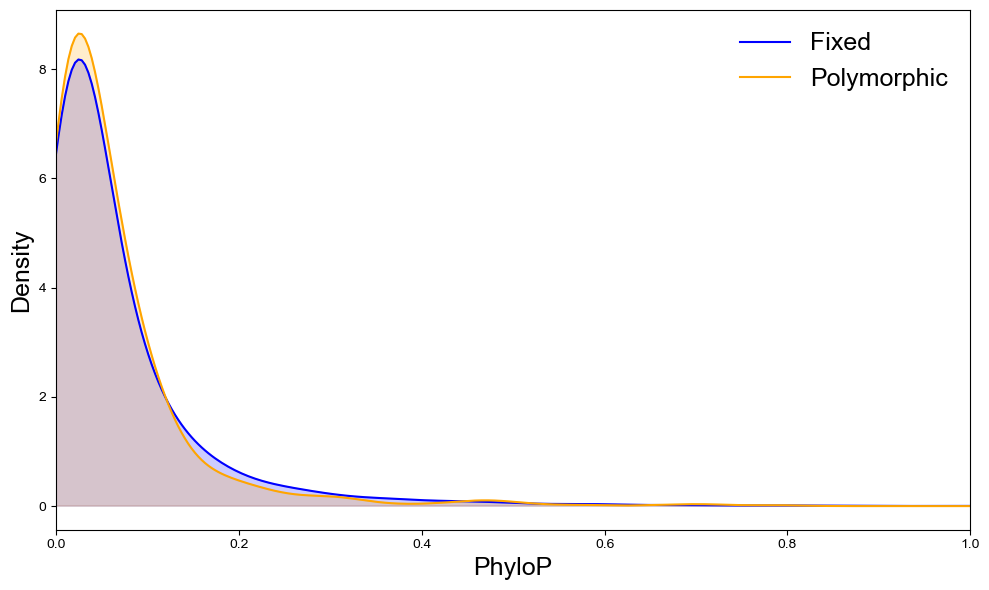

In [8]:
vvv = prepare_alpha(v2, vv2, stat = "abs logfc")
compute_alpha_cutoff(vvv, plot = True, window = [0, 1], cutoff = 0.1)

In [92]:
binomtest(5, 7, p_sw)

BinomTestResult(k=5, n=7, alternative='two-sided', statistic=0.7142857142857143, pvalue=0.009154234626665115)

In [110]:
v2_ws

Position.1 NearestGene  NearestDist  PhyloP447  \
Position                                                             
chr1:3012180      chr1:3012180      ACTRT2         9304     -0.770   
chr1:3012359      chr1:3012359      ACTRT2         9125     -0.417   
chr1:3012456      chr1:3012456      ACTRT2         9028      0.173   
chr1:3012461      chr1:3012461      ACTRT2         9023      1.082   
chr1:3012497      chr1:3012497      ACTRT2         8987     -1.533   
...                        ...         ...          ...        ...   
chrX:145522483  chrX:145522483     SPANXN1       274980      1.116   
chrX:145532095  chrX:145532095     SPANXN1       284592      3.604   
chrX:148246646  chrX:148246646        AFF2       254081      0.159   
chrX:148246657  chrX:148246657        AFF2       254070      0.614   
chrX:148702152  chrX:148702152        AFF2       201425      3.368   

                PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
Position                                                                  
chr1:3012180           0.000         431 -0.059547         13965.510000   
chr1:3012359           0.000         410  0.036275         17519.676000   
chr1:3012456           0.967         429 -0.063143         16227.512000   
chr1:3012461           0.000         378  0.095545         16228.533000   
chr1:3012497           0.000         401 -0.028804         16071.541000   
...                      ...         ...       ...                  ...   
chrX:145522483         0.990         399  0.069865            25.863567   
chrX:145532095         1.000         406  0.246852           125.448130   
chrX:148246646         0.009         384  0.005677            70.685000   
chrX:148246657         0.000         377 -0.010940            70.958100   
chrX:148702152         1.000         435  0.001808            82.048515   

                allele2_pred_counts  abs logfc  Mut            6 FixedOrPoly  \
Position                                                                       
chr1:3012180           13400.816000   0.059547  G|A  HARsv2_0002       Fixed   
chr1:3012359           17965.780000   0.036275  G|A  HARsv2_0002       Fixed   
chr1:3012456           15532.598000   0.063143  G|A  HARsv2_0002       Fixed   
chr1:3012461           17339.688000   0.095545  G|A  HARsv2_0002       Fixed   
chr1:3012497           15753.850000   0.028804  G|A  HARsv2_0002       Fixed   
...                             ...        ...  ...          ...         ...   
chrX:145522483            27.146868   0.069865  C|T  HARsv2_3164       Fixed   
chrX:145532095           148.858610   0.246852  G|T  HARsv2_3165       Fixed   
chrX:148246646            70.963700   0.005677  C|T  HARsv2_3166       Fixed   
chrX:148246657            70.422060   0.010940  C|T  HARsv2_3166       Fixed   
chrX:148702152            82.151430   0.001808  G|A  HARsv2_3167       Fixed   

               MAFMaxAcrossAncestry UnfoldedMAF  
Position                                         
chr1:3012180                      .           .  
chr1:3012359                      .           .  
chr1:3012456                      .           .  
chr1:3012461                      .           .  
chr1:3012497                      .           .  
...                             ...         ...  
chrX:145522483                    .           .  
chrX:145532095                    .           .  
chrX:148246646                    .           .  
chrX:148246657                    .           .  
chrX:148702152                    .           .  

[4990 rows x 15 columns]

In [214]:
from scipy.stats import multinomial

back_ws_down = v2_ws[(v2_ws["logfc"] > 0.05)].shape[0]
back_ws_up = v2_ws[(v2_ws["logfc"] < -0.05)].shape[0]
back_sw_down = v2_sw[(v2_sw["logfc"] > 0.05)].shape[0]
back_sw_up = v2_sw[(v2_sw["logfc"] < -0.05)].shape[0]

back_ww_ss_down = v2_ww_ss[(v2_ww_ss["logfc"] > 0.05)].shape[0]
back_ww_ss_up = v2_ww_ss[(v2_ww_ss["logfc"] < -0.05)].shape[0]

p_ws = back_ws_up/(back_ws_down + back_ws_up)
p_sw = back_sw_up/(back_sw_down + back_sw_up)
p_ww_ss = back_ww_ss_up/(back_ww_ss_down + back_ww_ss_up)

print(back_ws_down, back_ws_up, back_sw_down, back_sw_up, back_ww_ss_down, back_ww_ss_up)

599 1942 1389 419 327 357


In [224]:
from scipy.stats import multinomial

try:
    vv2 = vv2.drop_duplicates("Unnamed: 0")
    v2 = v2.drop_duplicates("Position.1")
except:
    pass
num_vars = Counter(v2[6])
num_pvars = Counter(vv2[6])
out = []
metric = "abs logfc"
for key in num_vars.keys():
    if num_vars[key] >= 5 and num_pvars[key] >= 0:
        v2k = v2[v2[6].isin([key])].copy()
        vv2k = vv2[vv2[6].isin([key])].copy()
        x2 = [np.float64(x) for x in list(v2k[metric])]
        yvals2 = [np.float64(j) for j in list(vv2k[metric])]
        yvals2.sort()
        vvv = prepare_alpha(v2k, vv2k, stat = metric)
        for cuttt in [0.7]:
            if num_pvars[key] >= 3:
                cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                table1 = alpha[2]
                table2 = alpha[3]
            else:
                alpha = [0, 0, 0, 0]
                table1 = [[1, 1], [1, 1]]
                table2 = [[1, 1], [1, 1]]
            down_ws = v2k[(v2k["logfc"] > 0.05) & (v2k["Position.1"].isin(v2_ws["Position.1"]))].shape[0]
            up_ws = v2k[(v2k["logfc"] < -0.05) & (v2k["Position.1"].isin(v2_ws["Position.1"]))].shape[0]
            down_sw = v2k[(v2k["logfc"] > 0.05) & (v2k["Position.1"].isin(v2_sw["Position.1"]))].shape[0]
            up_sw = v2k[(v2k["logfc"] < -0.05) & (v2k["Position.1"].isin(v2_sw["Position.1"]))].shape[0]
            down_ww_ss = v2k[(v2k["logfc"] > 0.05) & (v2k["Position.1"].isin(v2_ww_ss["Position.1"]))].shape[0]
            up_ww_ss = v2k[(v2k["logfc"] < -0.05) & (v2k["Position.1"].isin(v2_ww_ss["Position.1"]))].shape[0]
            try:
                ws_res = [binomtest(up_ws, up_ws + down_ws, p = p_ws).pvalue, np.log2((up_ws+1)/(down_ws+1)), up_ws, down_ws]
            except:
                ws_res = [1, np.log2((up_ws+1)/(down_ws+1)), up_ws, down_ws]
            try:
                sw_res = [binomtest(up_sw, up_sw + down_sw, p = p_sw).pvalue, np.log2((up_sw+1)/(down_sw+1)), up_sw, down_sw]
            except:
                sw_res = [1, np.log2((up_sw+1)/(down_sw+1)), up_sw, down_sw]
            try:
                ww_ss_res = [binomtest(up_ww_ss, up_ww_ss + down_ww_ss, p = p_ww_ss).pvalue, np.log2((up_ww_ss+1)/(down_ww_ss+1)), up_ww_ss, down_ww_ss]
            except:
                ww_ss_res = [1, np.log2((up_ww_ss+1)/(down_ww_ss+1)), up_ww_ss, down_ww_ss]

            out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
            df = pd.DataFrame(out)
df.columns = ["HAQER", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion", "Binom_WS", 'L2FC_WS', "Up_WS", "Down_WS", "Binom_SW", 'L2FC_SW', "Up_SW", "Down_SW", "Binom_WW_SS", 'L2FC_WW_SS', "Up_WW_SS", "Down_WW_SS"]

df = df.sort_values("MWU p-value; alt greater")
df = df.drop(["Median Fixed PhyloP", "Median Polymorphic PhyloP", "Fisher exact p-value", "MWU p-value", "alpha", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion"], axis = 1)

df

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: 

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: 

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\160691409.py:50: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt] + ws_res + sw_res + ww_ss_res)
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarn

HAQER  Number Fixed Variants  Number Polymorphic Variants  \
607  HARsv2_3143                      5                            2   
141  HARsv2_0767                      5                            3   
137  HARsv2_0756                     10                            1   
330  HARsv2_1756                     10                            1   
107  HARsv2_0583                      7                            2   
..           ...                    ...                          ...   
603  HARsv2_3125                      5                            0   
604  HARsv2_3129                      5                            0   
605  HARsv2_3132                      5                            0   
606  HARsv2_3136                      6                            0   
608  HARsv2_3158                      6                            0   

     Fisher exact p-value; alt greater  MWU p-value; alt greater    Cutoff  \
607                           0.833333                  0.047619  0.000000   
141                           0.339286                  0.071429  0.066193   
137                           0.833333                  0.090909  0.000000   
330                           0.833333                  0.090909  0.000000   
107                           0.833333                  0.111111  0.000000   
..                                 ...                       ...       ...   
603                           0.833333                       NaN  0.000000   
604                           0.833333                       NaN  0.000000   
605                           0.833333                       NaN  0.000000   
606                           0.833333                       NaN  0.000000   
608                           0.833333                       NaN  0.000000   

     Binom_WS   L2FC_WS  Up_WS  Down_WS  Binom_SW   L2FC_SW  Up_SW  Down_SW  \
607  1.000000  0.000000      0        0  1.000000  0.000000      0        0   
141  1.000000  0.000000      0        0  0.136228  0.584963      2        1   
137  0.415897  0.000000      1        1  1.000000  0.000000      0        0   
330  1.000000  1.584963      2        0  1.000000  0.000000      0        0   
107  1.000000  1.000000      3        1  1.000000  0.000000      0        0   
..        ...       ...    ...      ...       ...       ...    ...      ...   
603  1.000000  0.000000      0        0  1.000000  0.000000      0        0   
604  0.055571 -1.584963      0        2  1.000000  0.000000      0        0   
605  0.055571 -1.584963      0        2  0.409789  0.000000      1        1   
606  0.235734 -1.000000      0        1  0.231748  1.000000      1        0   
608  0.235734 -1.000000      0        1  1.000000  0.000000      0        0   

     Binom_WW_SS  L2FC_WW_SS  Up_WW_SS  Down_WW_SS  
607     1.000000    0.000000         0           0  
141     1.000000    0.000000         0           0  
137     1.000000    0.000000         0           0  
330     0.500962    1.584963         2           0  
107     0.478070   -1.000000         0           1  
..           ...         ...       ...         ...  
603     1.000000    0.000000         0           0  
604     1.000000    0.000000         0           0  
605     1.000000    0.000000         0           0  
606     1.000000    0.000000         0           0  
608     1.000000    1.000000         1           0  

[609 rows x 18 columns]

In [177]:
v2_back

Chrom       Pos1       Pos2
Position                                  
chr1:20386906   chr1   20386906   20386907
chr1:20387021   chr1   20387021   20387022
chr1:44019627   chr1   44019627   44019628
chr1:49016321   chr1   49016321   49016322
chr1:50696886   chr1   50696886   50696887
...              ...        ...        ...
chrX:150146313  chrX  150146313  150146314
chrX:150146352  chrX  150146352  150146353
chrX:153954712  chrX  153954712  153954713
chrX:153954715  chrX  153954715  153954716
chrX:153954724  chrX  153954724  153954725

[8747 rows x 3 columns]

In [228]:
v2[(v2["NearestGene"].isin(["IL5RA", "CNTN4", "CNTN6"]))].head(50)

Position.1 NearestGene  NearestDist  PhyloP447  PhastCons447  \
Position                                                                       
chr3:723058    chr3:723058       CNTN6       369911     -0.561         0.000   
chr3:723177    chr3:723177       CNTN6       369792      0.193         0.928   
chr3:723185    chr3:723185       CNTN6       369784      2.782         1.000   
chr3:775922    chr3:775922       CNTN6       317047      0.434         0.134   
chr3:775932    chr3:775932       CNTN6       317037      0.683         0.001   
chr3:776027    chr3:776027       CNTN6       316942      0.726         0.057   
chr3:966423    chr3:966423       CNTN6       126546     -0.012         0.943   
chr3:966459    chr3:966459       CNTN6       126510     -1.561         0.002   
chr3:966470    chr3:966470       CNTN6       126499     -0.241         0.000   
chr3:966522    chr3:966522       CNTN6       126447      1.710         0.420   
chr3:966652    chr3:966652       CNTN6       126317      2.677         0.033   
chr3:966700    chr3:966700       CNTN6       126269      0.164         0.001   
chr3:1195983  chr3:1195983       CNTN6       103014      1.272         0.000   
chr3:1196119  chr3:1196119       CNTN6       103150     -7.066         0.000   
chr3:1196145  chr3:1196145       CNTN6       103176      0.175         0.033   
chr3:1196208  chr3:1196208       CNTN6       103239     -0.177         0.000   
chr3:1196221  chr3:1196221       CNTN6       103252      0.096         0.000   
chr3:1196280  chr3:1196280       CNTN6       103311     -1.228         0.000   
chr3:1231927  chr3:1231927       CNTN6       138958      1.305         0.157   
chr3:1231949  chr3:1231949       CNTN6       138980      1.017         0.938   
chr3:1231970  chr3:1231970       CNTN6       139001      0.189         0.000   
chr3:1231971  chr3:1231971       CNTN6       139002      2.512         0.003   
chr3:1635480  chr3:1635480       CNTN4       463404      1.513         1.000   
chr3:1635577  chr3:1635577       CNTN4       463308      3.109         0.996   
chr3:1635580  chr3:1635580       CNTN4       463304     -0.340         0.000   
chr3:1635610  chr3:1635610       CNTN4       463274      2.579         1.000   
chr3:1635660  chr3:1635660       CNTN4       463224      1.773         0.001   
chr3:1669633  chr3:1669633       CNTN4       429252      0.918         0.982   
chr3:1669663  chr3:1669663       CNTN4       429222      4.058         1.000   
chr3:1669664  chr3:1669664       CNTN4       429220      0.898         1.000   
chr3:1669777  chr3:1669777       CNTN4       429108      0.790         0.005   
chr3:2096050  chr3:2096050       CNTN4         2834     -0.754         0.000   
chr3:2096193  chr3:2096193       CNTN4         2692      0.500         0.023   
chr3:2096340  chr3:2096340       CNTN4         2544      1.840         0.331   
chr3:2096352  chr3:2096352       CNTN4         2532      0.638         0.000   
chr3:2096393  chr3:2096393       CNTN4         2492     -1.206         0.000   
chr3:2096442  chr3:2096442       CNTN4         2442      0.197         0.000   
chr3:2099946  chr3:2099946       CNTN4         1062      1.208         0.000   
chr3:2099986  chr3:2099986       CNTN4         1102      0.326         0.015   
chr3:2100066  chr3:2100066       CNTN4         1182     -0.925         0.000   
chr3:2100081  chr3:2100081       CNTN4         1196     -0.686         0.000   
chr3:2100102  chr3:2100102       CNTN4         1218     -0.053         0.000   
chr3:2100121  chr3:2100121       CNTN4         1236     -0.977         0.000   
chr3:2100257  chr3:2100257       CNTN4         1372      2.631         0.988   
chr3:2100289  chr3:2100289       CNTN4         1404      1.046         0.003   
chr3:2100313  chr3:2100313       CNTN4         1428     -0.685         0.000   
chr3:2269137  chr3:2269137       CNTN4       170252      0.135         0.000   
chr3:2269184  chr3:2269184       CNTN4       170300     -0.088         0.000   
chr3:2269194  ch

In [207]:
vv2[vv2["NearestGene"].isin(["EXOC2", "FOXQ1", "FOXF2", "IRF4"])].sort_values("logfc").tail(50)

Unnamed: 0  MAFMaxAcrossAncestry NearestGene  NearestDist  \
Position                                                                  
chr6:710931  chr6:710931              0.306363       EXOC2        17848   
chr6:761243  chr6:761243              0.653890       EXOC2        68160   
chr6:761122  chr6:761122              0.453204       EXOC2        68038   

             PhyloP447  PhastCons447  SpecSup447     logfc  \
Position                                                     
chr6:710931      2.096         1.000         399 -0.086126   
chr6:761243     -0.960         0.000         365 -0.070418   
chr6:761122      1.781         0.001         316  0.014114   

             allele1_pred_counts  allele2_pred_counts  abs logfc Human ref  \
Position                                                                     
chr6:710931            4057.9077            3822.7466   0.086126         G   
chr6:761243            2695.5195            2567.1104   0.070418         A   
chr6:761122            1784.6936            1802.2388   0.014114         A   

            Human alt Chimp ref Gorilla ref  UnfoldedMAF  fixed logfc  \
Position                                                                
chr6:710931         A         A           A     0.693637    -0.086126   
chr6:761243         C         A           A     0.653890     0.070418   
chr6:761122         C         A           A     0.453204    -0.014114   

                     6  FixedOrPoly  
Position                             
chr6:710931  HAQER0639  Polymorphic  
chr6:761243  HAQER0134  Polymorphic  
chr6:761122  HAQER0134  Polymorphic

In [184]:
#Genes driving synaptic enrichment in GREAT are
#But GREAT associates with nearest gene by CDS, not by TSS so e.g. ICA1 appears a lot in the list but not in mine
syn_driver_genes = ["SLC17A6", "SYT1", "SV2B", "TMEM163", "GABRA2", "STXBP5", "ICA1"]


In [12]:
v[v["NearestGene"].isin(["VLDLR"])].sort_values("abs logfc").tail(50)

Position    Position.1 NearestGene  NearestDist  PhyloP447  \
Position                                                                       
chr9:2664110  chr9:2664110  chr9:2664110       VLDLR        42328      0.009   
chr9:2597640  chr9:2597640  chr9:2597640       VLDLR        24142      0.085   
chr9:2454763  chr9:2454763  chr9:2454763       VLDLR       167019     -0.464   
chr9:2549855  chr9:2549855  chr9:2549855       VLDLR        71927      0.990   
chr9:2330152  chr9:2330152  chr9:2330152       VLDLR       291630      0.168   
chr9:2340990  chr9:2340990  chr9:2340990       VLDLR       280792     -0.665   
chr9:2559345  chr9:2559345  chr9:2559345       VLDLR        62437     -0.292   
chr9:2437823  chr9:2437823  chr9:2437823       VLDLR       183959      0.609   
chr9:2507612  chr9:2507612  chr9:2507612       VLDLR       114170     -1.992   
chr9:2662757  chr9:2662757  chr9:2662757       VLDLR        40975      2.024   
chr9:2420585  chr9:2420585  chr9:2420585       VLDLR       201197     -0.024   
chr9:2463913  chr9:2463913  chr9:2463913       VLDLR       157869      0.585   
chr9:2623628  chr9:2623628  chr9:2623628       VLDLR         1846      0.348   
chr9:2604102  chr9:2604102  chr9:2604102       VLDLR        17680      1.597   
chr9:2434605  chr9:2434605  chr9:2434605       VLDLR       187177     -1.254   
chr9:2531509  chr9:2531509  chr9:2531509       VLDLR        90273     -2.035   
chr9:2352025  chr9:2352025  chr9:2352025       VLDLR       269757      0.514   
chr9:2576358  chr9:2576358  chr9:2576358       VLDLR        45424      0.903   
chr9:2616755  chr9:2616755  chr9:2616755       VLDLR         5027     -1.463   
chr9:2592093  chr9:2592093  chr9:2592093       VLDLR        29689      0.209   
chr9:2398139  chr9:2398139  chr9:2398139       VLDLR       223643     -0.153   
chr9:2455986  chr9:2455986  chr9:2455986       VLDLR       165796     -0.124   
chr9:2326893  chr9:2326893  chr9:2326893       VLDLR       294889      0.030   
chr9:2574651  chr9:2574651  chr9:2574651       VLDLR        47131     -0.772   
chr9:2531545  chr9:2531545  chr9:2531545       VLDLR        90237      0.145   
chr9:2342772  chr9:2342772  chr9:2342772       VLDLR       279010     -0.187   
chr9:2359249  chr9:2359249  chr9:2359249       VLDLR       262533      1.393   
chr9:2356643  chr9:2356643  chr9:2356643       VLDLR       265139     -2.050   
chr9:2469894  chr9:2469894  chr9:2469894       VLDLR       151888      0.279   
chr9:2596305  chr9:2596305  chr9:2596305       VLDLR        25477      1.244   
chr9:2421812  chr9:2421812  chr9:2421812       VLDLR       199970      0.165   
chr9:2418733  chr9:2418733  chr9:2418733       VLDLR       203049      0.743   
chr9:2664970  chr9:2664970  chr9:2664970       VLDLR        43188      0.940   
chr9:2434985  chr9:2434985  chr9:2434985       VLDLR       186797     -0.809   
chr9:2349499  chr9:2349499  chr9:2349499       VLDLR       272283      1.485   
chr9:2492583  chr9:2492583  chr9:2492583       VLDLR       129199      0.342   
chr9:2368183  chr9:2368183  chr9:2368183       VLDLR       253599      0.141   
chr9:2452326  chr9:2452326  chr9:2452326       VLDLR       169456      1.071   
chr9:2355757  chr9:2355757  chr9:2355757       VLDLR       266025      0.593   
chr9:2398403  chr9:2398403  chr9:2398403       VLDLR       223379     -0.312   
chr9:2376702  chr9:2376702  chr9:2376702       VLDLR       245080      0.303   
chr9:2349386  chr9:2349386  chr9:2349386       VLDLR       272396      0.122   
chr9:2622904  chr9:2622904  chr9:2622904       VLDLR         1122      0.443   
chr9:2353011  chr9:2353011  chr9:2353011       VLDLR       268771     -0.027   
chr9:2662667  chr9:2662667  chr9:2662667       VLDLR        40885     -0.096   
chr9:2361040  chr9:2361040  chr9:2361040       VLDLR       260742     -2.989   
chr9:2649012  chr9:2649012  chr9:2649012       VLDLR        27230     -1.130   
chr9:2585749  chr9:2585749  chr9:2585749       VLDLR        36033     -0.892   
chr9:2401613  chr9

In [217]:
#Change 0.1 to 0.25 for NFIB and other TFs with large effects on CA
v2_fore = v2[v2["abs logfc"] > 0.1]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position.1"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position.1"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position.1"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_fore.to_csv("HAR_AbsG0.1_Fixed_FetalChondrocytes_FilterNewTEs_All.bed", sep = "\t", header = None, index = None)

v2["Chrom"] = [x.split(":")[0] for x in v2["Position.1"]]
v2["Pos1"] = [int(x.split(":")[1]) for x in v2["Position.1"]]
v2["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2["Position.1"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v2_back = pd.concat([v2_fore, v2[v2["abs logfc"] < 0.025]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("HAR_AbsL0.025_G0.1_Fixed_Background_New_FetalChondrocytes_FilterNewTEs_All.bed", sep = "\t", header = None, index = None)


C:\Users\astar\AppData\Local\Temp\ipykernel_3460\1838464624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position.1"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\1838464624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position.1"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_3460\1838464624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [173]:
v2[v2["abs logfc"] > 0.25]

Position.1 NearestGene  NearestDist  PhyloP447  \
Position                                                             
chr1:20386906    chr1:20386906      VWA5B1        96010      5.476   
chr1:20387021    chr1:20387021      VWA5B1        96126      8.408   
chr1:44019627    chr1:44019627      SLC6A9        11798     -0.300   
chr1:49016321    chr1:49016321       BEND5       239531      3.068   
chr1:50696886    chr1:50696886        FAF1       263328      5.566   
...                        ...         ...          ...        ...   
chrX:124848108  chrX:124848108       TENM1       115648      0.392   
chrX:129108258  chrX:129108258     SMARCA1       415216      2.120   
chrX:134175794  chrX:134175794     CCDC160        61398      1.474   
chrX:144625812  chrX:144625812     SPANXN1       621691      1.715   
chrX:144625926  chrX:144625926     SPANXN1       621577      0.059   

                PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
Position                                                                  
chr1:20386906          1.000         443  0.479233            4091.9290   
chr1:20387021          1.000         443 -0.710602            3830.0298   
chr1:44019627          0.025         443  0.256534            1931.0535   
chr1:49016321          0.996         445 -0.389321             662.7544   
chr1:50696886          1.000         441 -0.329932            1236.9368   
...                      ...         ...       ...                  ...   
chrX:124848108         0.381         398  0.289465             502.8905   
chrX:129108258         0.969         436  0.644496            1183.2773   
chrX:134175794         0.999         406 -0.263172             805.5242   
chrX:144625812         1.000         430 -0.690512            1765.7727   
chrX:144625926         0.983         434 -0.339702            1815.2378   

                allele2_pred_counts  abs logfc  Mut            6  
Position                                                          
chr1:20386906            5704.15870   0.479233  G|A  HARsv2_0013  
chr1:20387021            2340.39820   0.710602  T|G  HARsv2_0013  
chr1:44019627            2306.84720   0.256534  C|T  HARsv2_0025  
chr1:49016321             506.00568   0.389321  G|C  HARsv2_0033  
chr1:50696886             984.07446   0.329932  G|T  HARsv2_0035  
...                             ...        ...  ...          ...  
chrX:124848108            614.62604   0.289465  A|T  HARsv2_3139  
chrX:129108258           1849.69100   0.644496  G|T  HARsv2_3142  
chrX:134175794            671.20593   0.263172  A|G  HARsv2_3149  
chrX:144625812           1094.13230   0.690512  G|A  HARsv2_3162  
chrX:144625926           1434.40880   0.339702  C|A  HARsv2_3162  

[487 rows x 12 columns]

In [150]:
from scipy.stats import combine_pvalues
combine_pvalues([0.109901, 0.201636])

SignificanceResult(statistic=7.618933011462434, pvalue=0.10657776832121152)

In [166]:
df.sort_values("Binom_WS")

HAQER  Number Fixed Variants  Number Polymorphic Variants  \
280  HAQER0134                     50                            2   
197  HAQER0547                     34                            4   
214  HAQER0082                     57                            0   
322  HAQER0856                     24                            1   
19   HAQER0256                     39                            2   
..         ...                    ...                          ...   
273  HAQER1306                      6                            2   
10   HAQER1252                     12                            2   
326  HAQER0735                      8                            1   
80   HAQER0278                      5                            1   
371  HAQER1163                      9                            0   

     Fisher exact p-value; alt greater  MWU p-value; alt greater    Cutoff  \
280                           0.833333                  0.301659  0.000000   
197                           0.914414                  0.937343  0.065038   
214                           0.833333                       NaN  0.000000   
322                           0.833333                  0.160000  0.000000   
19                            0.833333                  0.647561  0.000000   
..                                 ...                       ...       ...   
273                           0.833333                  0.678571  0.000000   
10                            0.833333                  0.670330  0.000000   
326                           0.833333                  0.666667  0.000000   
80                            0.833333                  0.666667  0.000000   
371                           0.833333                       NaN  0.000000   

     Binom_WS   L2FC_WS  Up_WS  Down_WS  Binom_SW   L2FC_SW  Up_SW  Down_SW  \
280  0.002878  3.523562     22        1  0.536141 -1.584963      0        2   
197  0.013673 -1.000000      3        7  1.000000  0.000000      0        0   
214  0.031321 -0.807355      3        6  1.000000 -0.807355      3        6   
322  0.036069 -1.321928      1        4  1.000000 -0.584963      1        2   
19   0.036069 -1.321928      1        4  0.365574  1.000000      1        0   
..        ...       ...    ...      ...       ...       ...    ...      ...   
273  1.000000  1.000000      1        0  0.365574  1.000000      1        0   
10   1.000000  1.000000      1        0  1.000000 -1.000000      0        1   
326  1.000000  0.584963      2        1  1.000000 -1.000000      0        1   
80   1.000000  0.000000      0        0  1.000000  0.000000      0        0   
371  1.000000  0.000000      0        0  1.000000  0.000000      0        0   

     Binom_WW_SS  L2FC_WW_SS  Up_WW_SS  Down_WW_SS  
280     0.388626    1.321928         4           1  
197     1.000000    0.000000         0           0  
214     0.388626    1.321928         4           1  
322     0.447653   -1.000000         0           1  
19      1.000000    0.000000         0           0  
..           ...         ...       ...         ...  
273     1.000000    0.000000         0           0  
10      1.000000    1.000000         1           0  
326     1.000000    0.000000         0           0  
80      1.000000    0.000000         0           0  
371     1.000000    0.000000         0           0  

[373 rows x 18 columns]

In [ ]:
from scipy.stats import multinomial

try:
    vv2 = vv2.drop_duplicates("Unnamed: 0")
    v2 = v2.drop_duplicates("Position.1")
except:
    pass
num_vars = Counter(v2[6])
num_pvars = Counter(vv2[6])
out = []
metric = "abs logfc"
for key in num_vars.keys():
    if num_vars[key] >= 5 and num_pvars[key] >= 0:
        v2k = v2[v2[6].isin([key])].copy()
        vv2k = vv2[vv2[6].isin([key])].copy()
        x2 = [np.float64(x) for x in list(v2k[metric])]
        yvals2 = [np.float64(j) for j in list(vv2k[metric])]
        yvals2.sort()
        vvv = prepare_alpha(v2k, vv2k, stat = metric)
        for cuttt in [0.7]:
            if num_pvars[key] >= 3:
                cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
                alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff)

                table1 = alpha[2]
                table2 = alpha[3]
            else:
                alpha = [0, 0, 0, 0]
                table1 = [[1, 1], [1, 1]]
                table2 = [[1, 1], [1, 1]]
            up = v2k[v2k["logfc"] > 0.05].shape[0]
            down = v2k[v2k["logfc"] < -0.05].shape[0]
            try:
                out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt, binomtest(down, up + down).pvalue, np.log2((down+1)/(up+1)), down, up])
            except:
                out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), (fisher_exact(table1)[1] + fisher_exact(table2)[1])/2, mwu(x2, yvals2)[1], (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2, mwu(x2, yvals2, alternative = "greater")[1], alpha[0], alpha[1], table1, table2, cuttt, 1, down, up])
df = pd.DataFrame(out)
df.columns = ["HAR", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater", "alpha", "Cutoff", "[[dc1, du1], [pc1, pu1]]", "[[dc2, du2], [pc2, pu2]]", "Proportion", "Binom", 'L2FC', "Down", "Up"]
df = df.sort_values("MWU p-value; alt greater")
df

In [70]:
fisher_exact([[553, 452], [1970, 1899]])

SignificanceResult(statistic=1.1793573963433808, pvalue=0.02128035569226177)

In [19]:
df_filt

HAR  Median Fixed PhyloP  Number Fixed Variants  \
330  HARsv2_1756             0.043724                     10   
107  HARsv2_0583             0.078006                      7   
472  HARsv2_2467             0.079826                      6   
556  HARsv2_2904             0.075025                      6   
176  HARsv2_0984             0.074295                      6   
..           ...                  ...                    ...   
577  HARsv2_2968             0.118149                      5   
579  HARsv2_2972             0.044605                      8   
599  HARsv2_3084             0.071589                      7   
602  HARsv2_3108             0.136826                      5   
605  HARsv2_3132             0.082015                      5   

     Median Polymorphic PhyloP  Number Polymorphic Variants  \
330                   0.009304                            1   
107                   0.050402                            2   
472                   0.015649                            3   
556                   0.015043                            1   
176                   0.003027                            1   
..                         ...                          ...   
577                        NaN                            0   
579                        NaN                            0   
599                        NaN                            0   
602                        NaN                            0   
605                        NaN                            0   

     Fisher exact p-value  MWU p-value  Fisher exact p-value; alt greater  \
330              1.000000     0.181818                           0.833333   
107              1.000000     0.222222                           0.833333   
472              0.345238     0.261905                           0.261905   
556              1.000000     0.285714                           0.833333   
176              1.000000     0.285714                           0.833333   
..                    ...          ...                                ...   
577              1.000000          NaN                           0.833333   
579              1.000000          NaN                           0.833333   
599              1.000000          NaN                           0.833333   
602              1.000000          NaN                           0.833333   
605              1.000000          NaN                           0.833333   

     MWU p-value; alt greater  alpha    Cutoff [[dc1, du1], [pc1, pu1]]  \
330                  0.090909  0.000  0.000000         [[1, 1], [1, 1]]   
107                  0.111111  0.000  0.000000         [[1, 1], [1, 1]]   
472                  0.130952  0.875  0.024935         [[4, 2], [0, 3]]   
556                  0.142857  0.000  0.000000         [[1, 1], [1, 1]]   
176                  0.142857  0.000  0.000000         [[1, 1], [1, 1]]   
..                        ...    ...       ...                      ...   
577                       NaN  0.000  0.000000         [[1, 1], [1, 1]]   
579                       NaN  0.000  0.000000         [[1, 1], [1, 1]]   
599                       NaN  0.000  0.000000         [[1, 1], [1, 1]]   
602                       NaN  0.000  0.000000         [[1, 1], [1, 1]]   
605                       NaN  0.000  0.000000         [[1, 1], [1, 1]]   

    [[dc2, du2], [pc2, pu2]]  Proportion  Binom      L2FC  Down   Up  
330         [[1, 1], [1, 1]]         0.7  0.125  2.321928     4  0.0  
107         [[1, 1], [1, 1]]         0.7  1.000  0.415037     3  2.0  
472         [[4, 2], [1, 2]]         0.7  1.000  0.000000     2  2.0  
556         [[1, 1], [1, 1]]         0.7  0.625 -1.000000     1  3.0  
176         [[1, 1], [1, 1]]         0.7  0.625  1.000000     3  1.0  
..                       ...         ...    ...       ...   ...  ...  
577         [[1, 1], [1, 1]]         0.7  1.000  0.415037     3  2.0  
579         [[1, 1], [1, 1]]         0.7  1.000  0.000000     2  2.0  
599         [[1, 1], [

In [32]:
fisher_exact([[356, 234], [2718, 2315]])

SignificanceResult(statistic=1.2957931611353244, pvalue=0.0034074323216052253)

In [68]:
np.sum(df_filt["Up"])

452

In [73]:
## THOSE THAT DO HAVE A BIAS ARE MASSIVELY BIASED TOWARD INCREASED ACCESSIBILITY IN THE HUMAN LINEAGE
df_filt = df[df["Down"] + df["Up"] >= 4]
df_filt_head = df_filt[df_filt["Binom"] < 0.25]
df_filt_tail = df_filt[df_filt["Binom"] >= 0.25]
print(np.sum(df_filt_head["Down"])/np.sum((df_filt_head["Up"] + df_filt_head["Down"])))
fisher_exact([[np.sum(df_filt_head['Down']), np.sum(df_filt_head['Up'])], [np.sum(df_filt_tail['Down']), np.sum(df_filt_tail['Up'])]])

0.7272727272727273


SignificanceResult(statistic=1.7523809523809524, pvalue=0.26203420069963557)

Position     Position.1 NearestGene  NearestDist  PhyloP447  \
0            chr1:15446     chr1:15446       OR4F5        53644     -1.587   
1            chr1:16497     chr1:16497       OR4F5        52593      0.010   
2            chr1:16580     chr1:16580       OR4F5        52510     -1.563   
3            chr1:19051     chr1:19051       OR4F5        50039     -0.060   
4            chr1:39163     chr1:39163       OR4F5        29927     -1.209   
...                 ...            ...         ...          ...        ...   
10326915  chrY:56878783  chrY:56878783        CDY1     31256667      1.497   
10326916  chrY:56878814  chrY:56878814        CDY1     31256698     -0.145   
10326917  chrY:56884539  chrY:56884539        CDY1     31262423      0.535   
10326918  chrY:56884573  chrY:56884573        CDY1     31262457     -1.057   
10326919  chrY:56884587  chrY:56884587        CDY1     31262471     -0.596   

          PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
0                0.000         383 -0.132272            693.00910   
1                0.000         398 -0.013052            472.24908   
2                0.000         400  0.008982            437.20557   
3                0.000         411  0.025041            371.92870   
4                0.000         222  0.048970            407.02832   
...                ...         ...       ...                  ...   
10326915         0.006         182 -0.005613            473.32645   
10326916         0.000         103  0.022943            472.42620   
10326917         0.000         244  0.080384            470.96396   
10326918         0.000         378  0.068063            477.53012   
10326919         0.000         376  0.021343            474.53340   

          allele2_pred_counts  abs logfc  
0                   632.29690   0.132272  
1                   467.99580   0.013052  
2                   439.93616   0.008982  
3                   378.44073   0.025041  
4                   421.08130   0.048970  
...                       ...        ...  
10326915            471.48843   0.005613  
10326916            479.99910   0.022943  
10326917            497.94990   0.080384  
10326918            500.59870   0.068063  
10326919            481.60583   0.021343  

[10030151 rows x 11 columns]

In [74]:
v.index = v["Position"]
v = v.join(x)
v_ws = v[v["Mut"].isin(["C|A", "G|A", "C|T", "G|T"])]
v_sw = v[v["Mut"].isin(["A|C", "A|G", "T|C", "T|G"])]
v_ww_ss = v[~v["Position"].isin(list(v_ws["Position"]) + list(v_sw["Position"]))]

In [29]:
v_ws = v[v["Mut"].isin(["C|A", "G|A", "C|T", "G|T"])]
v_sw = v[v["Mut"].isin(["A|C", "A|G", "T|C", "T|G"])]
v_ww_ss = v[~v["Position"].isin(list(v_ws["Position"]) + list(v_sw["Position"]))]


In [ ]:
#All for LiangSteinNeuron, similar values obtained for KosoyRoussosControlMicroglia
#This suggests that the bias in sign is unlikely to affect the other results based on absolute log fold-change

#Values for cutoff of 0.05 and no specsup filtering
down_ws = 264385
up_ws = 570978
down_sw = 638632
up_sw = 346457
down_ww_ss = 160868
up_ww_ss = 129247

#Values for cutoff of 0.2 and no specsup filtering
down_ws = 38929
up_ws = 60597
down_sw = 72037
up_sw = 46317
down_ww_ss = 18298
up_ww_ss = 20814

#Values for cutoff of 0.5 and no specsup filtering
down_ws = 6117
up_ws = 7226
down_sw = 9167
up_sw = 7000
down_ww_ss = 2955
up_ww_ss = 2972

#Values for cutoff of 0.2 and SpecSup > 250
down_ws = 25735
up_ws = 37897
down_sw = 44817
up_sw = 28084
down_ww_ss = 11709
up_ww_ss = 12347

In [87]:
print(v_ws[(v_ws["logfc"] > 0.05)].shape[0])
print(v_ws[(v_ws["logfc"] < -0.05)].shape[0])
print(v_sw[(v_sw["logfc"] > 0.05)].shape[0])
print(v_sw[(v_sw["logfc"] < -0.05)].shape[0])

print(v_ww_ss[(v_ww_ss["logfc"] > 0.05)].shape[0])
print(v_ww_ss[(v_ww_ss["logfc"] < -0.05)].shape[0])


320189
1290986
1356467
387658
208806
260915


In [58]:
v2

Position.1 NearestGene  NearestDist  PhyloP447  \
Position                                                             
chr1:3114084      chr1:3114084      PRDM16        44895     -0.490   
chr1:3114107      chr1:3114107      PRDM16        44918     -0.995   
chr1:4647857      chr1:4647857       AJAP1         6838     -1.842   
chr1:4647935      chr1:4647935       AJAP1         6760      2.039   
chr1:5250603      chr1:5250603       AJAP1       595908     -3.463   
...                        ...         ...          ...        ...   
chrX:141758965  chrX:141758965     SPANXF1        60457     -1.973   
chrX:141758988  chrX:141758988     SPANXF1        60480      0.089   
chrX:141758996  chrX:141758996     SPANXF1        60488     -0.667   
chrX:141791506  chrX:141791506      MAGEC3        46810     -0.296   
chrX:149418300  chrX:149418300         IDS        86982     -0.412   

                PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
Position                                                                  
chr1:3114084           0.000         422  0.003787            945.13410   
chr1:3114107           0.000         349 -0.099196            897.47577   
chr1:4647857           0.000         239  0.043621            133.79588   
chr1:4647935           0.004         239  0.265271            144.35654   
chr1:5250603           0.000         322  0.059173            530.17670   
...                      ...         ...       ...                  ...   
chrX:141758965         0.000         225 -0.016688            226.51187   
chrX:141758988         0.000         262 -0.025321            221.39264   
chrX:141758996         0.000         323  0.005726            222.46307   
chrX:141791506         0.000         387 -0.005208            392.35236   
chrX:149418300         0.000         153 -0.015106            221.04776   

                allele2_pred_counts  abs logfc  Mut          6  
Position                                                        
chr1:3114084              947.61800   0.003787  G|A  HAQER1433  
chr1:3114107              837.84130   0.099196  G|A  HAQER1433  
chr1:4647857              137.90309   0.043621  T|C  HAQER0418  
chr1:4647935              173.49667   0.265271  C|T  HAQER0418  
chr1:5250603              552.37450   0.059173  C|T  HAQER0419  
...                             ...        ...  ...        ...  
chrX:141758965            223.90678   0.016688  T|C  HAQER1164  
chrX:141758988            217.54090   0.025321  C|T  HAQER1164  
chrX:141758996            223.34772   0.005726  A|G  HAQER1164  
chrX:141791506            390.93848   0.005208  G|A  HAQER0313  
chrX:149418300            218.74536   0.015106  C|T  HAQER0662  

[7251 rows x 12 columns]

In [60]:
v2k = v2[v2[6].isin(df_filt.sort_values("L2FC").tail(12)["HAR"])]
#df_filt.sort_values("L2FC").tail(12)
v2k

Position.1 NearestGene  NearestDist  PhyloP447  \
Position                                                             
chr16:62950214  chr16:62950214        CDH8       913853      0.798   
chr16:62950249  chr16:62950249        CDH8       913888      2.738   
chr16:62950267  chr16:62950267        CDH8       913906      5.893   
chr16:62950268  chr16:62950268        CDH8       913907     -0.278   
chr16:62950284  chr16:62950284        CDH8       913923      0.424   
chr16:62950321  chr16:62950321        CDH8       913960     -0.454   
chr18:59353253  chr18:59353253       LMAN1         6085     -0.194   
chr18:59353256  chr18:59353256       LMAN1         6082      0.745   
chr18:59353259  chr18:59353259       LMAN1         6079     -1.242   
chr18:59353280  chr18:59353280       LMAN1         6058      1.830   
chr18:59353295  chr18:59353295       LMAN1         6043     -0.325   
chr18:59353298  chr18:59353298       LMAN1         6040      1.337   
chr20:37851149  chr20:37851149      VSTM2L        51988      1.089   
chr20:37851164  chr20:37851164      VSTM2L        51974      1.380   
chr20:37851205  chr20:37851205      VSTM2L        51932      0.035   
chr20:37851214  chr20:37851214      VSTM2L        51924     -0.213   
chr20:37851226  chr20:37851226      VSTM2L        51912      5.513   
chr20:37851239  chr20:37851239      VSTM2L        51898      1.726   
chr21:44082604  chr21:44082604        PWP2        24762      0.042   
chr21:44082623  chr21:44082623        PWP2        24743     -0.570   
chr21:44082646  chr21:44082646        PWP2        24720     -0.478   
chr21:44082659  chr21:44082659        PWP2        24707     -4.511   
chr21:44082664  chr21:44082664        PWP2        24702      0.126   
chr21:44082681  chr21:44082681        PWP2        24685     -1.269   
chr21:44082719  chr21:44082719        PWP2        24647     -0.226   
chr21:44082765  chr21:44082765        PWP2        24601     -0.341   
chr3:2660324      chr3:2660324       IL5RA       449668     -2.050   
chr3:2660392      chr3:2660392       IL5RA       449600     -0.034   
chr3:2660393      chr3:2660393       IL5RA       449599      0.415   
chr3:2660437      chr3:2660437       IL5RA       449555      0.422   
chr3:2660464      chr3:2660464       IL5RA       449528      0.771   
chr3:2660475      chr3:2660475       IL5RA       449517     -0.434   
chr3:2660492      chr3:2660492       IL5RA       449500      0.040   
chr3:2660502      chr3:2660502       IL5RA       449490     -0.697   
chr3:2660508      chr3:2660508       IL5RA       449484      0.128   
chr3:2660570      chr3:2660570       IL5RA       449422     -2.340   
chr3:2741630      chr3:2741630       IL5RA       368362     -0.669   
chr3:2741665      chr3:2741665       IL5RA       368327     -0.505   
chr3:2741670      chr3:2741670       IL5RA       368322     -0.568   
chr3:2741703      chr3:2741703       IL5RA       368289      0.016   
chr3:2741720      chr3:2741720       IL5RA       368272      1.075   
chr3:2741747      chr3:2741747       IL5RA       368245     -0.080   
chr3:2741785      chr3:2741785       IL5RA       368207     -0.594   
chr3:2741826      chr3:2741826       IL5RA       368166     -1.172   
chr3:2741978      chr3:2741978       IL5RA       368014     -0.248   
chr3:2741990      chr3:2741990       IL5RA       368002      0.753   
chr3:2742032      chr3:2742032       IL5RA       367960     -0.767   
chr3:2742079      chr3:2742079       IL5RA       367913      4.862   
chr3:175851322  chr3:175851322    NAALADL2       992042     -0.821   
chr3:175851327  chr3:175851327    NAALADL2       992047     -0.356   

                PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
Position                                                                  
chr16:62950214         0.005         441  0.016354            461.47412   
chr16:62950249         1.000         442 -0.070882            470.73254   
chr16:62950267         0.995         422 -0.129029            471.63464   
chr1

In [66]:
v2_ws = v2[v2["Mut"].isin(["C|A", "G|A", "C|T", "G|T"])]
v2_sw = v2[v2["Mut"].isin(["A|C", "A|G", "T|C", "T|G"])]
v2_ww_ss = v2[~v2["Position.1"].isin(list(v2_ws["Position.1"]) + list(v2_sw["Position.1"]))]

print(v2_ws.shape[0]/(v2_ws.shape[0] + v2_sw.shape[0] + v2_ww_ss.shape[0]))

0.48959968602825743


In [68]:
v2k_ws = v2k[v2k["Mut"].isin(["C|A", "G|A", "C|T", "G|T"])]
v2k_sw = v2k[v2k["Mut"].isin(["A|C", "A|G", "T|C", "T|G"])]
v2k_ww_ss = v2k[~v2k["Position.1"].isin(list(v2k_ws["Position.1"]) + list(v2k_sw["Position.1"]))]

print(v2k_ws.shape[0]/(v2k_ws.shape[0] + v2k_sw.shape[0] + v2k_ww_ss.shape[0]))

0.7419354838709677


In [94]:
[[np.sum(df_filt_head['Down']), np.sum(df_filt_head['Up'])], [np.sum(df_filt_tail['Down']), np.sum(df_filt_tail['Up'])]]

[[176, 59], [302, 251]]

In [113]:
## THOSE THAT DO HAVE A BIAS ARE MASSIVELY BIASED TOWARD INCREASED ACCESSIBILITY IN THE HUMAN LINEAGE
df_filt = df[df["Down"] + df["Up"] >= 4]
df_filt_head = df_filt[df_filt["Binom"] < 0.1]
df_filt_tail = df_filt[df_filt["Binom"] >= 0.1]
print(np.sum(df_filt_head["Down"])/np.sum((df_filt_head["Up"] + df_filt_head["Down"])))
fisher_exact([[np.sum(df_filt_head['Down']), np.sum(df_filt_head['Up'])], [np.sum(df_filt_tail['Down']), np.sum(df_filt_tail['Up'])]])

0.7934782608695652


SignificanceResult(statistic=3.4376731301939056, pvalue=0.00039369230007070907)

In [99]:
df_filt_head

HAR  Median Fixed PhyloP  Number Fixed Variants  \
241  HAQER1108             0.081510                     21   
351  HAQER0351             0.055473                     49   
280  HAQER0134             0.060609                     50   
290  HAQER0302             0.036078                     33   
180  HAQER1280             0.038005                     27   
267  HAQER0559             0.057212                     33   
279  HAQER0639             0.085755                     38   
179  HAQER1467             0.043814                     23   
360  HAQER1352             0.023695                     34   
281  HAQER0391             0.042720                     41   
13   HAQER1439             0.037676                     42   
38   HAQER0752             0.099634                     15   
61   HAQER0586             0.031407                     34   
88   HAQER1392             0.064897                     24   

     Median Polymorphic PhyloP  Number Polymorphic Variants  \
241                   0.018469                            2   
351                   0.018766                            2   
280                   0.042266                            2   
290                   0.026319                            5   
180                   0.029799                            1   
267                   0.050841                            2   
279                   0.086126                            1   
179                   0.089824                            1   
360                   0.084461                            2   
281                   0.060755                           10   
13                         NaN                            0   
38                         NaN                            0   
61                         NaN                            0   
88                         NaN                            0   

     Fisher exact p-value  MWU p-value  Fisher exact p-value; alt greater  \
241              1.000000     0.047431                           0.833333   
351              1.000000     0.112941                           0.833333   
280              1.000000     0.603318                           0.833333   
290              0.814764     0.706137                           0.492734   
180              1.000000     0.857143                           0.833333   
267              1.000000     0.860504                           0.833333   
279              1.000000     0.974359                           0.833333   
179              1.000000     0.500000                           0.833333   
360              1.000000     0.384127                           0.833333   
281              0.500165     0.313315                           0.879997   
13               1.000000          NaN                           0.833333   
38               1.000000          NaN                           0.833333   
61               1.000000          NaN                           0.833333   
88               1.000000          NaN                           0.833333   

     MWU p-value; alt greater     alpha    Cutoff [[dc1, du1], [pc1, pu1]]  \
241                  0.023715  0.000000  0.000000         [[1, 1], [1, 1]]   
351                  0.056471  0.000000  0.000000         [[1, 1], [1, 1]]   
280                  0.301659  0.000000  0.000000         [[1, 1], [1, 1]]   
290                  0.353069  0.377976  0.046960       [[14, 19], [1, 4]]   
180                  0.428571  0.000000  0.000000         [[1, 1], [1, 1]]   
267                  0.430252  0.000000  0.000000         [[1, 1], [1, 1]]   
279                  0.538462  0.000000  0.000000         [[1, 1], [1, 1]]   
179                  0.791667  0.000000  0.000000         [[1, 1], [1, 1]]   
360                  0.825397  0.000000  0.000000         [[1, 1], [1, 1]]   
281                  0.848968 -0.979167  0.104066        [[6, 35], [2, 8]]   
13                        NaN  0.000000  0.000000         [[1, 1], [1, 1]]   
38                        NaN  0.000000  0

In [98]:
## THOSE THAT DO HAVE A BIAS ARE MASSIVELY BIASED TOWARD INCREASED ACCESSIBILITY IN THE HUMAN LINEAGE
df_filt = df[df["Down"] + df["Up"] >= 10]
df_filt_head = df_filt[np.abs(df_filt["L2FC"]) > 1]
df_filt_tail = df_filt[np.abs(df_filt["L2FC"]) <= 1]
print(np.sum(df_filt_head["Down"])/np.sum((df_filt_head["Up"] + df_filt_head["Down"])))
fisher_exact([[np.sum(df_filt_head['Down']), np.sum(df_filt_head['Up'])], [np.sum(df_filt_tail['Down']), np.sum(df_filt_tail['Up'])]])

0.7575757575757576


SignificanceResult(statistic=2.6196369636963697, pvalue=1.6725624793741115e-08)

In [114]:
df_filt.sort_values("Binom").head(20)

HAR  Median Fixed PhyloP  Number Fixed Variants  \
280  HAQER0134             0.024285                     50   
154  HAQER0782             0.022896                     37   
143  HAQER0532             0.030251                     38   
240  HAQER0497             0.017730                     50   
179  HAQER1467             0.038793                     23   
144  HAQER0223             0.017413                     78   
184  HAQER0066             0.025748                     53   
145  HAQER0533             0.031781                     55   
142  HAQER0911             0.044228                     26   
279  HAQER0639             0.033102                     38   
351  HAQER0351             0.029721                     49   
267  HAQER0559             0.037754                     33   
83   HAQER1200             0.046893                     25   

     Median Polymorphic PhyloP  Number Polymorphic Variants  \
280                   0.093845                            2   
154                        NaN                            0   
143                   0.052359                            2   
240                        NaN                            0   
179                   0.124469                            1   
144                   0.155132                            1   
184                        NaN                            0   
145                   0.017845                            1   
142                   0.019191                            1   
279                   0.034475                            1   
351                   0.023833                            2   
267                   0.045327                            2   
83                         NaN                            0   

     Fisher exact p-value  MWU p-value  Fisher exact p-value; alt greater  \
280                   1.0     0.150830                           0.833333   
154                   1.0          NaN                           0.833333   
143                   1.0     0.656410                           0.833333   
240                   1.0          NaN                           0.833333   
179                   1.0     0.333333                           0.833333   
144                   1.0     0.101266                           0.833333   
184                   1.0          NaN                           0.833333   
145                   1.0     0.607143                           0.833333   
142                   1.0     0.592593                           0.833333   
279                   1.0     0.974359                           0.833333   
351                   1.0     0.627451                           0.833333   
267                   1.0     0.705882                           0.833333   
83                    1.0          NaN                           0.833333   

     MWU p-value; alt greater  alpha  Cutoff [[dc1, du1], [pc1, pu1]]  \
280                  0.932127    0.0     0.0         [[1, 1], [1, 1]]   
154                       NaN    0.0     0.0         [[1, 1], [1, 1]]   
143                  0.692308    0.0     0.0         [[1, 1], [1, 1]]   
240                       NaN    0.0     0.0         [[1, 1], [1, 1]]   
179                  0.875000    0.0     0.0         [[1, 1], [1, 1]]   
144                  0.962025    0.0     0.0         [[1, 1], [1, 1]]   
184                       NaN    0.0     0.0         [[1, 1], [1, 1]]   
145                  0.303571    0.0     0.0         [[1, 1], [1, 1]]   
142                  0.296296    0.0     0.0         [[1, 1], [1, 1]]   
279                  0.538462    0.0     0.0         [[1, 1], [1, 1]]   
351                  0.313725    0.0     0.0         [[1, 1], [1, 1]]   
267                  0.670588    0.0     0.0         [[1, 1], [1, 1]]   
83                        NaN    0.0     0.0         [[1, 1], [1, 1]]   

    [[dc2, du2], [pc2, pu2]]  Proportion     Binom      L2FC  Down   Up  
280         [[1, 1], [1, 1]]         0.7  0.003418  2.700440    12  1.0  
154      

In [ ]:
#For microglia, HAQER0134 (near EXOC2 and IRF4) has the strongest bias toward upregulation across multiple cell types and is especially quickly evolving!
#For cardiomyocytes, HAQER0602 (near LDLRAD1, TMEM59, and LRRC42) has the strongest bias and 3rd lowest fisher exact p-value.
#But HAQER0602 isn't very accessible in general.
#HAQER1467 appears in multiple, is near PSD4 which has lower expression in human hearts.  HAQER likely due to GC-biased gene conversion.
#HAQER0440 has by far the strongest bias (in progenitor) out of any of them (14 to 1) and is semi-closest to TENM3! No bias in other cell types though.
#HAQER0440 is unlikely to be due to GC-biased gene conversion

#Nothing great for AdultProximalTubule or PreGC_IIa

#For HARs, HARsv2_1431 and HARsv2_1020 and HARsv2_1757 are closest to significant for binomial p-value.  1020 lacks any polymorphism.
#HARsv2_1617 which I think is HACNS1 which was modeled in the Noonan lab has the strongest bias at cutoff of 0.1
#HARsv2_2907 good for chondrocytes as DMRT2 is important in them

In [85]:
v22 = v2[v2[6].isin(["HARsv2_2927"])]
vv22 = vv2[vv2[6].isin(["HARsv2_2927"])]

v22

Position.1 NearestGene  NearestDist  PhyloP447  PhastCons447  \
Position                                                                       
chr9:8160526  chr9:8160526     TMEM261       360727      3.502         1.000   
chr9:8160559  chr9:8160559     TMEM261       360760      7.024         1.000   
chr9:8160616  chr9:8160616     TMEM261       360817      2.219         1.000   
chr9:8160622  chr9:8160622     TMEM261       360823     -0.273         0.000   
chr9:8160641  chr9:8160641     TMEM261       360842      2.842         1.000   
chr9:8160646  chr9:8160646     TMEM261       360847      0.080         0.959   

              SpecSup447     logfc  allele1_pred_counts  allele2_pred_counts  \
Position                                                                       
chr9:8160526         443 -0.013903            554.84760            549.52640   
chr9:8160559         443 -0.091451            563.85000            529.21735   
chr9:8160616         355 -0.115139            583.21857            538.48193   
chr9:8160622         355 -0.019834            589.09080            581.04730   
chr9:8160641         355 -0.140092            594.38210            539.37866   
chr9:8160646         355 -0.088877            595.57935            559.99610   

              abs logfc            6 FixedOrPoly MAFMaxAcrossAncestry  \
Position                                                                
chr9:8160526   0.013903  HARsv2_2927       Fixed                    .   
chr9:8160559   0.091451  HARsv2_2927       Fixed                    .   
chr9:8160616   0.115139  HARsv2_2927       Fixed                    .   
chr9:8160622   0.019834  HARsv2_2927       Fixed                    .   
chr9:8160641   0.140092  HARsv2_2927       Fixed                    .   
chr9:8160646   0.088877  HARsv2_2927       Fixed                    .   

             UnfoldedMAF  
Position                  
chr9:8160526           .  
chr9:8160559           .  
chr9:8160616           .  
chr9:8160622           .  
chr9:8160641           .  
chr9:8160646           .

In [100]:
vx = v[v["Chrom"].isin(["chr19"])]
vvx = vv[vv["Chrom"].isin(["chr19"])]

chrX_genes = list(np.unique(list(vx["NearestGene"]) + list(vvx["NearestGene"])))
x = pd.DataFrame(chrX_genes).sort_values(0)
#x.to_csv("chr19_genes.txt", sep = "\t", header = None, index = None)

KeyError: 'Chrom'

In [117]:
v["Chrom"] = [x.split(":")[0] for x in v["Position"]]
vv["Chrom"] = [x.split(":")[0] for x in vv["Position"]]

vx = v[v["Chrom"].isin(["chr19"])]
vvx = vv[vv["Chrom"].isin(["chr19"])]

def remove_pseudos(v, yvalls, path = "./"):        
    v_pseudos = pd.read_csv("Pseudos_Repeats/HumChp_NC_Final_Rmdup_CREs_NoHLA_Pseudos.bed", header = None, sep = "\t")
    vv_pseudos = pd.read_csv("Pseudos_Repeats/HumPoly_NC_Final_CREs_NoHLA_Pseudos.bed", header = None, sep = "\t")
    v_pseudos = list(v_pseudos[0] + ":" + v_pseudos[2].astype(str))
    vv_pseudos = list(vv_pseudos[0] + ":" + vv_pseudos[2].astype(str))

    vp2 = pd.read_csv("Pseudos_Repeats/HumChp_NC_Final_Rmdup_CREs_NoHLA_PseudosFromGTF.bed", header = None, sep = "\t")
    vvp2 = pd.read_csv("Pseudos_Repeats/HumPoly_NC_Final_CREs_NoHLA_PseudosFromGTF.bed", header = None, sep = "\t")
    v_pseudos = v_pseudos + list(vp2[0] + ":" + vp2[2].astype(str))
    vv_pseudos = vv_pseudos + list(vvp2[0] + ":" + vvp2[2].astype(str))

    vp2 = pd.read_csv("Pseudos_Repeats/HumChp_NC_Final_Rmdup_CREs_NoHLA_2WayPseudosFromGTF.bed", header = None, sep = "\t")
    vvp2 = pd.read_csv("Pseudos_Repeats/HumPoly_NC_Final_CREs_NoHLA_2WayPseudosFromGTF.bed", header = None, sep = "\t")
    v_pseudos = v_pseudos + list(vp2[0] + ":" + vp2[2].astype(str))
    vv_pseudos = vv_pseudos + list(vvp2[0] + ":" + vvp2[2].astype(str))

    v = v[~v["Position"].isin(v_pseudos)]
    yvalls = yvalls[~yvalls["Position"].isin(vv_pseudos)]
    return v, yvalls

def remove_repeats(v, yvalls, path = "./"):
    v_repeat = pd.read_csv("Pseudos_Repeats/HumChp_NC_Final_CREs_NoHLA_rmsk.txt", sep = "\t", header = None)
    vv_repeat = pd.read_csv("Pseudos_Repeats/HumPoly_NC_Final_CREs_NoHLA_rmsk.txt", sep = "\t", header = None)
    v_repeat = list(v_repeat[v_repeat[1] != "."][0])
    vv_repeat = list(vv_repeat[vv_repeat[1] != "."][0])
    v = v[~v["Position"].isin(v_repeat)]
    yvalls = yvalls[~yvalls["Position"].isin(vv_repeat)]
    return v, yvalls

#vx, vvx = remove_pseudos(vx, vvx)
#vx, vvx = remove_repeats(vx, vvx)



In [193]:
vvx

Unnamed: 0        Position  MAFMaxAcrossAncestry  \
chr19:10000609-T-C  chr19:10000609  chr19:10000609              0.640183   
chr19:10001382-A-C  chr19:10001382  chr19:10001382              0.351788   
chr19:1000167-C-T    chr19:1000167   chr19:1000167              0.479902   
chr19:1000176-G-A    chr19:1000176   chr19:1000176              0.304210   
chr19:10002012-A-G  chr19:10002012  chr19:10002012              0.395900   
...                            ...             ...                   ...   
chr19:9991501-C-T    chr19:9991501   chr19:9991501              0.573793   
chr19:999455-T-C      chr19:999455    chr19:999455              0.498409   
chr19:9994844-C-T    chr19:9994844   chr19:9994844              0.528949   
chr19:9995837-C-T    chr19:9995837   chr19:9995837              0.598754   
chr19:9998174-A-G    chr19:9998174   chr19:9998174              0.595734   

                   NearestGene  NearestDist  PhyloP447  PhastCons447  \
chr19:10000609-T-C      COL5A3         9879      0.063         0.000   
chr19:10001382-A-C      COL5A3         9106      0.129         0.000   
chr19:1000167-C-T       GRIN3B            0      0.882         0.000   
chr19:1000176-G-A       GRIN3B            0      0.376         0.000   
chr19:10002012-A-G      COL5A3         8476     -2.193         0.000   
...                        ...          ...        ...           ...   
chr19:9991501-C-T       COL5A3        18987     -0.076         0.000   
chr19:999455-T-C        GRIN3B            0     -0.427         0.000   
chr19:9994844-C-T       COL5A3        15644     -0.142         0.000   
chr19:9995837-C-T       COL5A3        14651      1.605         0.051   
chr19:9998174-A-G       COL5A3        12314      0.167         0.000   

                    SpecSup447     logfc  allele1_pred_counts  \
chr19:10000609-T-C         184  0.075021            312.84370   
chr19:10001382-A-C         191  0.036009            165.43716   
chr19:1000167-C-T          216 -0.003044            349.83148   
chr19:1000176-G-A          216 -0.008163            352.87482   
chr19:10002012-A-G         253  0.028097            362.88550   
...                        ...       ...                  ...   
chr19:9991501-C-T          416 -0.013199            271.87137   
chr19:999455-T-C           366  0.059480            314.54620   
chr19:9994844-C-T          186 -0.013070            152.57777   
chr19:9995837-C-T          184 -0.003932            333.29736   
chr19:9998174-A-G          438 -0.003223            296.57928   

                    allele2_pred_counts  abs logfc Human ref Human alt  \
chr19:10000609-T-C            329.54218   0.075021         T         C   
chr19:10001382-A-C            169.61838   0.036009         A         C   
chr19:1000167-C-T             349.09402   0.003044         C         T   
chr19:1000176-G-A             350.88385   0.008163         G         A   
chr19:10002012-A-G            370.02203   0.028097         A         G   
...                                 ...        ...       ...       ...   
chr19:9991501-C-T             269.39545   0.013199         C         T   
chr19:999455-T-C              327.78540   0.059480         T         C   
chr19:9994844-C-T             151.20172   0.013070         C         T   
chr19:9995837-C-T             332.39032   0.003932         C         T   
chr19:9998174-A-G             295.91754   0.003223         A         G   

                   Chimp ref Gorilla ref  UnfoldedMAF  fixed logfc  Chrom  
chr19:10000609-T-C         T           T     0.640183    -0.075021  chr19  
chr19:10001382-A-C         A           A     0.351788    -0.036009  chr19  
chr19:1000167-C-T          C           C     0.479902     0.003044  chr19  
chr19:1000176-G-A          G           G     0.304210     0.008163  chr19  
chr19:10002012-A-G         A           A     0.395900    -0.028097  chr19  
...                      ...         ...          ...          ...    ...  
chr19:9991501-C-T          T           T    

In [40]:
kl = pd.read_csv("KasperLange_CellReports2023_chrX.csv", header = None)
vx_kl = pd.DataFrame()
vvx_kl = pd.DataFrame()

for index, row in kl.iterrows():
    vx_kl = pd.concat([vx_kl, vx[vx["Position"].isin(["chrX:" + str(i) for i in range(row[1], row[2])])]])
    vvx_kl = pd.concat([vvx_kl, vvx[vvx["Position"].isin(["chrX:" + str(i) for i in range(row[1], row[2])])]])

In [53]:
sperm = pd.read_csv("GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct", sep = "\t").set_index("Description").drop("Name", axis = 1)
sperm["Max not sperm"] = np.max(sperm.drop(["Testis"], axis = 1), axis = 1)
sperm = sperm[(sperm["Testis"] > 10) & (sperm["Max not sperm"] < 1)]
sperm

Adipose - Subcutaneous  Adipose - Visceral (Omentum)  \
Description                                                          
ACTRT2                      0.000000                      0.000000   
CCDC27                      0.000000                      0.000000   
RP3-453P22.2                0.000000                      0.000000   
RP4-736L20.3                0.000000                      0.000000   
C1orf167                    0.025163                      0.019738   
...                              ...                           ...   
MAGEA4                      0.000000                      0.000000   
MAGEA3                      0.000000                      0.000000   
MAGEA6                      0.000000                      0.000000   
MAGEA1                      0.000000                      0.000000   
CTAG2                       0.000000                      0.000000   

              Adrenal Gland  Artery - Aorta  Artery - Coronary  \
Description                                                      
ACTRT2             0.000000        0.000000           0.000000   
CCDC27             0.000000        0.016685           0.000000   
RP3-453P22.2       0.000000        0.000000           0.000000   
RP4-736L20.3       0.000000        0.000000           0.000000   
C1orf167           0.008605        0.022644           0.027103   
...                     ...             ...                ...   
MAGEA4             0.000000        0.000000           0.000000   
MAGEA3             0.000000        0.000000           0.000000   
MAGEA6             0.000000        0.000000           0.000000   
MAGEA1             0.000000        0.000000           0.000000   
CTAG2              0.000000        0.000000           0.000000   

              Artery - Tibial   Bladder  Brain - Amygdala  \
Description                                                 
ACTRT2               0.000000  0.000000          0.000000   
CCDC27               0.000000  0.038960          0.028675   
RP3-453P22.2         0.000000  0.000000          0.000000   
RP4-736L20.3         0.000000  0.000000          0.000000   
C1orf167             0.021964  0.010329          0.006205   
...                       ...       ...               ...   
MAGEA4               0.000000  0.000000          0.000000   
MAGEA3               0.000000  0.000000          0.000000   
MAGEA6               0.000000  0.000000          0.000000   
MAGEA1               0.000000  0.000000          0.000000   
CTAG2                0.000000  0.000000          0.000000   

              Brain - Anterior cingulate cortex (BA24)  \
Description                                              
ACTRT2                                        0.000000   
CCDC27                                        0.030885   
RP3-453P22.2                                  0.000000   
RP4-736L20.3                                  0.000000   
C1orf167                                      0.006353   
...                                                ...   
MAGEA4                                        0.000000   
MAGEA3                                        0.000000   
MAGEA6                                        0.000000   
MAGEA1                                        0.000000   
CTAG2                                         0.000000   

              Brain - Caudate (basal ganglia)  ...  \
Description                                    ...   
ACTRT2                               0.000000  ...   
CCDC27                               0.028944  ...   
RP3-453P22.2                         0.000000  ...   
RP4-736L20.3                         0.000000  ...   
C1orf167                             0.007352  ...   
...                                       ...  ...   
MAGEA4                               0.000000  ...   
MAGEA3                               0.000000  ...   
MAGEA6                               0.000000  ...   
MAGEA1                               0.000000  ...   
CTAG2                                0.000000  

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

SignificanceResult(statistic=0.9377352426740247, pvalue=5.548866539117411e-07)


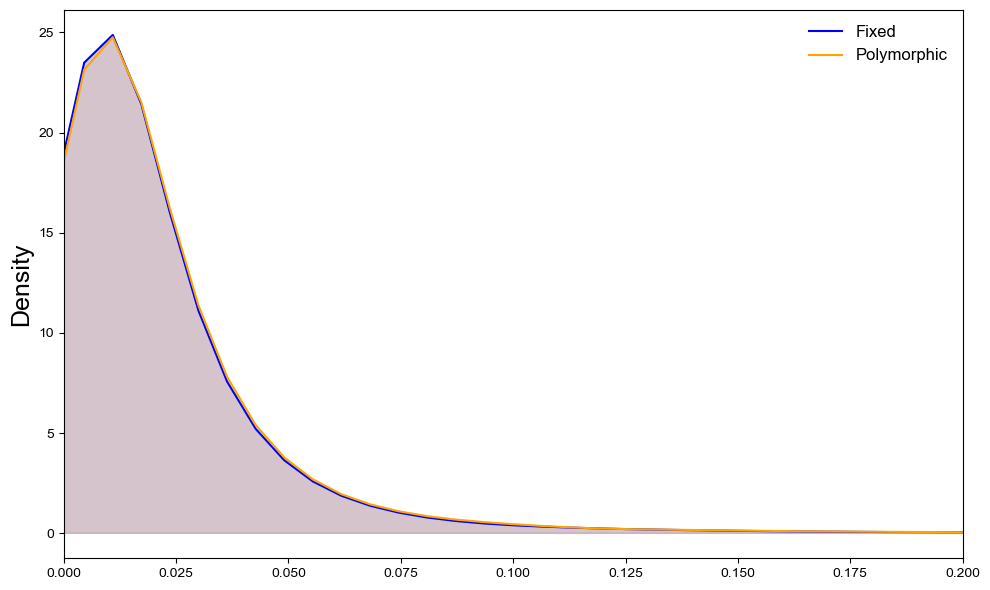

In [201]:
vxs = vx[vx["SpecSup447"] > 250]
vvxs = vvx[vvx["SpecSup447"] > 250]

vvv = prepare_alpha(vx, vvx, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.025, window = [0, 0.2])
print(fisher_exact(alpha[-2]))

SignificanceResult(statistic=1.107330062376895, pvalue=0.012426656760546525)


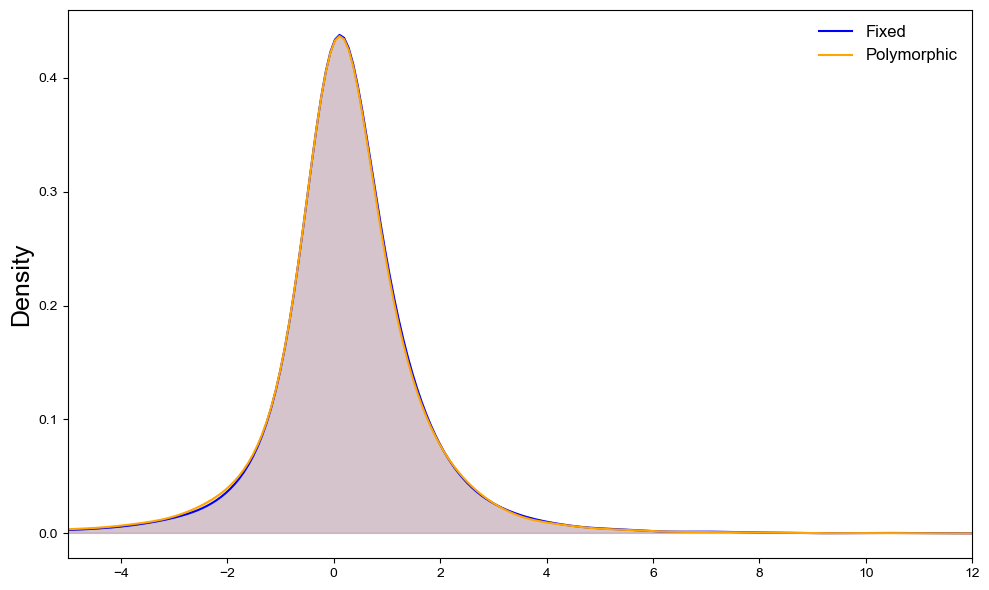

In [44]:
vx_nkl = vx[~vx["Position"].isin(vx_kl["Position"])]
vvx_nkl = vvx[~vvx["Position"].isin(vvx_kl["Position"])]

vx_nkl = vx_nkl[vx_nkl["SpecSup447"] > 250]
vvx_nkl = vvx_nkl[vvx_nkl["SpecSup447"] > 250]

vvv = prepare_alpha(vx_nkl, vvx_nkl, stat = "PhyloP447")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 3, window = [-5, 12])
print(fisher_exact(alpha[-2]))

SignificanceResult(statistic=1.0588091989865522, pvalue=0.7769546276391622)


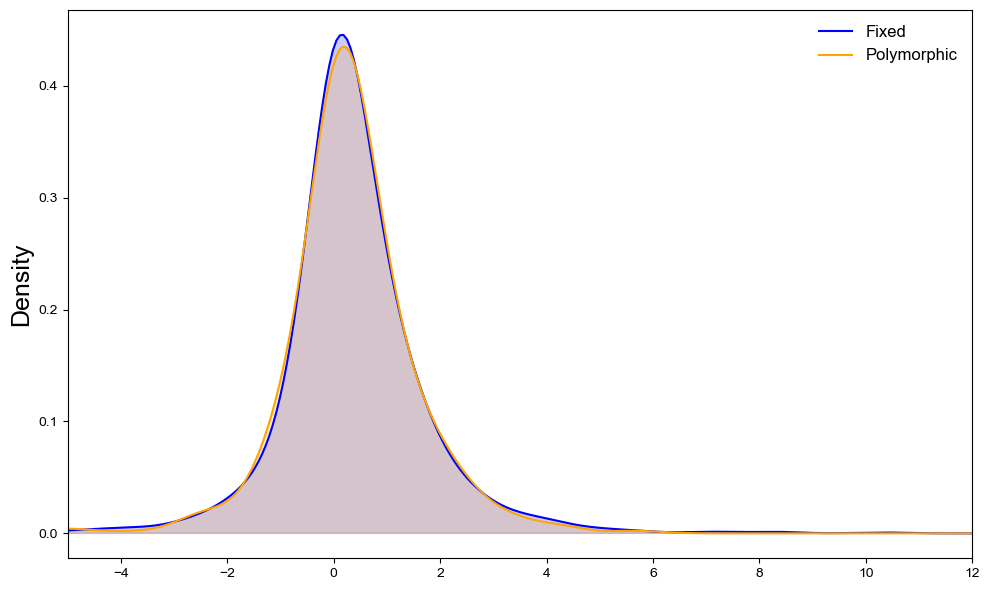

In [46]:
vx_kl = vx_kl[vx_kl["SpecSup447"] > 250]
vvx_kl = vvx_kl[vvx_kl["SpecSup447"] > 250]

vvv = prepare_alpha(vx_kl, vvx_kl, stat = "PhyloP447")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 2, window = [-5, 12])
print(fisher_exact(alpha[-2]))

In [114]:
sperm = pd.read_csv("GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct", sep = "\t").set_index("Description").drop("Name", axis = 1)
sperm["Max not sperm"] = np.max(sperm.drop(["Testis"], axis = 1), axis = 1)
sperm["Max not sperm"] = np.max(sperm.drop(["Testis"], axis = 1), axis = 1)

sperm = sperm[(sperm["Testis"] > 10) & (sperm["Max not sperm"] < 1)]
sperm

Adipose - Subcutaneous  Adipose - Visceral (Omentum)  \
Description                                                         
MMEL1                      0.605582                      0.644392   
ACTRT2                     0.000000                      0.000000   
CCDC27                     0.000000                      0.000000   
ENO1-AS1                   0.991615                      0.641530   
C1orf167                   0.025163                      0.019738   
...                             ...                           ...   
PASD1                      0.000000                      0.000000   
FATE1                      0.332632                      0.203712   
MAGEA4                     0.000000                      0.000000   
U82695.5                   0.009224                      0.019833   
TKTL1                      0.260234                      0.354564   

             Adrenal Gland  Artery - Aorta  Artery - Coronary  \
Description                                                     
MMEL1             0.348529        0.104373           0.194104   
ACTRT2            0.000000        0.000000           0.000000   
CCDC27            0.000000        0.016685           0.000000   
ENO1-AS1          0.496994        0.453434           0.481525   
C1orf167          0.008605        0.022644           0.027103   
...                    ...             ...                ...   
PASD1             0.000000        0.000000           0.000000   
FATE1             0.219797        0.096244           0.099220   
MAGEA4            0.000000        0.000000           0.000000   
U82695.5          0.103330        0.037142           0.025715   
TKTL1             0.070184        0.137661           0.150882   

             Artery - Tibial   Bladder  Brain - Amygdala  \
Description                                                
MMEL1               0.190519  0.411897          0.298335   
ACTRT2              0.000000  0.000000          0.000000   
CCDC27              0.000000  0.038960          0.028675   
ENO1-AS1            0.528443  0.411711          0.332331   
C1orf167            0.021964  0.010329          0.006205   
...                      ...       ...               ...   
PASD1               0.000000  0.000000          0.000000   
FATE1               0.052121  0.132918          0.053032   
MAGEA4              0.000000  0.000000          0.000000   
U82695.5            0.035417  0.021186          0.014831   
TKTL1               0.115412  0.102212          0.112680   

             Brain - Anterior cingulate cortex (BA24)  \
Description                                             
MMEL1                                        0.284534   
ACTRT2                                       0.000000   
CCDC27                                       0.030885   
ENO1-AS1                                     0.318906   
C1orf167                                     0.006353   
...                                               ...   
PASD1                                        0.000000   
FATE1                                        0.659746   
MAGEA4                                       0.000000   
U82695.5                                     0.019669   
TKTL1                                        0.116979   

             Brain - Caudate (basal ganglia)  ...  \
Description                                   ...   
MMEL1                               0.334645  ...   
ACTRT2                              0.000000  ...   
CCDC27                              0.028944  ...   
ENO1-AS1                            0.391123  ...   
C1orf167                            0.007352  ...   
...                                      ...  ...   
PASD1                               0.000000  ...   
FATE1                               0.022820  ...   
MAGEA4                              0.000000  ...   
U82695.5                            0.021192  ...   
TKTL1                               0.236149  ...   

             Skin - Sun Exposed (Lower leg)  Small Intes

SignificanceResult(statistic=1.2949937919760692, pvalue=0.14878544427443735)


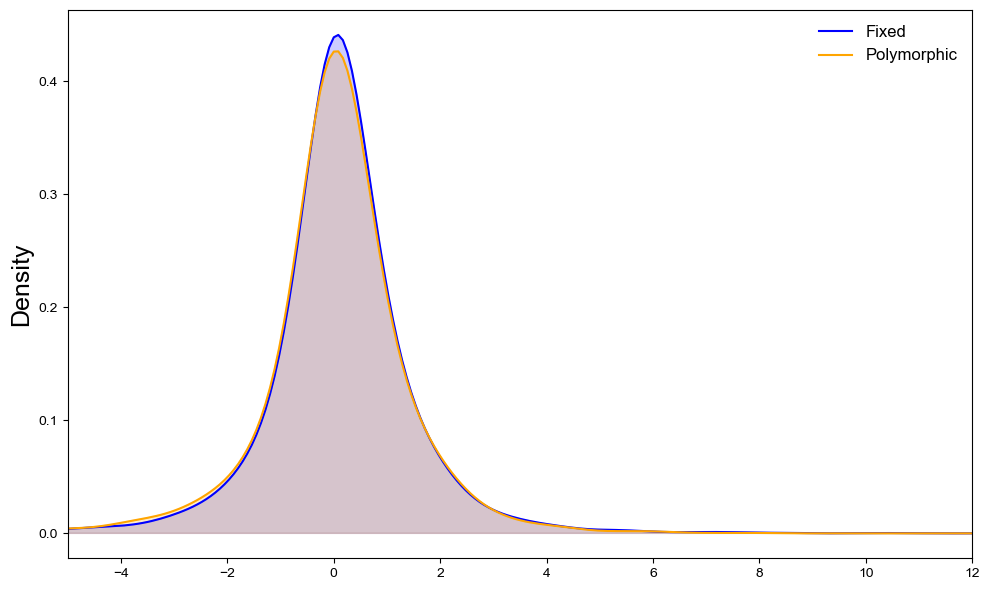

In [115]:
vx_sperm = vx[vx["NearestGene"].isin(sperm.index)]
vvx_sperm = vvx[vvx["NearestGene"].isin(sperm.index)]

vx_sperm = vx_sperm[vx_sperm["SpecSup447"] > 250]
vvx_sperm = vvx_sperm[vvx_sperm["SpecSup447"] > 250]

vvv = prepare_alpha(vx_sperm, vvx_sperm, stat = "PhyloP447")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 3, window = [-5, 12])
print(fisher_exact(alpha[-2]))

SignificanceResult(statistic=1.1107606203200402, pvalue=0.01079702837016902)


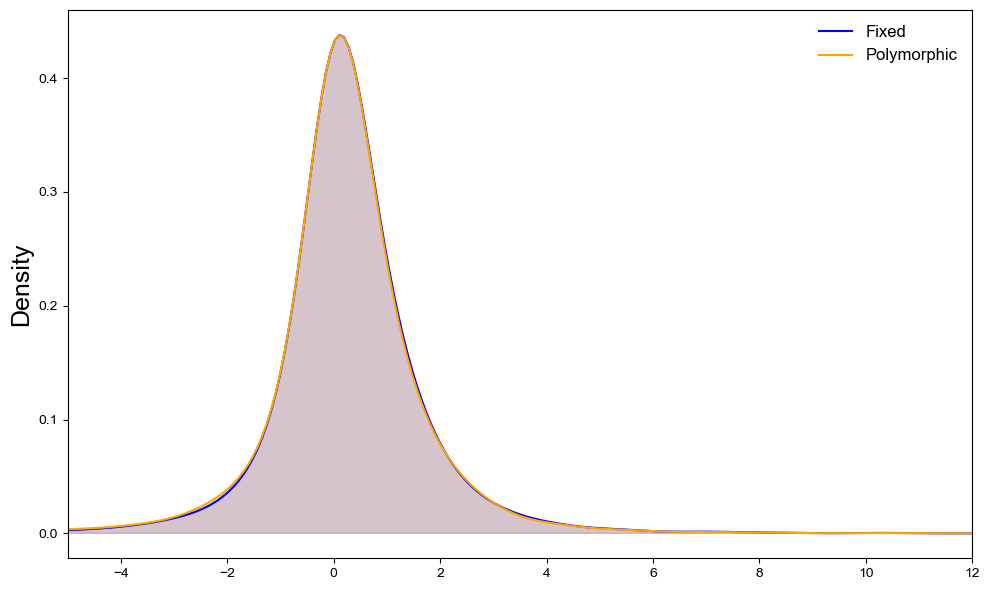

In [116]:
vx_nsperm = vx[~vx["NearestGene"].isin(sperm.index)]
vvx_nsperm = vvx[~vvx["NearestGene"].isin(sperm.index)]

vx_nsperm = vx_nsperm[vx_nsperm["SpecSup447"] > 250]
vvx_nsperm = vvx_nsperm[vvx_nsperm["SpecSup447"] > 250]

vvv = prepare_alpha(vx_nsperm, vvx_nsperm, stat = "PhyloP447")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 3, window = [-5, 12])
print(fisher_exact(alpha[-2]))

In [165]:
hpo = pd.read_csv("../DPSC_CNCC/HPO_AccelEvol_Input.txt", sep= "\t")
d_HPO = {}

for index, row in hpo.iterrows():
    d_HPO[row["Term"]] = row["Genes"].split(";")

gobp = pd.read_csv("../DPSC_CNCC/GOBP_AccelEvol_Input.txt", sep= "\t")
d_BP = {}

for index, row in gobp.iterrows():
    if "ucus" in row["Term"]:
        print(row["Term"])
    d_BP[row["Term"]] = row["Genes"].split(";")
    
kegg = pd.read_csv("../DPSC_CNCC/KEGG_AccelEvol_Input.txt", sep= "\t")
d_KEGG = {}

for index, row in kegg.iterrows():
    if "ucus" in row["Term"]:
        print(row["Term"])
    d_KEGG[row["Term"]] = row["Genes"].split(";")

In [189]:
v

Position     Position.1 NearestGene  NearestDist  PhyloP447  \
0            chr1:15446     chr1:15446       OR4F5        53644     -1.587   
1            chr1:16497     chr1:16497       OR4F5        52593      0.010   
2            chr1:16580     chr1:16580       OR4F5        52510     -1.563   
3            chr1:19051     chr1:19051       OR4F5        50039     -0.060   
4            chr1:39163     chr1:39163       OR4F5        29927     -1.209   
...                 ...            ...         ...          ...        ...   
10326915  chrY:56878783  chrY:56878783        CDY1     31256667      1.497   
10326916  chrY:56878814  chrY:56878814        CDY1     31256698     -0.145   
10326917  chrY:56884539  chrY:56884539        CDY1     31262423      0.535   
10326918  chrY:56884573  chrY:56884573        CDY1     31262457     -1.057   
10326919  chrY:56884587  chrY:56884587        CDY1     31262471     -0.596   

          PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
0                0.000         383  0.023251           529.937130   
1                0.000         398  0.062872           407.741640   
2                0.000         400 -0.002621           400.233000   
3                0.000         411 -0.004246           455.669300   
4                0.000         222  0.005677           314.386300   
...                ...         ...       ...                  ...   
10326915         0.006         182 -0.034461           195.533460   
10326916         0.000         103  0.024594           193.837770   
10326917         0.000         244  0.042078           123.522880   
10326918         0.000         378  0.012127           122.615654   
10326919         0.000         376 -0.021602           122.135760   

          allele2_pred_counts  abs logfc Chrom  
0                  538.546940   0.023251  chr1  
1                  425.903750   0.062872  chr1  
2                  399.506500   0.002621  chr1  
3                  454.330140   0.004246  chr1  
4                  315.625920   0.005677  chr1  
...                       ...        ...   ...  
10326915           190.918150   0.034461  chrY  
10326916           197.170520   0.024594  chrY  
10326917           127.178650   0.042078  chrY  
10326918           123.650665   0.012127  chrY  
10326919           120.320630   0.021602  chrY  

[10030151 rows x 12 columns]

In [198]:
c = 0
out = []
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]

for key in d_HPO.keys():
    if c%1000 == 0:
        print(c)
    if len(d_HPO[key]) >= 15 and len(d_HPO[key]) < 100:
        vk = vx.loc[np.intersect1d(vx.index, d_HPO[key])]
        vvk = vvx.loc[np.intersect1d(vvx.index, d_HPO[key])]
        x2 = [np.float64(x) for x in list(vk["PhyloP447"])]
        yvals2 = [np.float64(j) for j in list(vvk["PhyloP447"])]
        yvals2.sort()
        if len(vk.index) >= 100 and len(vvk.index) >= 50:
            cuttt = 0.9
            vvv = prepare_alpha(vk, vvk, stat = "PhyloP447")
            cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

            alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = False, cutoff = cutoff)
            table = alpha[2]
            out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), fisher_exact(table, alternative = "greater")[1], alpha[0], alpha[1], table])
    c += 1
    
from statsmodels.stats.multitest import fdrcorrection
df = pd.DataFrame(out)
df = df.sort_values(5)
df["FDR"] = fdrcorrection(df[5])[1]
#df.to_csv("Finalizing_FisherExact_Cuttt0.9_Unfold_NewHPO_NonCod_MafCut0.25-0.75_chrX_NonCod_SpecSup250.csv", index = False)

0
1000
2000
3000
4000
5000
6000
7000


In [185]:
c = 0
out = []

vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]

for key in d_HPO.keys():
    if c%1000 == 0:
        print(c)
    if len(d_BP[key]) >= 15 and len(d_HPO[key]) < 100:
        vk = vx.loc[np.intersect1d(vx.index, d_HPO[key])]
        vvk = vvx.loc[np.intersect1d(vvx.index, d_HPO[key])]
        x2 = [np.float64(x) for x in list(vk["PhyloP447"])]
        yvals2 = [np.float64(j) for j in list(vvk["PhyloP447"])]
        yvals2.sort()
        if len(vk.index) >= 100 and len(vvk.index) >= 50:
            cuttt = 0.9
            vvv = prepare_alpha(vk, vvk, stat = "PhyloP447")
            cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

            alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = False, cutoff = cutoff)
            table = alpha[2]
            out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), fisher_exact(table, alternative = "greater")[1], alpha[0], alpha[1], table])
    c += 1
    
from statsmodels.stats.multitest import fdrcorrection
df = pd.DataFrame(out)
df = df.sort_values(5)
df["FDR"] = fdrcorrection(df[5])[1]
#df.to_csv("Finalizing_FisherExact_Cuttt0.9_Unfold_NewHPO_NonCod_MafCut0.25-0.75_chrX_NonCod_SpecSup250.csv", index = False)

0



KeyboardInterrupt



In [187]:
c = 0
out = []
vx = v[v["SpecSup447"] > 250]
vvx = vv[vv["SpecSup447"] > 250]

vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]

for key in d_HPO.keys():
    if c%1000 == 0:
        print(c)
    if len(d_HPO[key]) >= 15 and len(d_HPO[key]) < 100:
        vk = vx.loc[np.intersect1d(vx.index, d_HPO[key])]
        vvk = vvx.loc[np.intersect1d(vvx.index, d_HPO[key])]
        x2 = [np.float64(x) for x in list(vk["PhyloP447"])]
        yvals2 = [np.float64(j) for j in list(vvk["PhyloP447"])]
        yvals2.sort()
        if len(vk.index) >= 100 and len(vvk.index) >= 50:
            cuttt = 0.9
            vvv = prepare_alpha(vk, vvk, stat = "PhyloP447")
            cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

            alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = False, cutoff = cutoff)
            table = alpha[2]
            out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), fisher_exact(table, alternative = "greater")[1], alpha[0], alpha[1], table])
    c += 1
    
from statsmodels.stats.multitest import fdrcorrection
df = pd.DataFrame(out)
df = df.sort_values(5)
df["FDR"] = fdrcorrection(df[5])[1]
df.to_csv("Finalizing_FisherExact_Cuttt0.9_Unfold_NewHPO_NonCod_MafCut0.25-0.75_AllChroms_NonCod_SpecSup250.csv", index = False)

0


KeyboardInterrupt: 

In [188]:
df = pd.DataFrame(out)
df = df.sort_values(5)
df["FDR"] = fdrcorrection(df[5])[1]
df

0       1      2       3     4  \
47               Aplastic/hypoplastic toenail  0.1090   3121  0.0280   487   
63                Abnormality of the hip bone -0.0560  17547 -0.0825  3952   
75                           Sparse eyelashes  0.0120  17506  0.0020  3658   
17                                Hydroureter  0.0200  27125 -0.0020  5616   
30                                  Short toe  0.0020  29781 -0.0030  6330   
..                                        ...     ...    ...     ...   ...   
92                  Distal sensory impairment -0.0225  22758  0.0000  4775   
23                Polycystic kidney dysplasia  0.0020  16040  0.0180  3732   
54  Disproportionate short-limb short stature -0.0550  17341 -0.0430  4335   
16                          Tarsal synostosis  0.0150  13424  0.0310  3185   
11                     Hypoplastic left heart -0.0490  18944 -0.0180  4302   

           5         6      7                             8       FDR  
47  0.004140  0.336629  1.314      [[445, 2676], [48, 439]]  0.409851  
63  0.011074  0.125196  1.165  [[1976, 15571], [395, 3557]]  0.435768  
75  0.013205  0.124794  1.255  [[1969, 15537], [365, 3293]]  0.435768  
17  0.026576  0.088074  1.371  [[2944, 24181], [560, 5056]]  0.657757  
30  0.063282  0.067254  1.263  [[3164, 26617], [631, 5699]]  0.993626  
..       ...       ...    ...                           ...       ...  
92  0.976757 -0.112240  1.382  [[2066, 20692], [477, 4298]]  0.995050  
23  0.978136 -0.131433  1.527  [[1435, 14605], [373, 3359]]  0.995050  
54  0.983054 -0.129570  1.353  [[1553, 15788], [433, 3902]]  0.995050  
16  0.984999 -0.156141  1.528  [[1177, 12247], [318, 2867]]  0.995050  
11  0.999055 -0.195982  1.438  [[1611, 17333], [430, 3872]]  0.999055  

[99 rows x 10 columns]

In [166]:
c = 0
out = []
vx.index = vx["NearestGene"]
vvx.index = vvx["NearestGene"]

for key in d_KEGG.keys():
    if c%1000 == 0:
        print(c)
    if len(d_KEGG[key]) >= 15 and len(d_KEGG[key]) < 10000:
        vk = vx.loc[np.intersect1d(vx.index, d_KEGG[key])]
        vvk = vvx.loc[np.intersect1d(vvx.index, d_KEGG[key])]
        x2 = [np.float64(x) for x in list(vk["abs logfc"])]
        yvals2 = [np.float64(j) for j in list(vvk["abs logfc"])]
        yvals2.sort()
        if len(vk.index) >= 100 and len(vvk.index) >= 50:
            cuttt = 0.5
            vvv = prepare_alpha(vk, vvk, stat = "abs logfc")
            cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

            alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = False, cutoff = cutoff)
            table = alpha[2]
            out.append([key, np.median(x2), len(x2), np.median(yvals2), len(yvals2), fisher_exact(table)[1], alpha[0], alpha[1], table])
    c += 1
    
from statsmodels.stats.multitest import fdrcorrection
df = pd.DataFrame(out)
df = df.sort_values(5)
df["FDR"] = fdrcorrection(df[5])[1]
df.to_csv("Finalizing_FisherExact_Cuttt0.5_Unfold_NewKEGG_NonCod_MafCut0.25-0.75_chr19_NonCod_SpecSup0_Microglia_AbsLogfc.csv", index = False)

0


In [180]:
x

Counter({'FSTL3': 62,
         'SBNO2': 99,
         'MBD3': 26,
         'TCF3': 125,
         'ONECUT3': 161,
         'KLF16': 108,
         'ZNF57': 188,
         'TLE2': 277,
         'NFIC': 718,
         'DAPK3': 108,
         'PIAS4': 32,
         'ZBTB7A': 93,
         'MAP2K2': 251,
         'CREB3L3': 7,
         'SAFB2': 296,
         'SAFB': 112,
         'RFX2': 352,
         'MLLT1': 532,
         'INSR': 670,
         'ZNF358': 30,
         'MAP2K7': 63,
         'OR7D2': 146,
         'ZNF562': 120,
         'ZGLP1': 34,
         'ILF3': 120,
         'DNM2': 235,
         'CARM1': 138,
         'SMARCA4': 253,
         'ZNF653': 84,
         'ZNF627': 198,
         'ZNF823': 363,
         'ZNF441': 137,
         'ZNF700': 234,
         'ZNF433': 249,
         'ZNF878': 61,
         'ZNF844': 180,
         'ZNF625': 36,
         'ZNF44': 348,
         'ZNF563': 99,
         'ZNF442': 150,
         'ZNF799': 166,
         'ZNF443': 289,
         'ZNF709': 231,
         

In [179]:
Counter(vx_gene["NearestGene"])

Counter({'PIAS4': 26,
         'TYK2': 86,
         'EPOR': 61,
         'IL27RA': 46,
         'IL12RB1': 157,
         'PIK3R2': 143,
         'IFNL3': 42,
         'IFNL2': 102,
         'IFNL1': 70,
         'AKT2': 176,
         'IL11': 19})

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.4909935867645693, 0.015732186, [[371, 557], [143, 145]], [[371, 557], [144, 144]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.6753838620984043, pvalue=0.004120949274446393)


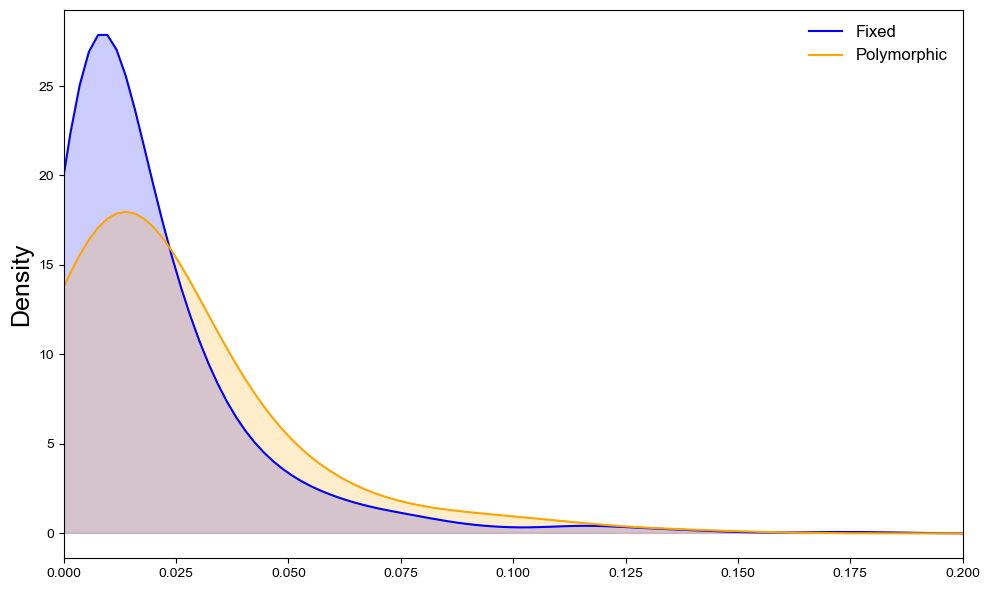

In [178]:
vx_gene = vx[vx["NearestGene"].isin(d_KEGG["JAK-STAT signaling pathway"])]
vvx_gene = vvx[vvx["NearestGene"].isin(d_KEGG["JAK-STAT signaling pathway"])]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

In [234]:
ad = pd.read_csv("OT-MONDO_0004975-associated-targets-3_18_2025-v24_09.tsv", sep = "\t")
ad = ad[ad["otGeneticsPortal"] != "No data"]
ad = ad[ad["otGeneticsPortal"].astype(float) > 0.5]


In [282]:
x = Counter(list(vx["NearestGene"]) + list(vvx["NearestGene"]))
znf_all = []
cea = []
klk = []
nlrp = []
psg = []
for key in x.keys():
    if key.startswith("ZNF"):
        znf_all.append(key)
    elif key.startswith("CEACAM"):
        cea.append(key)
    elif key.startswith("KLK"):
        klk.append(key)
    elif key.startswith("NLRP"):
        nlrp.append(key)
    elif key.startswith("PSG"):
        psg.append(key)

In [268]:
len(znf)

235

In [292]:
inn_im = pd.read_csv("../PosSelect_Finalizing/innatedb_curated_genes.csv")
inn_im["Gene Symbol"] = inn_im["Gene Symbol"].str.upper()
inn_im = list(np.unique(inn_im["Gene Symbol"]))
inn_im

['1700021K19RIK',
 '4432412L15RIK',
 'AAMP',
 'ABCA1',
 'ABCG1',
 'ABL1',
 'ACAP1',
 'ACE',
 'ACE2',
 'ACHE',
 'ACO1',
 'ADAM10',
 'ADAM17',
 'ADAR',
 'ADCY8',
 'ADIPOQ',
 'ADRB2',
 'ADRBK1',
 'AGER',
 'AHR',
 'AHSG',
 'AI607873',
 'AICDA',
 'AIM2',
 'AIMP1',
 'AIP',
 'AIRE',
 'AKAP10',
 'AKNA',
 'AKT1',
 'AMACR;C1QTNF3',
 'AMFR',
 'ANGPT1',
 'ANKRD17',
 'ANO6',
 'ANPEP',
 'ANXA1',
 'ANXA2',
 'ANXA4',
 'AP3B1',
 'APCS',
 'APOA1',
 'APOBEC3A',
 'APOBEC3B',
 'APOBEC3G',
 'APOBEC3G;APOBEC3F',
 'APOH',
 'AQP3',
 'AREG',
 'ARF6',
 'ARG1',
 'ARHGAP15',
 'ARL5B',
 'ARRB2',
 'ASCC3',
 'ATF2',
 'ATF3',
 'ATF4',
 'ATF7',
 'ATG12',
 'ATG16L1',
 'ATG5',
 'ATG7',
 'ATG9A',
 'ATM',
 'AVP',
 'AXL',
 'AZI2',
 'BAIAP2L1',
 'BC094916',
 'BCAR1',
 'BCL10',
 'BCL11B',
 'BCL2',
 'BCL2A1',
 'BCL2L1',
 'BCL3',
 'BDKRB2',
 'BECN1',
 'BGN',
 'BID',
 'BIRC2',
 'BIRC3',
 'BIRC5',
 'BMX',
 'BNIP3',
 'BNIP3L',
 'BST2',
 'BTK',
 'BTN3A1',
 'BTN3A2',
 'BTN3A3',
 'C19ORF29',
 'C1QA',
 'C1QB',
 'C1QBP',
 'C1QC',
 'C1R

In [301]:
vvx_gene

Unnamed: 0        Position  MAFMaxAcrossAncestry  \
chr19:42120510-G-T  chr19:42120510  chr19:42120510              0.367304   

                   NearestGene  NearestDist  PhyloP447  PhastCons447  \
chr19:42120510-G-T      POU2F2        11950     -5.042           0.0   

                    SpecSup447     logfc  allele1_pred_counts  \
chr19:42120510-G-T         189  0.032491            141.96432   

                    allele2_pred_counts  abs logfc Human ref Human alt  \
chr19:42120510-G-T            145.19774   0.032491         G         T   

                   Chimp ref Gorilla ref  UnfoldedMAF  fixed logfc  Chrom  \
chr19:42120510-G-T         G           G     0.367304    -0.032491  chr19   

                    FixedOrPoly  
chr19:42120510-G-T  Polymorphic

In [312]:
Counter(vx_gene["NearestGene"])

Counter({'TYK2': 86,
         'IFNL3': 42,
         'IFNL4': 51,
         'IFNL2': 102,
         'IFNL1': 70,
         'BAX': 57})

In [194]:
len(znf)

75

In [192]:
len(znf_all)

208

In [203]:
znf_all = []
for key in d_BP["Regulation Of DNA-templated Transcription (GO:0006355)"]:
    if "ZNF" in key:
        znf_all.append(key)


In [204]:
znf_all

['ZNF18',
 'ZNF12',
 'ZNF14',
 'ZNF497',
 'ZNF496',
 'ZNF492',
 'ZNF22',
 'ZNF24',
 'ZNF488',
 'ZNF486',
 'ZNF485',
 'ZNF35',
 'ZNF479',
 'ZNF44',
 'ZNF460',
 'ZNF57',
 'ZNF66',
 'ZNF449',
 'ZNF446',
 'ZNF444',
 'ZNF443',
 'ZNF442',
 'ZNF441',
 'ZNF438',
 'ZNF433',
 'ZNF431',
 'ZNF430',
 'ZNF425',
 'ZNF423',
 'ZNF410',
 'ZNF408',
 'ZNF883',
 'ZNF878',
 'ZNF865',
 'ZNF853',
 'ZNF844',
 'ZNF76',
 'ZNF71',
 'ZNF83',
 'ZNF85',
 'ZNF98',
 'ZNF90',
 'ZNF92',
 'ZNF75CP',
 'ZNF398',
 'ZNF397',
 'ZNF396',
 'ZNF395',
 'ZNF394',
 'ZNF383',
 'ZNF382',
 'ZNF37A',
 'ZNF280A',
 'ZNF280B',
 'ZNF280C',
 'ZNF280D',
 'ZNF367',
 'ZNF362',
 'ZNF358',
 'ZNF350',
 'ZNF345',
 'ZNF341',
 'ZNF33A',
 'ZNF331',
 'ZNF326',
 'ZNF322',
 'ZNF318',
 'ZNF316',
 'ZNF799',
 'ZNF791',
 'ZNF787',
 'ZNF784',
 'ZNF777',
 'ZNF771',
 'ZNF763',
 'ZNF75D',
 'ZNF746',
 'ZNF740',
 'ZNF737',
 'ZNF736',
 'ZNF735',
 'ZNF732',
 'ZNF730',
 'ZNF727',
 'ZNF724',
 'ZNF723',
 'ZNF722',
 'ZNF835',
 'ZNF829',
 'ZNF827',
 'ZNF823',
 'ZNF821',

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.21120842514229787, 0.015095972, [[6174, 7478], [2139, 2140]], [[6174, 7478], [2140, 2139]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.8260078089745816, pvalue=5.12958996639195e-08)


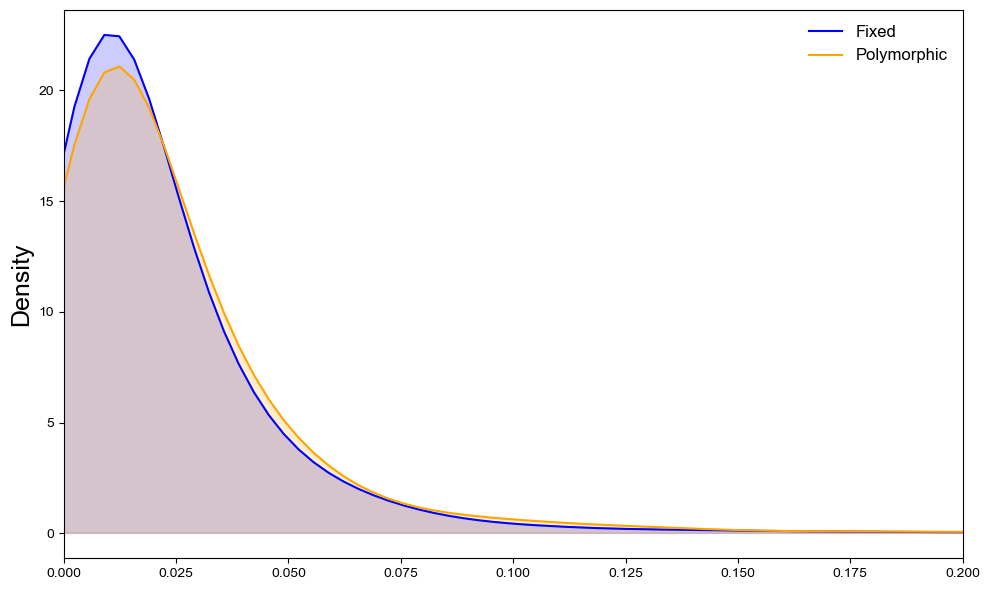

In [206]:
vx_gene = v[v["NearestGene"].isin(znf)]
vvx_gene = vv[vv["NearestGene"].isin(znf)]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.02254943110819385, 0.03124788, [[10342, 42295], [2723, 10893]], [[10342, 42295], [2724, 10892]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.9781723139116475, pvalue=0.35851182846840646)


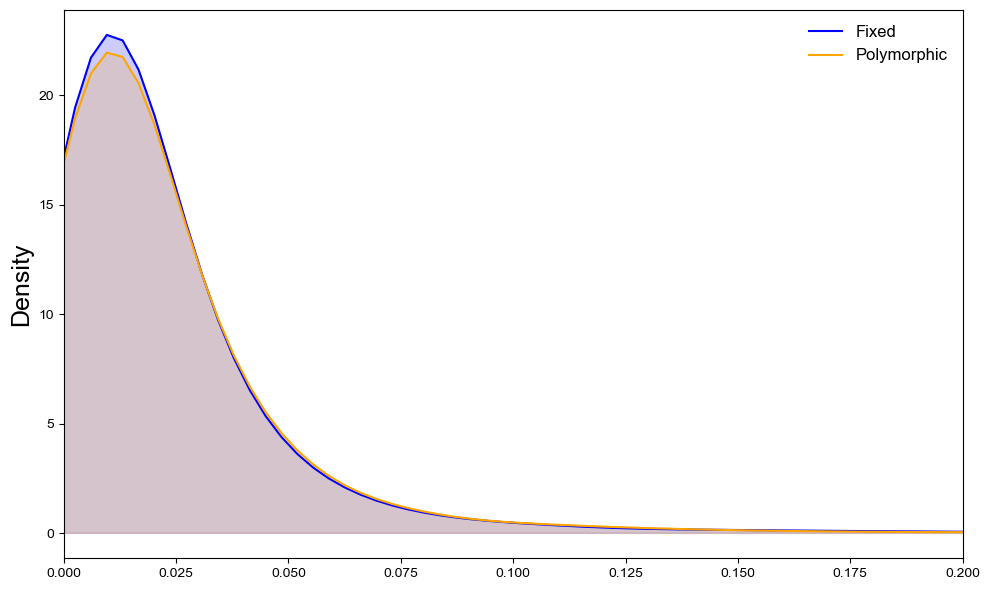

In [208]:
vx_gene = v[v["NearestGene"].isin(np.setdiff1d(znf_all, znf))]
vvx_gene = vv[vv["NearestGene"].isin(np.setdiff1d(znf_all, znf))]
cuttt = 0.8
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.029545043476122967, 0.013498148, [[32662, 33627], [8947, 8948]], [[32662, 33627], [8948, 8947]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.9714113839814057, pvalue=0.08568147039502641)


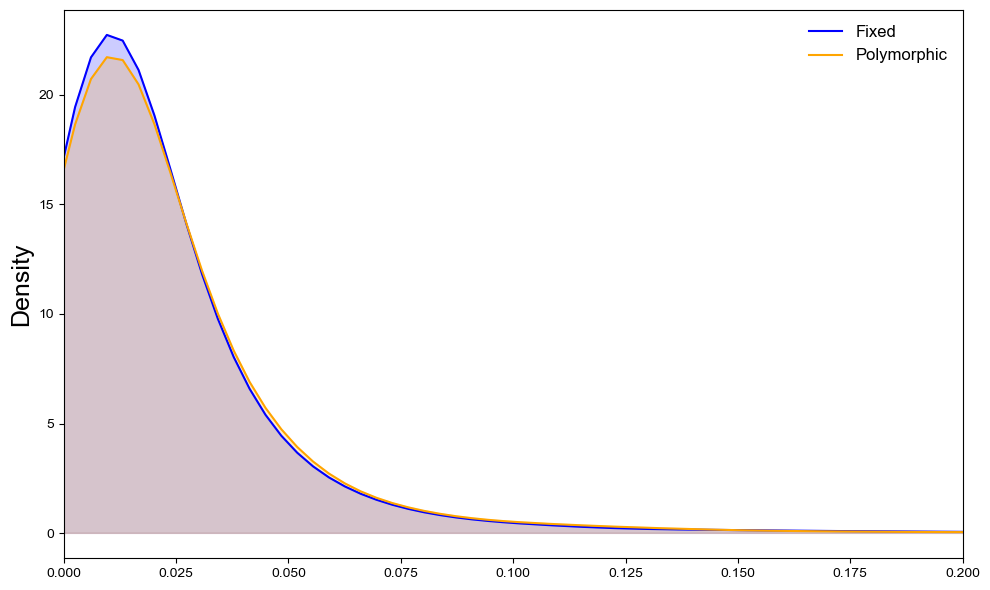

In [205]:
vx_gene = v[v["NearestGene"].isin(znf_all)]
vvx_gene = vv[vv["NearestGene"].isin(znf_all)]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

In [131]:
x = pd.read_csv("PerGene_Unfold_Permute/KosoyRoussosControlMicroglia/Finalizing_PerGene_FilterNewTEs_FisherExact_NonCod_DlKosoyRoussosControlMicroglia_abs_logfc_All_MAFCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv.gz")
x_chr19 = x[x["Gene"].isin(pd.read_csv("chr19_genes.txt", sep = "\t", header = None)[0])]
x_chr19 = x_chr19.sort_values("alpha")
x_chr19 = x_chr19[x_chr19["Proportion"] == 0.5]
x_chr19.to_csv("BLEH.csv")

In [120]:
Counter(vx_gene["NearestGene"])

Counter({'IGLON5': 198})

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.06670043821408689, 0.012103445, [[40007, 42679], [12138, 12140]], [[40007, 42679], [12139, 12139]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.9375475532473889, pvalue=1.0314256277082902e-05)


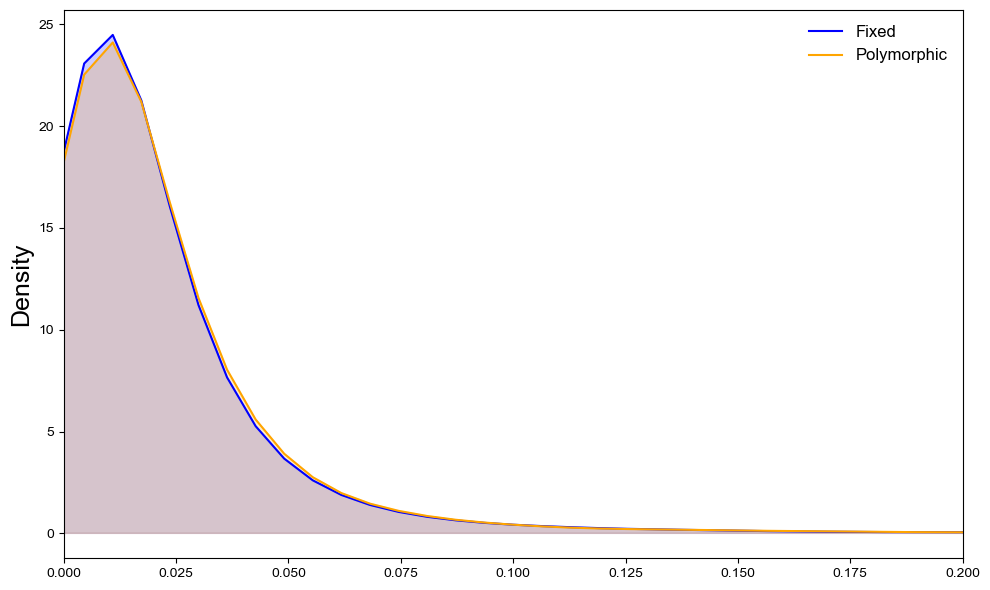

In [128]:
vx_gene = vx[vx["NearestGene"].isin(x_chr19["Gene"])]
vvx_gene = vvx[vvx["NearestGene"].isin(x_chr19["Gene"])]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

(0.0031101931637966262, 0.011643068, [[35046, 34937], [10125, 10126]], [[35046, 34937], [10126, 10125]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.0032189751075746, pvalue=0.841888190942754)


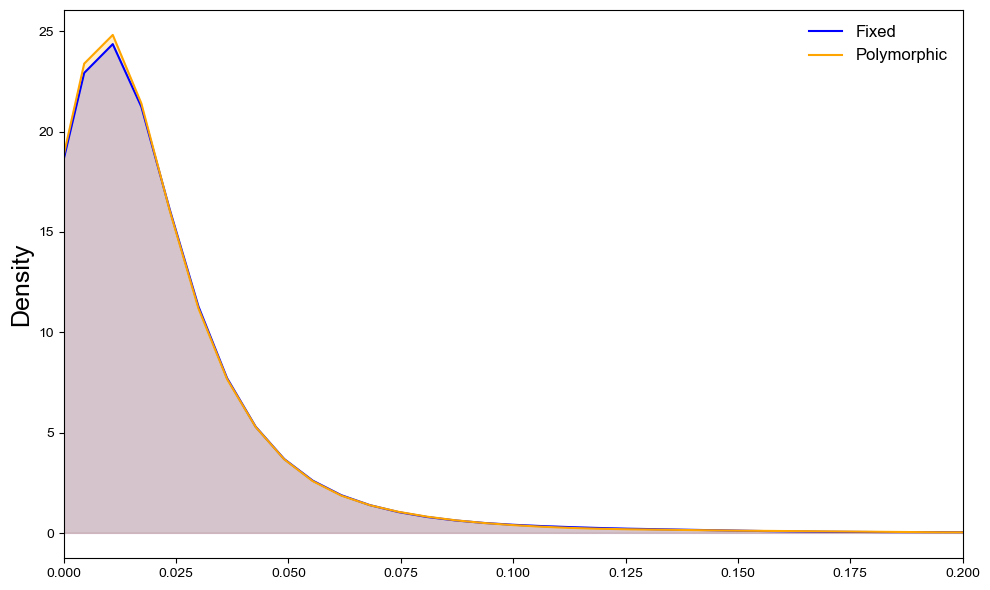

In [130]:
vx_gene = vx_gene[~vx_gene["NearestGene"].isin(x_chr19.head(50)["Gene"])]
vvx_gene = vvx_gene[~vvx_gene["NearestGene"].isin(x_chr19.head(50)["Gene"])]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

(-0.7061232967763375, 0.017164035, [[119, 203], [59, 60]], [[119, 203], [60, 59]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.5961426066627703, pvalue=0.02144850361804323)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

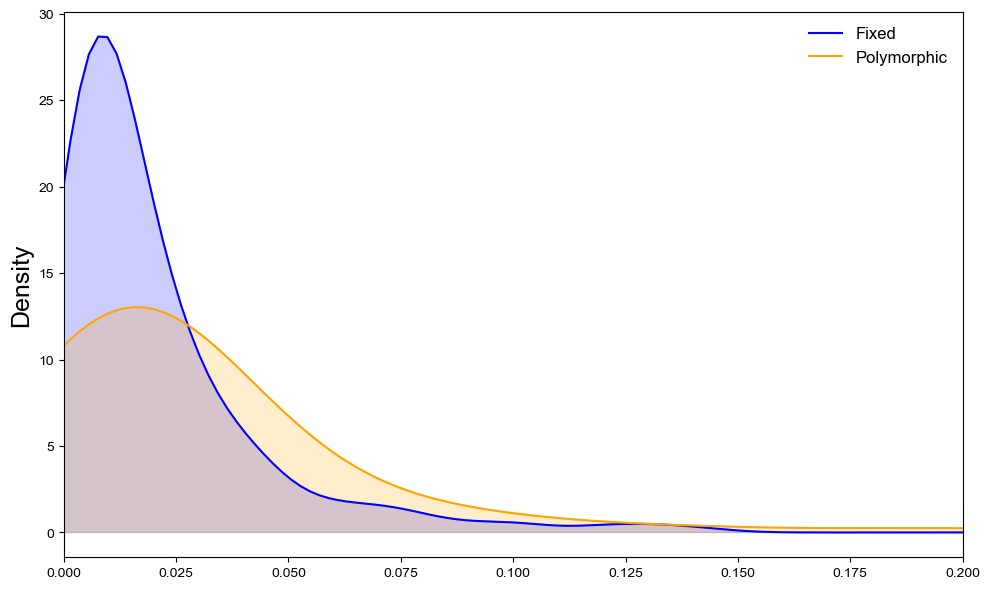

In [314]:
vx_gene = vx[vx["NearestGene"].isin(np.setdiff1d(d_BP["Cellular Response To Virus (GO:0098586)"], ["POU2F2", "IRF3", "TYK2"]))]
vvx_gene = vvx[vvx["NearestGene"].isin(np.setdiff1d(d_BP["Cellular Response To Virus (GO:0098586)"], ["POU2F2", "IRF3", "TYK2"]))]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.1664624467958049, 0.013209351, [[14626, 17065], [3948, 3950]], [[14626, 17065], [3949, 3949]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.8575100686302537, pvalue=1.060184647501186e-09)


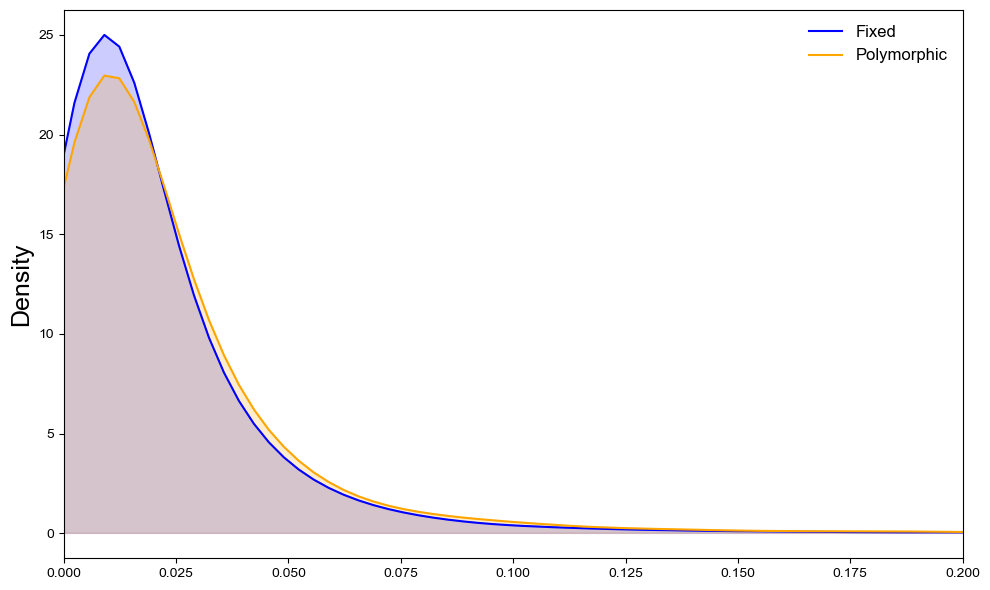

In [133]:
vx_gene = vx[vx["NearestGene"].isin(d_BP['Regulation Of DNA-templated Transcription (GO:0006355)'])]
vvx_gene = vvx[vvx["NearestGene"].isin(d_BP['Regulation Of DNA-templated Transcription (GO:0006355)'])]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

x = Counter(list(vx_gene["NearestGene"]) + list(vvx_gene["NearestGene"]))
znf = []
nznf = []
for key in x.keys():
    if "ZNF" in key:
        znf.append(key)
    else:
        nznf.append(key)

In [134]:
Counter(vx_gene["NearestGene"])

Counter({'FSTL3': 47,
         'SBNO2': 83,
         'MBD3': 25,
         'TCF3': 103,
         'ONECUT3': 130,
         'KLF16': 87,
         'ZNF57': 171,
         'TLE2': 220,
         'NFIC': 598,
         'DAPK3': 103,
         'PIAS4': 26,
         'ZBTB7A': 88,
         'MAP2K2': 212,
         'CREB3L3': 4,
         'SAFB2': 282,
         'SAFB': 111,
         'RFX2': 301,
         'MLLT1': 471,
         'INSR': 489,
         'ZNF358': 25,
         'MAP2K7': 44,
         'OR7D2': 102,
         'ZNF562': 109,
         'ZGLP1': 29,
         'ILF3': 107,
         'DNM2': 187,
         'CARM1': 107,
         'SMARCA4': 220,
         'ZNF653': 66,
         'ZNF627': 153,
         'ZNF823': 298,
         'ZNF441': 70,
         'ZNF700': 190,
         'ZNF433': 228,
         'ZNF878': 52,
         'ZNF844': 160,
         'ZNF625': 29,
         'ZNF44': 257,
         'ZNF563': 76,
         'ZNF442': 127,
         'ZNF799': 98,
         'ZNF443': 160,
         'ZNF709': 208,
         'ZN

In [137]:
vx_gene[vx_gene["SpecSup447"] > 250]

Position      Position.1 NearestGene  NearestDist  PhyloP447  \
4043800   chr19:2901136   chr19:2901136       ZNF57            0     -3.630   
4043805   chr19:2902314   chr19:2902314       ZNF57         1363     -0.190   
4043833   chr19:2906709   chr19:2906709       ZNF57         5758      0.163   
4043876   chr19:2915353   chr19:2915353       ZNF57        14402      0.931   
4043878   chr19:2915992   chr19:2915992       ZNF57        15041      0.567   
...                 ...             ...         ...          ...        ...   
4203654  chr19:58478833  chr19:58478833      ZNF446         2578     -0.943   
4203656  chr19:58479024  chr19:58479024      ZNF446         2769     -1.036   
4203657  chr19:58479185  chr19:58479185      ZNF446         2930     -0.108   
4203658  chr19:58479483  chr19:58479483      ZNF446         3228     -0.088   
4203659  chr19:58481478  chr19:58481478      ZNF446         5223      0.300   

         PhastCons447  SpecSup447     logfc  allele1_pred_counts  \
4043800         0.000         330 -0.114041           1666.81620   
4043805         0.000         341 -0.005479            342.23822   
4043833         0.000         312 -0.000142            375.48160   
4043876         0.000         345  0.004471            286.72845   
4043878         0.041         366  0.001185            135.65472   
...               ...         ...       ...                  ...   
4203654         0.000         394 -0.006384            297.46545   
4203656         0.000         419 -0.003167            335.52480   
4203657         0.000         285  0.003775            373.53558   
4203658         0.000         261 -0.006087            423.40344   
4203659         0.000         394  0.003932            328.83655   

         allele2_pred_counts  abs logfc  Chrom FixedOrPoly  \
4043800           1540.13230   0.114041  chr19       Fixed   
4043805            340.94098   0.005479  chr19       Fixed   
4043833            375.44467   0.000142  chr19       Fixed   
4043876            287.61850   0.004471  chr19       Fixed   
4043878            135.76619   0.001185  chr19       Fixed   
...                      ...        ...    ...         ...   
4203654            296.15198   0.006384  chr19       Fixed   
4203656            334.78900   0.003167  chr19       Fixed   
4203657            374.51422   0.003775  chr19       Fixed   
4203658            421.62067   0.006087  chr19       Fixed   
4203659            329.73395   0.003932  chr19       Fixed   

        MAFMaxAcrossAncestry UnfoldedMAF  
4043800                    .           .  
4043805                    .           .  
4043833                    .           .  
4043876                    .           .  
4043878                    .           .  
...                      ...         ...  
4203654                    .           .  
4203656                    .           .  
4203657                    .           .  
4203658                    .           .  
4203659                    .           .  

[3391 rows x 15 columns]

In [ ]:
c = Counter(vx_gene["NearestGene"])
cc = Counter(vvx_gene["NearestGene"])

k = []
for key in cc.keys():
    if cc[key] >= 20:
        k.append(key)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.21120842514229787, 0.015095972, [[6174, 7478], [2139, 2140]], [[6174, 7478], [2140, 2139]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.8260078089745816, pvalue=5.12958996639195e-08)


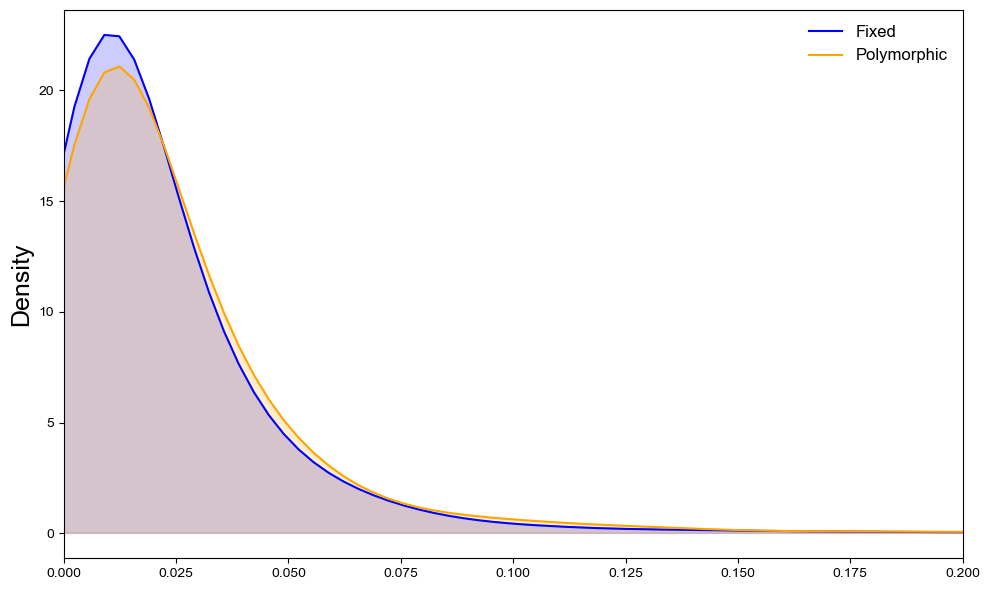

In [160]:
vx_gene = vx[vx["NearestGene"].isin(znf)]
vvx_gene = vvx[vvx["NearestGene"].isin(znf)]
#vx_gene = vx_gene[vx_gene["SpecSup447"] > 250]
#vvx_gene = vvx_gene[vvx_gene["SpecSup447"] > 250]

cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))


In [155]:
#Using cutoff of -0.05, 0.05, we see a clear bias toward polymorphisms being relatively more downregulating
print(fisher_exact([[629, 446], [207, 209]]))
#For cutoff of -0.1, 0.1 we don't see this though
print(fisher_exact([[130, 131], [61, 54]]))


SignificanceResult(statistic=1.423940122614328, pvalue=0.002479325892151648)
SignificanceResult(statistic=0.8784882993367539, pvalue=0.5774742009166105)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.3599397650742676, 0.022101423, [[339, 461], [108, 109]], [[339, 461], [109, 108]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.7421667871776332, pvalue=0.05416067399921515)


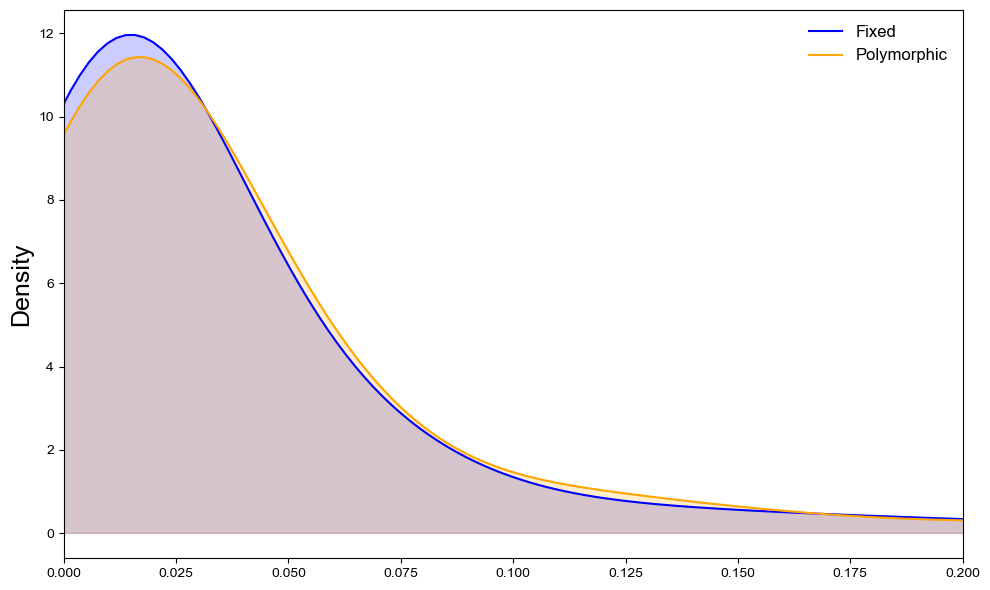

In [164]:
vx_gene2 = vx_gene[(vx_gene["allele1_pred_counts"] > 500) | (vx_gene["allele2_pred_counts"] > 500)]
vvx_gene2 = vvx_gene[(vvx_gene["allele1_pred_counts"] > 500) | (vvx_gene["allele2_pred_counts"] > 500)]

cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene2["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene2, vvx_gene2, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))


In [154]:
vx_gene[vx_gene["logfc"] > 0.1].shape

(130, 15)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.24723685546486773, 0.015341561, [[5269, 6575], [1985, 1987]], [[5269, 6575], [1986, 1986]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.8021762457978565, pvalue=1.9779994656542337e-09)


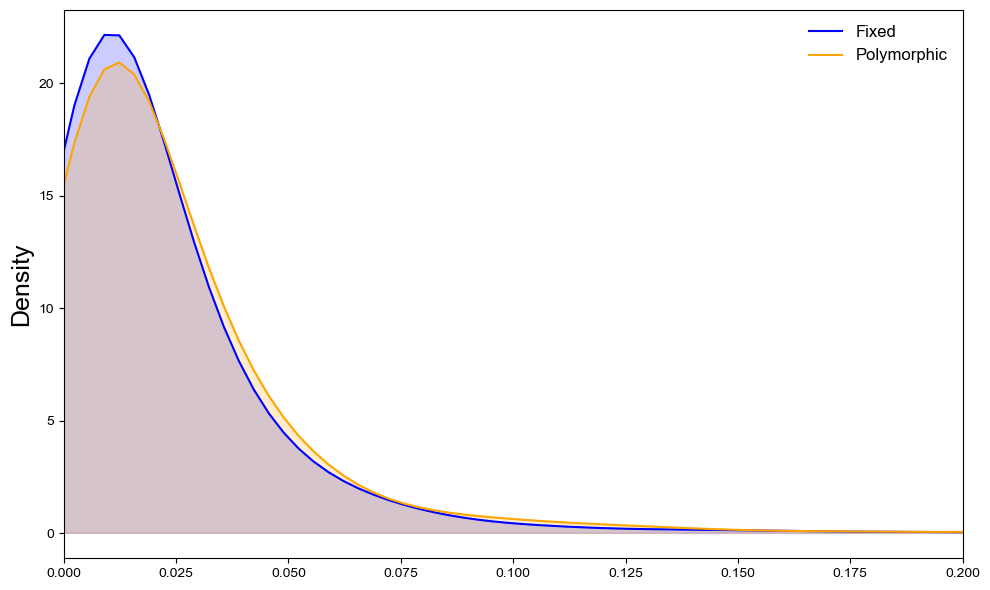

In [162]:
c = Counter(vx_gene["NearestGene"])
cc = Counter(vvx_gene["NearestGene"])

k = []
for key in np.intersect1d(list(cc.keys()), list(c.keys())):
    if cc[key] >= 20 and c[key] >= 20:
        k.append(key)
        
vx_gene = vx[vx["NearestGene"].isin(k)]
vvx_gene = vvx[vvx["NearestGene"].isin(k)]
#vx_gene = vx_gene[vx_gene["SpecSup447"] > 250]
#vvx_gene = vvx_gene[vvx_gene["SpecSup447"] > 250]

cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))


In [280]:
vx.sort_values("allele1_pred_counts").head(50)

Position      Position.1 NearestGene  NearestDist  PhyloP447  \
4119959  chr19:31188982  chr19:31188982       TSHZ3       160358      0.269   
4118727  chr19:30939762  chr19:30939762       TSHZ3       409578      0.330   
4118728  chr19:30939811  chr19:30939811       TSHZ3       409528      0.356   
4098668  chr19:21115570  chr19:21115570      ZNF431        26482     -0.029   
4121988  chr19:31649111  chr19:31649111       THEG5        60865     -0.083   
4118726  chr19:30939352  chr19:30939352       TSHZ3       409988     -2.483   
4142667  chr19:37479344  chr19:37479344      ZNF570        10902     -1.820   
4142666  chr19:37479342  chr19:37479342      ZNF570        10900     -0.133   
4118729  chr19:30939911  chr19:30939911       TSHZ3       409428      0.717   
4119958  chr19:31188693  chr19:31188693       TSHZ3       160646     -0.722   
4119957  chr19:31188652  chr19:31188652       TSHZ3       160688     -1.011   
4118730  chr19:30939960  chr19:30939960       TSHZ3       409380     -0.681   
4083417  chr19:15738802  chr19:15738802      OR10H3         2590     -5.074   
4099297  chr19:21306637  chr19:21306637      ZNF708        22752      0.240   
4142665  chr19:37478979  chr19:37478979      ZNF570        10536     -4.563   
4099298  chr19:21306694  chr19:21306694      ZNF708        22695      0.395   
4112194  chr19:29345703  chr19:29345703     UQCRFS1       132559      0.089   
4118950  chr19:30984104  chr19:30984104       TSHZ3       365236      0.496   
4119956  chr19:31188566  chr19:31188566       TSHZ3       160774     -0.079   
4142664  chr19:37478929  chr19:37478929      ZNF570        10486     -0.135   
4118731  chr19:30940003  chr19:30940003       TSHZ3       409336      1.911   
4105326  chr19:24124226  chr19:24124226      ZNF254        37034     -1.901   
4103123  chr19:23338022  chr19:23338022       ZNF91        57432     -0.918   
4127763  chr19:33120400  chr19:33120400       WDR88        11724     -5.763   
4132932  chr19:34525071  chr19:34525071        WTIP        43313      0.182   
4099296  chr19:21306547  chr19:21306547      ZNF708        22842      0.240   
4118781  chr19:30950621  chr19:30950621       TSHZ3       398718      0.477   
4118782  chr19:30950640  chr19:30950640       TSHZ3       398700     -0.033   
4121031  chr19:31455472  chr19:31455472       TSHZ3       106132     -1.350   
4103122  chr19:23337999  chr19:23337999       ZNF91        57455      0.000   
4119955  chr19:31188497  chr19:31188497       TSHZ3       160842      1.597   
4083416  chr19:15738673  chr19:15738673      OR10H3         2719     -1.043   
4123786  chr19:31999504  chr19:31999504      ZNF507       346115     -0.536   
4123785  chr19:31999233  chr19:31999233      ZNF507       346386     -5.109   
4121030  chr19:31455338  chr19:31455338       TSHZ3       105998     -1.285   
4109107  chr19:28697210  chr19:28697210     UQCRFS1       515934     -0.105   
4123438  chr19:31932045  chr19:31932045       THEG5       343799     -0.151   
4118280  chr19:30838708  chr19:30838708      ZNF536       466310      0.183   
4162669  chr19:43891131  chr19:43891131      ZNF404        11043     -0.282   
4083418  chr19:15739226  chr19:15739226      OR10H3         2166     -1.797   
4132931  chr19:34525014  chr19:34525014        WTIP        43256     -2.199   
4162668  chr19:43891022  chr19:43891022      ZNF404        10934     -0.426   
4104508  chr19:23844593  chr19:23844593      ZNF726        70308     -0.846   
4123784  chr19:31999125  chr19:31999125      ZNF507       346494      0.032   
4118279  chr19:30838653  chr19:30838653      ZNF536       466255     -4.175   
4118281  chr19:30838753  chr19:30838753      ZNF536       466355      0.143   
4118923  chr19:30975059  chr19:30975059       TSHZ3       374280     -0.348   
4123437  chr19:31932004  chr19:31932004       THEG5       343758      0.523   
4105325  chr19:24123982  chr19:24123982      ZNF254        36790      0.430   
4103455  chr19:23478177  chr19:23478177       ZNF91        82723 

(0.16803343278086147, 0.009706138, [[1095, 911], [366, 367]], [[1095, 911], [367, 366]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.205259937737309, pvalue=0.03400277588994685)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

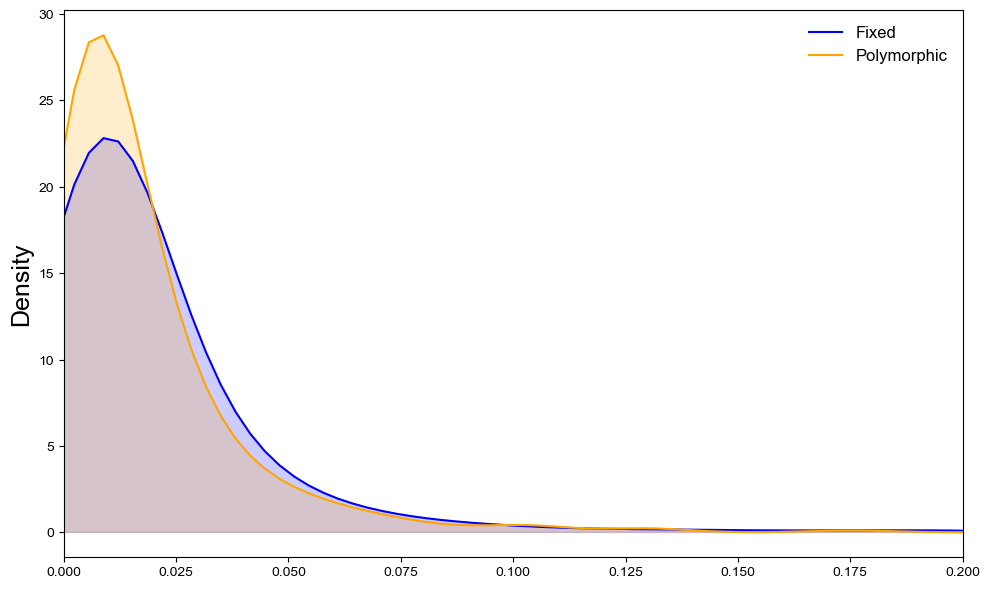

In [273]:
vx_gene = v[v["NearestGene"].isin(psg)]
vvx_gene = vv[vv["NearestGene"].isin(psg)]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.058584667323019035, 0.011819629, [[70872, 75028], [18814, 18816]], [[70872, 75028], [18815, 18815]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.9447077619564603, pvalue=8.838467143952287e-07)


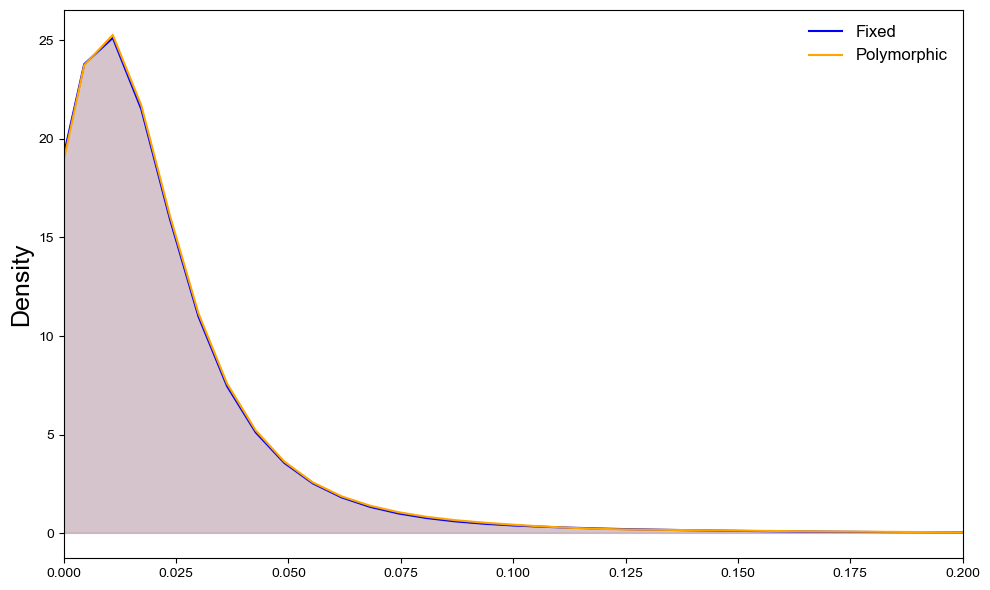

In [219]:
vx_gene = vx[~vx["NearestGene"].isin(znf)]
vvx_gene = vvx[~vvx["NearestGene"].isin(znf)]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.07713113458210574, 0.015095972, [[64239, 95313], [17627, 24282]], [[64239, 95313], [17628, 24281]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.9284375196937903, pvalue=2.7197028058795808e-11)


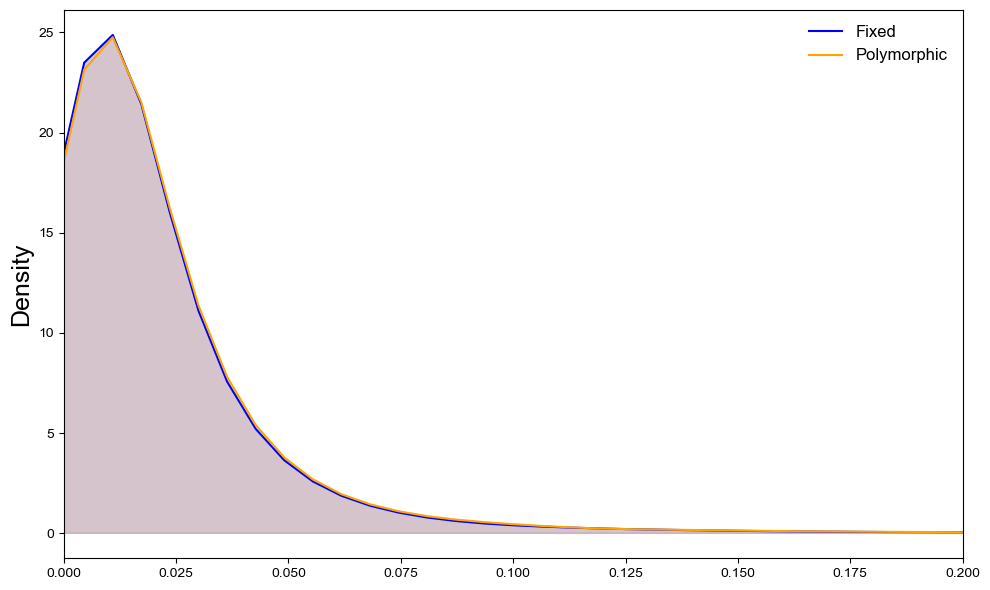

In [218]:
vx_gene = vx[vx["NearestGene"].isin(znf)]
vvx_gene = vvx[vvx["NearestGene"].isin(znf)]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx, vvx, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

In [256]:
Counter(vx_gene["NearestGene"])

Counter({'CC2D1A': 63,
         'TECR': 99,
         'SCN1B': 64,
         'ATP1A3': 128,
         'MED25': 73,
         'PNKP': 65})

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.1664624467958049, 0.013209351, [[14626, 17065], [3948, 3950]], [[14626, 17065], [3949, 3949]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=0.8575100686302537, pvalue=1.060184647501186e-09)


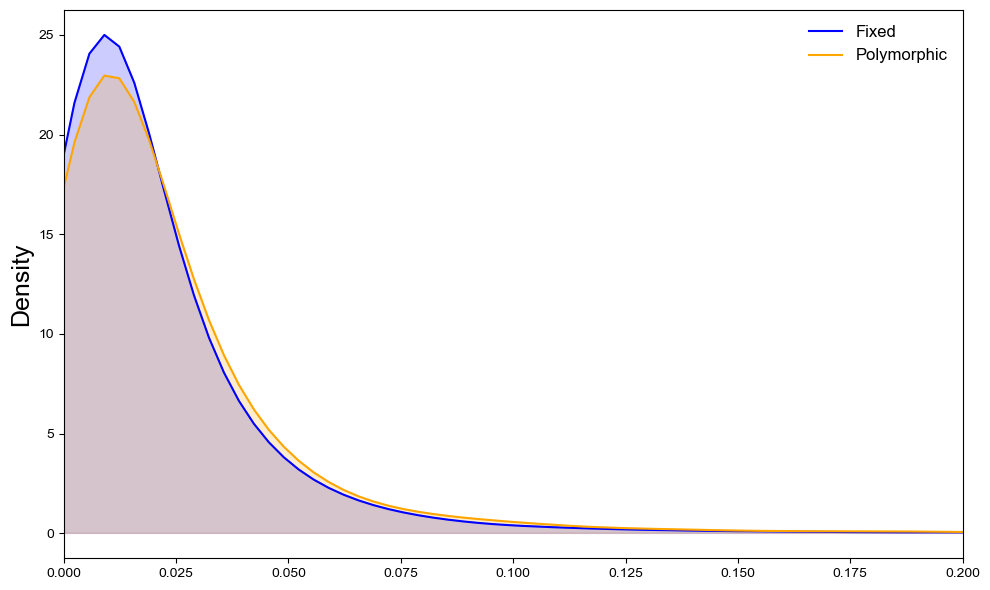

In [262]:
vx_gene = vx[vx["NearestGene"].isin(d_BP['Regulation Of DNA-templated Transcription (GO:0006355)'])]
vvx_gene = vvx[vvx["NearestGene"].isin(d_BP['Regulation Of DNA-templated Transcription (GO:0006355)'])]
cuttt = 0.5
yvals2 = [np.float64(j) for j in list(vvx_gene["abs logfc"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "abs logfc")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, window = [0, 0.2])
print(alpha)
print(fisher_exact(alpha[2]))

In [205]:
df.loc[772][0]

'Regulation Of DNA-templated Transcription (GO:0006355)'

In [181]:
x = pd.read_csv("PerGene_Unfold_Permute/PhyloP447/Finalizing_PerGene_FilterNewTEs_FisherExact_NonCod_PhyloP447_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv.gz")
x = x[x["Proportion"] == 0.9]
x = x[x["Gene"].isin(list(pd.read_csv("chrX_genes.txt", header = None)[0]))]
x_sig = x.sort_values("Fisher exact p-value; alt greater").head(50)

In [182]:
x_sig.sort_values("Fisher exact p-value; alt greater")

Gene  Median Fixed PhyloP  Number Fixed Variants  \
84          GPC4               0.2750                    609   
298        GRIA3               0.2330                   1791   
849      TMEM164               0.2180                    414   
831       SH2D1A               0.4680                    905   
1146        MST4               0.4000                    306   
1142         HDX               0.1730                    176   
2335     RPS6KA6               0.1320                    318   
3138     TMEM257               0.0525                    656   
4447     RPS6KA3               0.4060                   1153   
4659       TRPC5               0.1450                    491   
4852      NAP1L3               0.0920                    486   
6418       EFHC2               0.2090                    364   
6054     CXorf64               0.0040                    683   
6017       EFNB1               0.1750                    515   
6529       FAM9B              -0.1635                    422   
6281     DCAF8L2               0.1770                    894   
6177     MAGEB18               0.2040                    931   
7837     MAGEA10               0.1485                    210   
8022     CXorf21               0.2010                    232   
8179      COL4A5               0.2245                    118   
8425   LOC389895               0.3350                    296   
8063        ASB9               0.2280                    529   
9550     ARHGAP6               0.1835                    478   
9266      DIAPH2               0.1085                   1730   
8235     ZCCHC12               0.2700                    122   
9544     MID1IP1               0.2305                   1612   
10132       MAOA               0.1710                   1325   
10154     MAGEB2               0.2120                   2050   
10176     ACTRT1               0.0660                   1077   
9430        DLG3               0.4125                    238   
8756       TBX22               0.1700                    103   
10597      GLRA2               0.2300                    742   
11361    MAGEB10               0.1770                    219   
10850     UBE2NL               0.0125                    722   
10684    MAGEB16               0.1300                    478   
11484       CASK               0.2450                   1958   
11060     SPANXC               0.1130                    253   
11588       KAL1              -0.4595                    436   
11864    SPANXN3               0.0540                    625   
10892    SPANXB1               0.2615                    270   
11673    MAGEB17               0.2625                    294   
11747        ZFX               0.2360                    195   
13207      GPR64               0.2770                    309   
14063     MAMLD1               0.1020                    613   
14001     POU3F4               0.0305                    646   
14777    SPANXN2               0.1210                    289   
14984    SH3BGRL               0.1840                    417   
14929      GPR50               0.1390                    221   
15334      TBL1X              -0.2535                    506   
16942    SLITRK2               0.1340                    492   

       Median Polymorphic PhyloP  Number Polymorphic Variants  \
84                        0.1360                           59   
298                       0.2060                          481   
849                       0.1880                           55   
831                       0.3405                          250   
1146                      0.1230                           80   
1142                     -0.0585                           80   
2335                      0.0720                           81   
3138                      0.1085                          204   
4447                      0.2930                          205   
4659                      0.1780                          125   
4852                      0.0755

In [137]:
sfari = pd.read_csv("SFARI-Gene_genes_03-28-2024release_05-09-2024export.csv")
#sfari = sfari[sfari["gene-score"] == 1]
sfari = {"SFARI":list(sfari["gene-symbol"])}

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.08201141868407213, 3, [[4374, 147250], [693, 25405]], [[4377, 147247], [693, 25405]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.088953762705885, pvalue=0.03999030208926202)


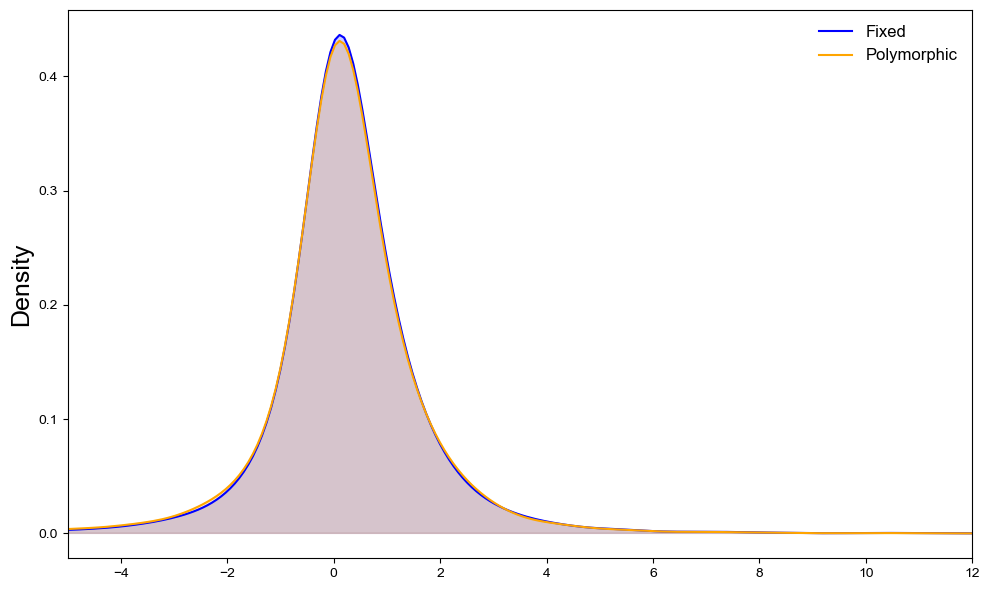

In [169]:
vx_gene = vx[~vx["NearestGene"].isin(x_sig["Gene"])]
vvx_gene = vvx[~vvx["NearestGene"].isin(x_sig["Gene"])]
cuttt = 0.9
yvals2 = [np.float64(j) for j in list(vvx_gene["PhyloP447"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "PhyloP447")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = 3)
print(alpha)
print(fisher_exact(alpha[2]))

In [173]:
syngo = pd.read_csv("../Cell_Type_Prop/Cell_Type_Prop/syngo_genes.csv")
pd.DataFrame(syngo["hgnc_symbol"]).to_csv("SYNGO.txt", sep = "\t", header = None, index = None)
syngo

hgnc_id hgnc_symbol                               hgnc_synonyms  \
0     HGNC:19679        AAK1                    KIAA1048, DKFZP686K16132   
1        HGNC:59       ABCC8  PHHI, SUR1, ABC36, HHF1, TNDM2, SUR, HRINS   
2     HGNC:28756     ABHD17A                 MGC5244, C19ORF27, FAM108A1   
3     HGNC:24278     ABHD17B                   CGI-67, C9ORF77, FAM108B1   
4     HGNC:26925     ABHD17C                                    FAM108C1   
...          ...         ...                                         ...   
1597  HGNC:12855       YWHAZ                  KCIP-1, 14-3-3-ZETA, YWHAD   
1598  HGNC:18412     ZDHHC17                       HIP14, HYPH, KIAA0946   
1599  HGNC:18469      ZDHHC2                               ZNF372, DHHC2   
1600  HGNC:18472      ZDHHC5                     KIAA1748, ZNF375, DHHC5   
1601  HGNC:18474      ZDHHC8                     ZNF378, KIAA1292, DHHC8   

                                              hgnc_name       ensembl_id  \
0                               AP2 associated kinase 1  ENSG00000115977   
1             ATP binding cassette subfamily C member 8  ENSG00000006071   
2     abhydrolase domain containing 17A, depalmitoylase  ENSG00000129968   
3     abhydrolase domain containing 17B, depalmitoylase  ENSG00000107362   
4     abhydrolase domain containing 17C, depalmitoylase  ENSG00000136379   
...                                                 ...              ...   
1597  tyrosine 3-monooxygenase/tryptophan 5-monooxyg...  ENSG00000164924   
1598      zinc finger DHHC-type palmitoyltransferase 17  ENSG00000186908   
1599       zinc finger DHHC-type palmitoyltransferase 2  ENSG00000104219   
1600       zinc finger DHHC-type palmitoyltransferase 5  ENSG00000156599   
1601       zinc finger DHHC-type palmitoyltransferase 8  ENSG00000099904   

      entrez_id  
0         22848  
1          6833  
2         81926  
3         51104  
4         58489  
...         ...  
1597       7534  
1598      23390  
1599      51201  
1600      25921  
1601      29801  

[1602 rows x 6 columns]

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.08902493219090685, 3, [[3980, 131739], [642, 23318]], [[3983, 131736], [642, 23318]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.0972989900567816, pvalue=0.03133481879067217)


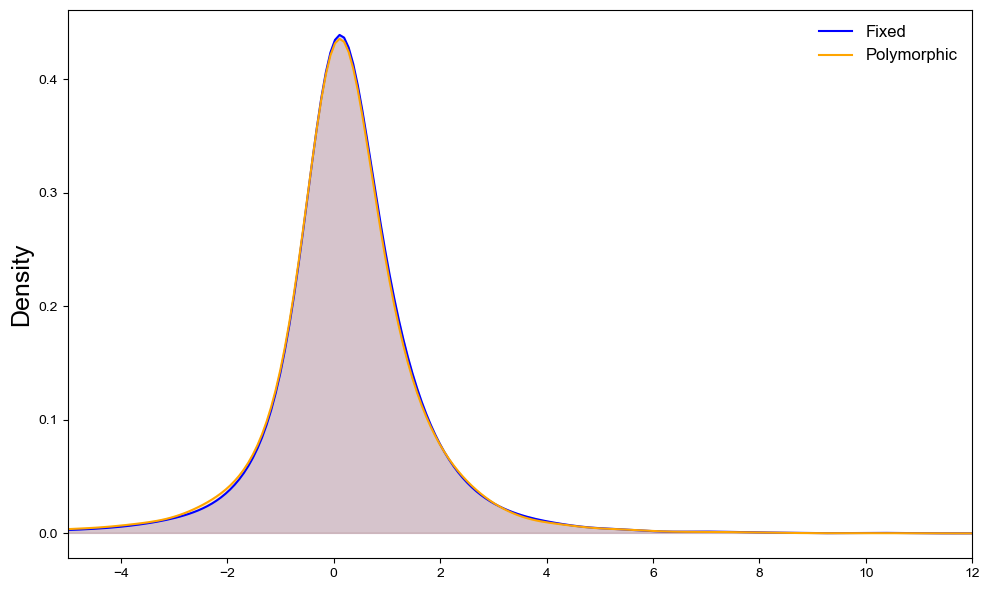

In [175]:
vx_gene = vx[~vx["NearestGene"].isin(syngo["hgnc_symbol"])]
vvx_gene = vvx[~vvx["NearestGene"].isin(syngo["hgnc_symbol"])]
cuttt = 0.9
yvals2 = [np.float64(j) for j in list(vvx_gene["PhyloP447"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "PhyloP447")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = 3)
print(alpha)
print(fisher_exact(alpha[2]))

In [142]:
vx_gene[vx_gene["PhyloP447"] > 2].sort_values("PhyloP447").tail(50)

Position      Position.1 NearestGene  NearestDist  \
NearestGene                                                            
GRIA3        chrX:122817514  chrX:122817514       GRIA3       366805   
GPC4         chrX:133677139  chrX:133677139        GPC4       261677   
GPC3         chrX:134013707  chrX:134013707        GPC3        27964   
TAF1          chrX:71398660   chrX:71398660        TAF1        32376   
GPC4         chrX:133633217  chrX:133633217        GPC4       217755   
GPC3         chrX:133961344  chrX:133961344        GPC3        24399   
GPC4         chrX:133633432  chrX:133633432        GPC4       217970   
GPC3         chrX:133880075  chrX:133880075        GPC3       105668   
GPC4         chrX:133478010  chrX:133478010        GPC4        62548   
GPC4         chrX:133335543  chrX:133335543        GPC4        79919   
GPC3         chrX:133818379  chrX:133818379        GPC3       167364   
GPC3         chrX:133801773  chrX:133801773        GPC3       183970   
GRIA3        chrX:122463062  chrX:122463062       GRIA3       721257   
GRIA3        chrX:123093326  chrX:123093326       GRIA3        90993   
GRIA3        chrX:122662158  chrX:122662158       GRIA3       522161   
GRIA3        chrX:123244065  chrX:123244065       GRIA3        59746   
GRIA3        chrX:122275498  chrX:122275498       GRIA3       908821   
GPC3         chrX:133868802  chrX:133868802        GPC3       116941   
GPC3         chrX:133793036  chrX:133793036        GPC3       192707   
GRIA3        chrX:123236618  chrX:123236618       GRIA3        52299   
GPC3         chrX:133947704  chrX:133947704        GPC3        38039   
GPC3         chrX:133815037  chrX:133815037        GPC3       170706   
GPC4         chrX:133640759  chrX:133640759        GPC4       225297   
GRIA3        chrX:123417626  chrX:123417626       GRIA3       233307   
GPC3         chrX:133961064  chrX:133961064        GPC3        24679   
GRIA3        chrX:123260969  chrX:123260969       GRIA3        76650   
GPC4         chrX:133414104  chrX:133414104        GPC4         1358   
ATP2B3       chrX:153547938  chrX:153547938      ATP2B3        30278   
GPC3         chrX:133941259  chrX:133941259        GPC3        44484   
GRIA3        chrX:123206929  chrX:123206929       GRIA3        22610   
GPC3         chrX:133854536  chrX:133854536        GPC3       131207   
TAF1          chrX:71420834   chrX:71420834        TAF1        54550   
GPC4         chrX:133402452  chrX:133402452        GPC4        13010   
GPC3         chrX:134109197  chrX:134109197        GPC3       123454   
GRIA3        chrX:122538964  chrX:122538964       GRIA3       645355   
GPC4         chrX:133604452  chrX:133604452        GPC4       188990   
GPC3         chrX:133947725  chrX:133947725        GPC3        38018   
GPC3         chrX:134004223  chrX:134004223        GPC3        18480   
GPC4         chrX:133527698  chrX:133527698        GPC4       112236   
GRIA3        chrX:123352920  chrX:123352920       GRIA3       168601   
GPC3         chrX:133918753  chrX:133918753        GPC3        66990   
GPC4         chrX:133655254  chrX:133655254        GPC4       239792   
GRIA3        chrX:123117295  chrX:123117295       GRIA3        67024   
TAF1          chrX:71419661   chrX:71419661        TAF1        53378   
TAF1          chrX:71419473   chrX:71419473        TAF1        53190   
GRIA3        chrX:122863487  chrX:122863487       GRIA3       320832   
GPC4         chrX:133658191  chrX:133658191        GPC4       242729   
GRIA3        chrX:123327752  chrX:123327752       GRIA3       143433   
GRIA3        chrX:123117296  chrX:123117296       GRIA3        67023   
GRIA3        chrX:123244121  chrX:123244121       GRIA3        59802   

             PhyloP447  PhastCons447  SpecSup447     logfc  \
NearestGene                                                  
GRIA3            4.666         1.000         385  0.003037   
GPC4             4.710         1.000         433 -0.014309   
GPC3             4.727    

In [2]:
pli = pd.read_csv("gnomad.v4.1.constraint_metrics.tsv", sep = "\t")
pli = pli.dropna()
pli = pli[pli["lof.pLI"] < 0.01]
pli

gene          gene_id       transcript  canonical  mane_select  \
1          A1BG  ENSG00000121410  ENST00000263100       True         True   
18         A1CF  ENSG00000148584  ENST00000373997       True         True   
28          A2M  ENSG00000175899  ENST00000318602       True         True   
39        A2ML1  ENSG00000166535  ENST00000299698       True         True   
46      A3GALT2  ENSG00000184389  ENST00000442999       True         True   
...         ...              ...              ...        ...          ...   
210654    ZWINT  ENSG00000122952  ENST00000373944       True         True   
210663     ZXDC  ENSG00000070476  ENST00000389709       True         True   
210676   ZYG11A  ENSG00000203995  ENST00000371528       True         True   
210687      ZYX  ENSG00000159840  ENST00000322764       True         True   
210700    ZZEF1  ENSG00000074755  ENST00000381638       True         True   

        lof_hc_lc.obs  lof_hc_lc.exp  lof_hc_lc.possible  lof_hc_lc.oe  \
1                45.0         43.048               193.0       1.04540   
18               45.0         69.962               352.0       0.64320   
28               95.0        147.240               745.0       0.64522   
39              146.0        176.050               881.0       0.82930   
46               41.0         26.559               110.0       1.54380   
...               ...            ...                 ...           ...   
210654           41.0         42.643               193.0       0.96148   
210663           58.0         61.640               298.0       0.94095   
210676           50.0         66.095               324.0       0.75649   
210687           39.0         58.481               263.0       0.66688   
210700          153.0        338.420              1648.0       0.45209   

        lof_hc_lc.mu  ...  syn.oe_ci.lower  syn.oe_ci.upper  syn.z_raw  \
1       7.063300e-07  ...            0.973            1.172  -1.166000   
18      9.547100e-07  ...            0.903            1.103   0.032727   
28      1.344500e-06  ...            0.806            0.929   3.368800   
39      1.700700e-06  ...            0.874            0.996   1.745200   
46      3.376300e-07  ...            1.425            1.753  -7.333400   
...              ...  ...              ...              ...        ...   
210654  7.245800e-07  ...            0.854            1.138   0.171260   
210663  8.418200e-07  ...            1.146            1.318  -4.890800   
210676  1.286400e-06  ...            0.839            1.028   1.213600   
210687  1.117000e-06  ...            0.933            1.122  -0.410930   
210700  2.335300e-06  ...            0.983            1.071  -1.007100   

        syn.z_score  constraint_flags  level  transcript_type  chromosome  \
1         -0.635490                []    2.0   protein_coding       chr19   
18         0.017838                []    2.0   protein_coding       chr10   
28         1.836200                []    2.0   protein_coding       chr12   
39         0.951210                []    2.0   protein_coding       chr12   
46        -3.997000   ["outlier_mis"]    2.0   protein_coding        chr1   
...             ...               ...    ...              ...         ...   
210654     0.093345                []    2.0   protein_coding       chr10   
210663    -2.665700                []    2.0   protein_coding        chr3   
210676     0.661480                []    2.0   protein_coding        chr1   
210687    -0.223980                []    2.0   protein_coding        chr7   
210700    -0.548930                []    2.0   protein_coding       chr17   

        cds_length  num_coding_exons  
1           1485.0               8.0  
18          1758.0              11.0  
28          4422.0              36.0  
39          4362.0              35.0  
46          1020.0               5.0  
...            ...               ...  
210654       831.0               8.0  
210663      2574.0              10.0  
210676      2277.0              

In [7]:
chr19

0       1
16329  chr19  OR4F17
16330  chr19   PLPP2
16331  chr19   MIER2
16332  chr19    THEG
16333  chr19  C2CD4C
...      ...     ...
17793  chr19  ZBTB45
17794  chr19  TRIM28
17795  chr19  CHMP2A
17796  chr19   UBE2M
17797  chr19    MZF1

[1469 rows x 2 columns]

In [34]:

x

cell_type      symbol          ensembl         SNP  \
21444  Excitatory neurons      CYB561  ENSG00000008283   rs2286569   
21445  Excitatory neurons       XRRA1  ENSG00000166435   rs9787775   
21446  Excitatory neurons    ANKRD36B  ENSG00000196912  rs11690658   
21447  Excitatory neurons  AC004540.1  ENSG00000214870   rs1238010   
21448  Excitatory neurons        XKR9  ENSG00000221947   rs7831792   
...                   ...         ...              ...         ...   
24173  Excitatory neurons       MAPK9  ENSG00000050748  rs11249689   
24174  Excitatory neurons  AC087289.4  ENSG00000267426  rs11652227   
24175  Excitatory neurons       TTC23  ENSG00000103852   rs7174431   
24176  Excitatory neurons      ENTPD5  ENSG00000187097  rs28494539   
24177  Excitatory neurons      AKAP13  ENSG00000170776  rs66501342   

      effect_allele other_allele  dist_TSS      beta         bpval  \
21444             T            C     -5711  1.090550  7.390000e-46   
21445             G            T     15650  1.058680  7.920000e-40   
21446             G            T    -43226  0.719846  5.850000e-37   
21447             G            T       514 -0.888026  9.610000e-37   
21448             A            G    -16245 -0.916258  1.780000e-36   
...             ...          ...       ...       ...           ...   
24173             C            A     -9572 -0.153298  1.843070e-02   
24174             C            T     37456 -0.302162  1.846410e-02   
24175             A            G    -48916 -0.327761  1.846660e-02   
24176             T            C   -431170 -0.451719  1.851130e-02   
24177             G            T    289524  0.256621  1.852350e-02   

              adj_p  beta_metabrain    p_metabrain      Replication  
21444  5.450000e-42        0.930794  3.271670e-310           5% FDR  
21445  2.920000e-36        1.161606  3.271670e-310           5% FDR  
21446  1.440000e-33        0.821913  2.070000e-269           5% FDR  
21447  1.770000e-33             NaN            NaN              NaN  
21448  2.620000e-33       -0.652859  5.500000e-157           5% FDR  
...             ...             ...            ...              ...  
24173  4.975291e-02        0.043205   1.036946e-01  Not significant  
24174  4.981333e-02             NaN            NaN              NaN  
24175  4.981333e-02       -0.456684   8.100000e-76           5% FDR  
24176  4.991564e-02        0.074491   2.295185e-01  Not significant  
24177  4.993027e-02        0.363215   8.970000e-21           5% FDR  

[2734 rows x 13 columns]

In [35]:
micro

cell_type_id      symbol          ensembl      snp_id  \
6       Microglia        FBN2  ENSG00000138829  rs78821460   
7       Microglia   LINC01340  ENSG00000250331   rs1592764   
8       Microglia      NUP160  ENSG00000030066   rs2125838   
12      Microglia      RNF150  ENSG00000170153  rs13131368   
17      Microglia  AC011586.1  ENSG00000253184  rs10093970   
...           ...         ...              ...         ...   
7523    Microglia    HLA-DQB2  ENSG00000232629   rs9273440   
7528    Microglia    SLC22A18  ENSG00000110628    rs440150   
7564    Microglia     METTL27  ENSG00000165171   rs4507641   
7575    Microglia       TAF1C  ENSG00000103168  rs11649298   
7604    Microglia    Z98257.1  ENSG00000227066  rs10799611   

      nb_pvalue_aggregate  nb_pvalue_aggregate_adj  nb_pvalue_at_least_one  \
6            6.830000e-64             7.410000e-61            8.090000e-70   
7            1.530000e-63             1.450000e-60            1.010000e-67   
8            5.400000e-60             4.560000e-57            1.630000e-48   
12           1.050000e-55             6.140000e-53            6.860000e-43   
17           1.380000e-50             5.830000e-48            3.870000e-33   
...                   ...                      ...                     ...   
7523         9.720000e-01             9.815598e-01                     inf   
7528         9.740000e-01             9.829263e-01            8.880000e-01   
7564         9.870000e-01             9.910435e-01            5.510000e-02   
7575         9.910000e-01             9.936155e-01            1.320000e-01   
7604                  NaN                      NaN                     NaN   

      nb_pvalue_at_least_one_adj  nb_pvalue_all  nb_pvalue_all_adj  \
6                   5.120000e-67   1.220000e-15       1.030000e-12   
7                   5.900000e-65   1.700000e-04       1.006116e-02   
8                   5.630000e-46   1.790000e-23       4.530000e-20   
12                  1.740000e-40   6.650000e-22       1.010000e-18   
17                  6.130000e-31   1.060000e-04       7.057370e-03   
...                          ...            ...                ...   
7523                1.000000e+00            NaN                NaN   
7528                9.961328e-01   8.990000e-01       1.000000e+00   
7564                1.010521e-01   9.700000e-01       1.000000e+00   
7575                2.053213e-01   9.910000e-01       1.000000e+00   
7604                         NaN            NaN                NaN   

      nb_pvalue_aggregate_model_converged  \
6                                    True   
7                                    True   
8                                    True   
12                                   True   
17                                   True   
...                                   ...   
7523                                 True   
7528                                 True   
7564                                 True   
7575                                 True   
7604                                 True   

      nb_pvalue_at_least_one_model_converged  Astrocytes_p  \
6                                       True  1.110000e-32   
7                                       True  1.440000e-68   
8                                       True  2.360000e-39   
12                                      True  3.050000e-37   
17                                      True  2.440000e-24   
...                                      ...           ...   
7523                                    True           NaN   
7528                                    True  5.890000e-01   
7564                                    True  7.870000e-03   
7575                                    True  7.620000e-01   
7604                                   False           NaN   

      Endothelial cells_p  Excitatory neurons_p  Inhibitory neurons_p  \
6            2.940000e-18          4.640000e-66          1.160000e-70   
7            1.700000e-04          6.720000e-51   

In [36]:
#Using eQTL data from https://www.nature.com/articles/s41593-022-01128-z#Sec25, znf genes on chr19 are more likely to have eQTLs than non-znf genes
#In multiple cell types, suggesting that the signal is not microglia-specific
x = pd.read_csv("All_eQTL_Bryois_Malhotra.csv")
x = x[x["cell_type"].isin(["Excitatory neurons"])]
x = x[x["adj_p"] < 0.05]

z = pd.read_csv("human_protein_coding.txt", sep = "\t", header = None)

chr19 = z[z[0].isin(["chr19"])]

chr19_znf = []
chr19_nonznf = []
for index, row in chr19.iterrows():
    if row[1].startswith("ZNF"):
        chr19_znf.append(row[1])
    else:
        chr19_nonznf.append(row[1])
        
#Test here
znf_e = len(np.intersect1d(chr19_znf, x['symbol']))
znf_ne = len(np.setdiff1d(chr19_znf, x['symbol']))
nznf_e = len(np.intersect1d(chr19_nonznf, x['symbol']))
nznf_ne = len(np.setdiff1d(chr19_nonznf, x['symbol']))

print(fisher_exact([[znf_e, znf_ne], [nznf_e, nznf_ne]]), [[znf_e, znf_ne], [nznf_e, nznf_ne]])

SignificanceResult(statistic=3.49746192893401, pvalue=3.825135624465829e-10) [[53, 197], [87, 1131]]


(0.43266518199051107, 1.46, [[542, 2744], [52, 469]], [[542, 2744], [53, 468]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.781495290423862, pvalue=9.090623602142289e-05)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

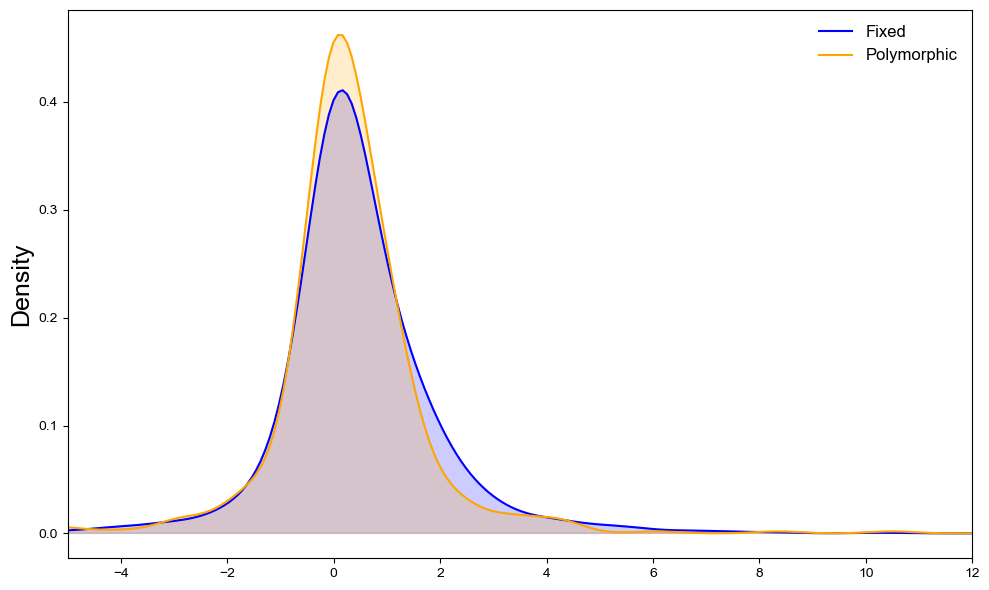

In [149]:
vx_gene = vx[vx["NearestGene"].isin(d_HPO["Cerebellar vermis hypoplasia"])]
vvx_gene = vvx[vvx["NearestGene"].isin(d_HPO["Cerebellar vermis hypoplasia"])]
cuttt = 0.9
yvals2 = [np.float64(j) for j in list(vvx_gene["PhyloP447"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "PhyloP447")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff)
print(alpha)
print(fisher_exact(alpha[2]))

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.10385787728838264, 3, [[4564, 154571], [717, 27085]], [[4568, 154567], [717, 27085]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.1153914302082335, pvalue=0.0071888842769460455)


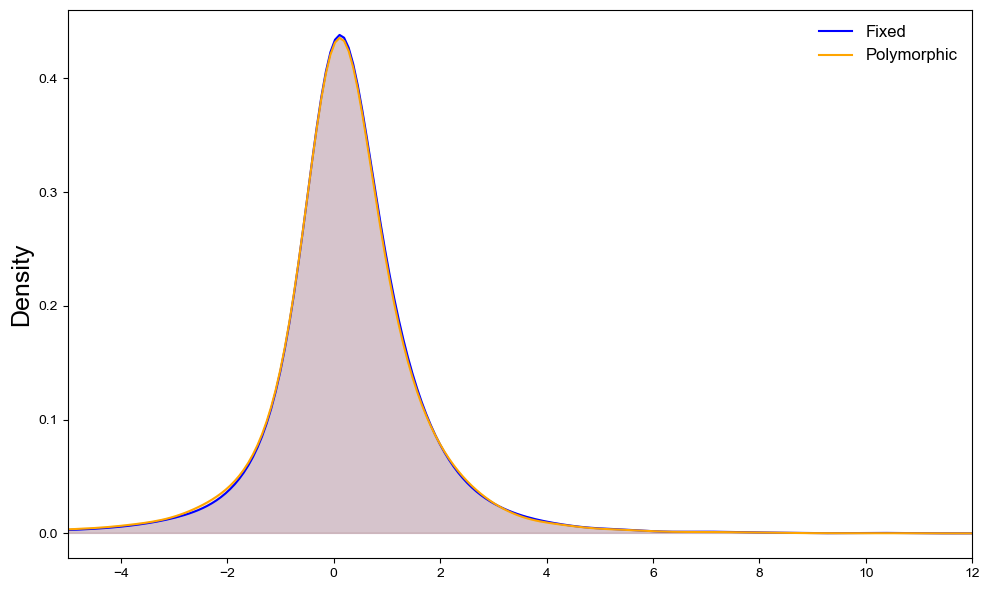

In [112]:
vx_gene = vx[~vx["NearestGene"].isin(d_HPO["Cerebellar vermis hypoplasia"])]
vvx_gene = vvx[~vvx["NearestGene"].isin(d_HPO["Cerebellar vermis hypoplasia"])]
cuttt = 0.95
yvals2 = [np.float64(j) for j in list(vvx_gene["PhyloP447"])]
yvals2.sort()
vvv = prepare_alpha(vx_gene, vvx_gene, stat = "PhyloP447")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = 3)
print(alpha)
print(fisher_exact(alpha[2]))

(0.10813738216894131, 3, [[4711, 158587], [736, 27768]], [[4715, 158583], [736, 27768]], <Figure size 1000x600 with 1 Axes>)
SignificanceResult(statistic=1.1207591855355215, pvalue=0.004236718923651054)


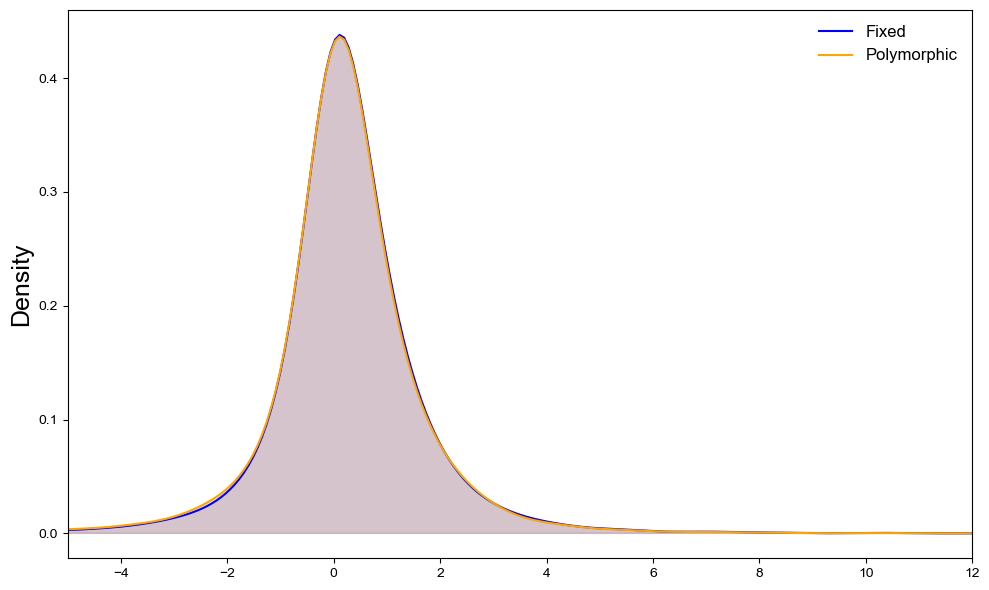

In [105]:
cuttt = 0.99
yvals2 = [np.float64(j) for j in list(vvx["PhyloP447"])]
yvals2.sort()
vvv = prepare_alpha(vx, vvx, stat = "PhyloP447")
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = 3)
print(alpha)
print(fisher_exact(alpha[2]))

In [72]:
df = pd.DataFrame(out)
df = df.sort_values(5)
df["FDR"] = fdrcorrection(df[5])[1]
df.head(50)

0       1     2       3  \
165                       Cerebellar vermis hypoplasia  0.2615  3286  0.1840   
13                                           Short toe  0.3100  1465  0.0150   
24                        Aplastic/hypoplastic toenail  0.2680   637 -0.0150   
417                             Abnormal lung lobation  0.3040  1558  0.2090   
209                                      Slender build  0.2140  1906  0.1940   
67                                           Flat face  0.2730   968  0.0710   
103                              Prolonged QT interval  0.2985  1486  0.1940   
580                                    Genu recurvatum  0.2350  1855  0.1940   
555                               Broad hallux phalanx  0.2275  1124  0.1490   
23                                        Short hallux  0.2750   609  0.1390   
19                                        Broad hallux  0.2260  1209  0.1390   
315                                      Narrow palate  0.2985  3038  0.2375   
397                                     Nephroblastoma  0.3105  1610  0.1910   
171                                   Facial hypotonia  0.2290  2277  0.2020   
481                      Prominent supraorbital ridges  0.3100  5781  0.2210   
247                     Stage 5 chronic kidney disease  0.2630   244  0.0565   
429                                         Broad palm  0.3140  4313  0.2460   
144                              Postaxial polydactyly  0.2965  1510  0.1540   
486                    Abnormal localization of kidney  0.2090   573  0.0870   
464                                      Neuroblastoma  0.3375  1242  0.1845   
25                                    Vertebral fusion  0.3375  1242  0.1845   
571                      Vertebral segmentation defect  0.3375  1242  0.1845   
308                               Ureteral duplication  0.3375  1242  0.1845   
10                                          Renal cyst  0.3375  1242  0.1845   
86   Aplasia/Hypoplasia of the abdominal wall muscu...  0.3260  1272  0.1845   
324                            Abnormality of the ribs  0.3475  1394  0.2150   
288                                         Meningitis  0.3780  1208  0.3790   
6                                          Hydroureter  0.2770  3236  0.2370   
368                                   Preauricular pit  0.3110  1717  0.1540   
4                           Postaxial hand polydactyly  0.3230  1385  0.1770   
14                                         Broad thumb  0.3130  1634  0.1845   
266              Increased circulating total IgE level  0.3230  1311  0.1935   
313                                      Hemivertebrae  0.1960   719  0.1990   
48                                      Nail dysplasia  0.3390  1378  0.1845   
11                                          Small nail  0.3110  1537  0.1845   
356                             Hypoplastic fingernail  0.4080  1238  0.2210   
51                                          Open mouth  0.2290  7043  0.2230   
582                                    Diastasis recti  0.3370  1274  0.1850   
146                             Thick vermilion border  0.2180  5240  0.1880   
220                               Supernumerary nipple  0.3370  1282  0.1850   
269                                           Lymphoma  0.4090  1055  0.4160   
80                                         Webbed neck  0.2830  2977  0.2195   
292                                       Encephalitis  0.3910  1102  0.3930   
519                                 Flared iliac wings  0.3360  1273  0.1850   
353                                       Pancytopenia  0.3160  2571  0.3330   
8                           Congenital hip dislocation  0.2725  2018  0.1570   
424                                           Flushing  0.1710  1325  0.1050   
77                                 Dental malocclusion  0.3140  4284  0.2535   
431                                    Corneal erosion  0.3020   180  0.0965   
123                                          Agitatio